##🚀drive mounting

In [ ]:
environment='local' #[local|cloud]

if environment=='local':
  import os
  # Navigate to data dir mounted locally
  os.chdir('/data')

else:
  from google.colab import drive
  drive.mount('/gdrive')
  %cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 2

# %ls

##📚importing libraries

In [ ]:
# Set seed for reproducibility
seed = 44


# Import necessary libraries

import os

# Set environment variables before importing modules
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(seed)
random.seed(seed)

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

# Set seed for TensorFlow
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)

# Reduce TensorFlow verbosity
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

# Print TensorFlow version
print(tf.__version__)

# Import other libraries
import os
import math
from PIL import Image
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

2.17.0


##📊Dataset

In previous explorations of the dataset we found some outliers and we decided to definitively remove them from out dataset

In [ ]:
import numpy as np

data = np.load("filtered_mars_for_students.npz")
training_set = data["training_set"]

X_train = training_set[:, 0]
y_train = training_set[:, 1]

X_test = data["test_set"]

print(f"Training X shape: {X_train.shape}")
print(f"Training y shape: {y_train.shape}")
print(f"Test X shape: {X_test.shape}")

Training X shape: (2505, 64, 128)
Training y shape: (2505, 64, 128)
Test X shape: (10022, 64, 128)


In [ ]:
import gc
del data, training_set
gc.collect()

26

###visual inspection

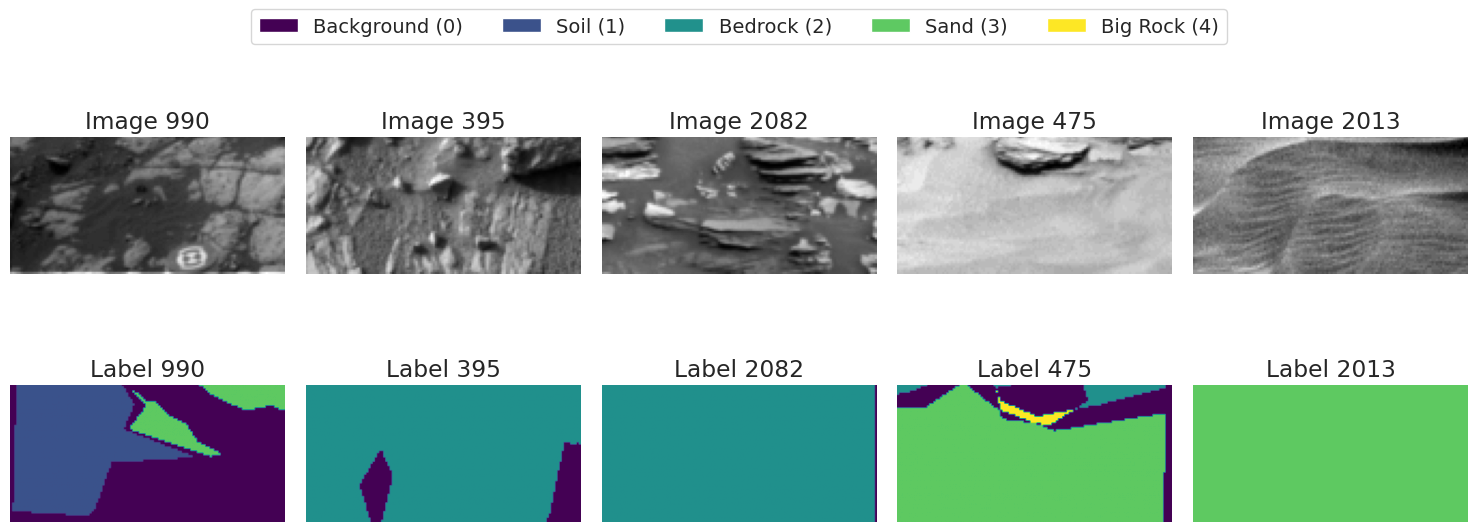

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Function to plot random images with labels
def plot_random_images_with_labels(images, labels, num=5):
    """
    Plots `num` random images with their respective label masks.

    Parameters:
        images (numpy.ndarray): Array of images.
        labels (numpy.ndarray): Array of label masks.
        num (int): Number of images to plot.
    """
    # Select `num` random indices
    random_indices = np.random.choice(len(images), num, replace=False)

    fig, axes = plt.subplots(2, num, figsize=(num * 3, 6))  # More compact figure

    for i, idx in enumerate(random_indices):
        # Display the image
        axes[0, i].imshow(images[idx], cmap='gray')
        axes[0, i].set_title(f"Image {idx}")
        axes[0, i].axis("off")

        # Display the mask with viridis
        axes[1, i].imshow(labels[idx], cmap='viridis', vmin=0, vmax=4)
        axes[1, i].set_title(f"Label {idx}")
        axes[1, i].axis("off")

    # Add a legend for the classes above the figure
    legend_elements = [
        Patch(facecolor=plt.cm.viridis(0 / 4), label='Background (0)'),
        Patch(facecolor=plt.cm.viridis(1 / 4), label='Soil (1)'),
        Patch(facecolor=plt.cm.viridis(2 / 4), label='Bedrock (2)'),
        Patch(facecolor=plt.cm.viridis(3 / 4), label='Sand (3)'),
        Patch(facecolor=plt.cm.viridis(4 / 4), label='Big Rock (4)')
    ]
    fig.legend(
        handles=legend_elements,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.05),
        ncol=5,
        fontsize='medium'
    )

    plt.tight_layout()
    plt.show()

# Plot 5 random images with labels
plot_random_images_with_labels(X_train, y_train, num=5)


###data processing

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Distribuzione delle classi: {0.0: 4988826, 1.0: 6957538, 2.0: 4776810, 3.0: 3770823, 4.0: 26963}


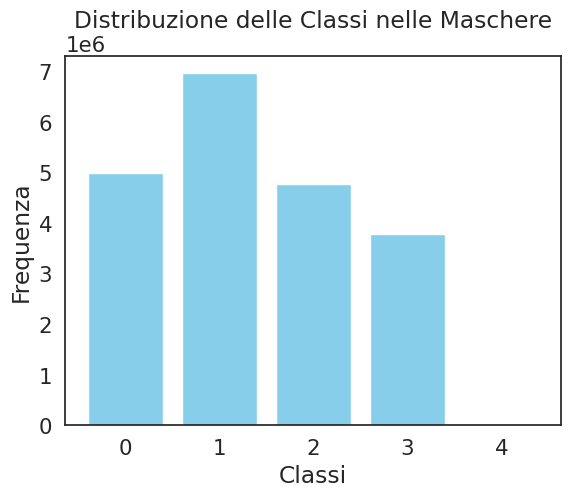

Numero di classi uniche nel dataset: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate class frequencies
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Visualization
print("Distribuzione delle classi:", class_distribution)

# Bar plot
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle Classi nelle Maschere')
plt.xticks(list(class_distribution.keys()))
plt.show()

# Number of unique classes
print(f"Numero di classi uniche nel dataset: {len(class_distribution)}")


In [ ]:
from sklearn.model_selection import train_test_split

# First split: division between train and temp (which will become validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Second split: division between validation and test
X_val, X_test_tmp, y_val, y_test_tmp = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the size of the new splits
print(f"Number of images:")
print(f"Train: {len(X_train)}")
print(f"Validation: {len(X_val)}")
print(f"Test: {len(X_test_tmp)}")


Number of images:
Train: 2004
Validation: 250
Test: 251


Distribuzione delle classi: {0.0: 3979893, 1.0: 5532162, 2.0: 3924593, 3.0: 2958791, 4.0: 21329}


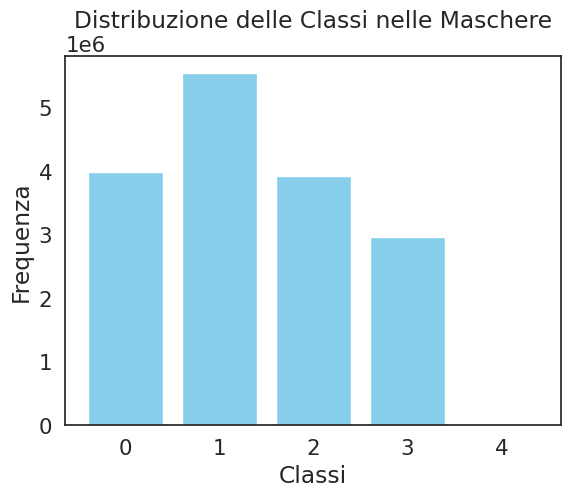

Numero di classi uniche nel dataset: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate class frequencies
unique, counts = np.unique(y_train, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Visualization
print("Distribuzione delle classi:", class_distribution)

# Bar plot
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle Classi nelle Maschere')
plt.xticks(list(class_distribution.keys()))
plt.show()

# Number of unique classes
print(f"Numero di classi uniche nel dataset: {len(class_distribution)}")

It is clear that there are classes that are highly represented, while others are significantly less represented

###preparing the dataset

We prepare the training dataset (applying geometric augmentation such as random flipping), the validation dataset, and the test dataset. Additionally, we set essential parameters such as batch size, patience, number of epochs, and learning rate

In [ ]:
@tf.function
def random_flip(image, label, seed=None):
    """
    Random horizontal flip for image and its corresponding segmentation mask (label).
    Displays three images with masks before and after the flip.

    Args:
        image: Tensor representing the image, shape [H, W, C].
        label: Tensor representing the segmentation mask, shape [H, W] or [H, W, 1].
        seed: Optional seed for the random generator.

    Returns:
        Flipped (or unchanged) image and label.
    """
    # Generate a random seed if not provided
    if seed is None:
        seed = np.random.randint(0, 1000000)

    # Ensure the label has 3 dimensions
    if len(label.shape) == 2:  # Adds a channel dimension
        label = tf.expand_dims(label, axis=-1)

    # Save copies of the original images and masks for visualization
    original_image = image.numpy() if tf.executing_eagerly() else image
    original_label = label.numpy() if tf.executing_eagerly() else label

    # Random uniform to determine the flip
    flip_prob = tf.random.uniform([], seed=seed)

    # Apply the conditional horizontal flip
    image = tf.cond(
        flip_prob > 0.5,
        lambda: tf.image.flip_left_right(image),
        lambda: image
    )
    label = tf.cond(
        flip_prob > 0.5,
        lambda: tf.image.flip_left_right(label),
        lambda: label
    )

    return image, label


In [ ]:
# Set batch size for training
BATCH_SIZE = 64

# Set learning rate for the optimiser
LEARNING_RATE = 1e-4

# Set early stopping patience threshold
PATIENCE = 30

# Set maximum number of training epochs
EPOCHS = 1000

In [ ]:
import numpy as np

# Add the channel to X_train and X_test
X_train = np.expand_dims(X_train, axis=-1)  # Add a channel
X_test_tmp = np.expand_dims(X_test_tmp, axis=-1)  # Add a channel
X_val = np.expand_dims(X_val, axis=-1)

input_shape = X_train.shape[1:]  # The input shape (excluding batch dimension)
num_classes = len(np.unique(y_train))

print(f"Input shape: {input_shape}")
print(f"Number of classes: {num_classes}")


Input shape: (64, 128, 1)
Number of classes: 5


In [ ]:
import tensorflow as tf

def make_dataset(X_train, y_train, batch_size, shuffle=True, augment=False, seed=None):
    """
    Create a memory-efficient TensorFlow dataset from X_train and y_train.

    Parameters:
    - X_train: Training images.
    - y_train: Training labels.
    - batch_size: Number of elements per batch.
    - shuffle: If True, shuffles the dataset.
    - augment: If True, applies augmentations to the images.
    - seed: Seed for randomness (optional).

    Returns:
    - dataset: TensorFlow dataset.
    """

    # Add the fourth dimension to y_train if necessary
    if len(y_train.shape) == 3:  # If y_train has shape (n_samples, height, width)
        y_train = tf.expand_dims(y_train, axis=-1)  # Converts to (n_samples, height, width, 1)

    # Create a dataset from X_train and y_train
    dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))

    # Apply shuffling
    if shuffle:
        dataset = dataset.shuffle(buffer_size=batch_size, seed=seed)

    # Apply augmentations
    if augment:
        dataset = dataset.map(
            lambda x, y: random_flip(x, y, seed=seed),
            num_parallel_calls=tf.data.AUTOTUNE
        )


    # Perform batching
    dataset = dataset.batch(batch_size, drop_remainder=False)

    # Optimize data loading
    dataset = dataset.prefetch(tf.data.AUTOTUNE)

    return dataset


In [ ]:
# Create the datasets
print("Creating datasets...")
train_dataset = make_dataset(
    X_train, y_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    augment=True,
    seed=seed
)

val_dataset = make_dataset(
    X_val, y_val,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_dataset = make_dataset(
    X_test_tmp, y_test_tmp,
    batch_size=BATCH_SIZE,
    shuffle=False
)

print("Datasets created!")

# Check the shape of the data
for images, labels in train_dataset.take(1):
    input_shape = images.shape[1:]
    print(f"\nInput shape: {input_shape}")
    print("Images shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Labels dtype:", labels.dtype)
    break

Creating datasets...
Datasets created!

Input shape: (64, 128, 1)
Images shape: (64, 64, 128, 1)
Labels shape: (64, 64, 128, 1)
Labels dtype: <dtype: 'float64'>


Visualizing examples from the training set:


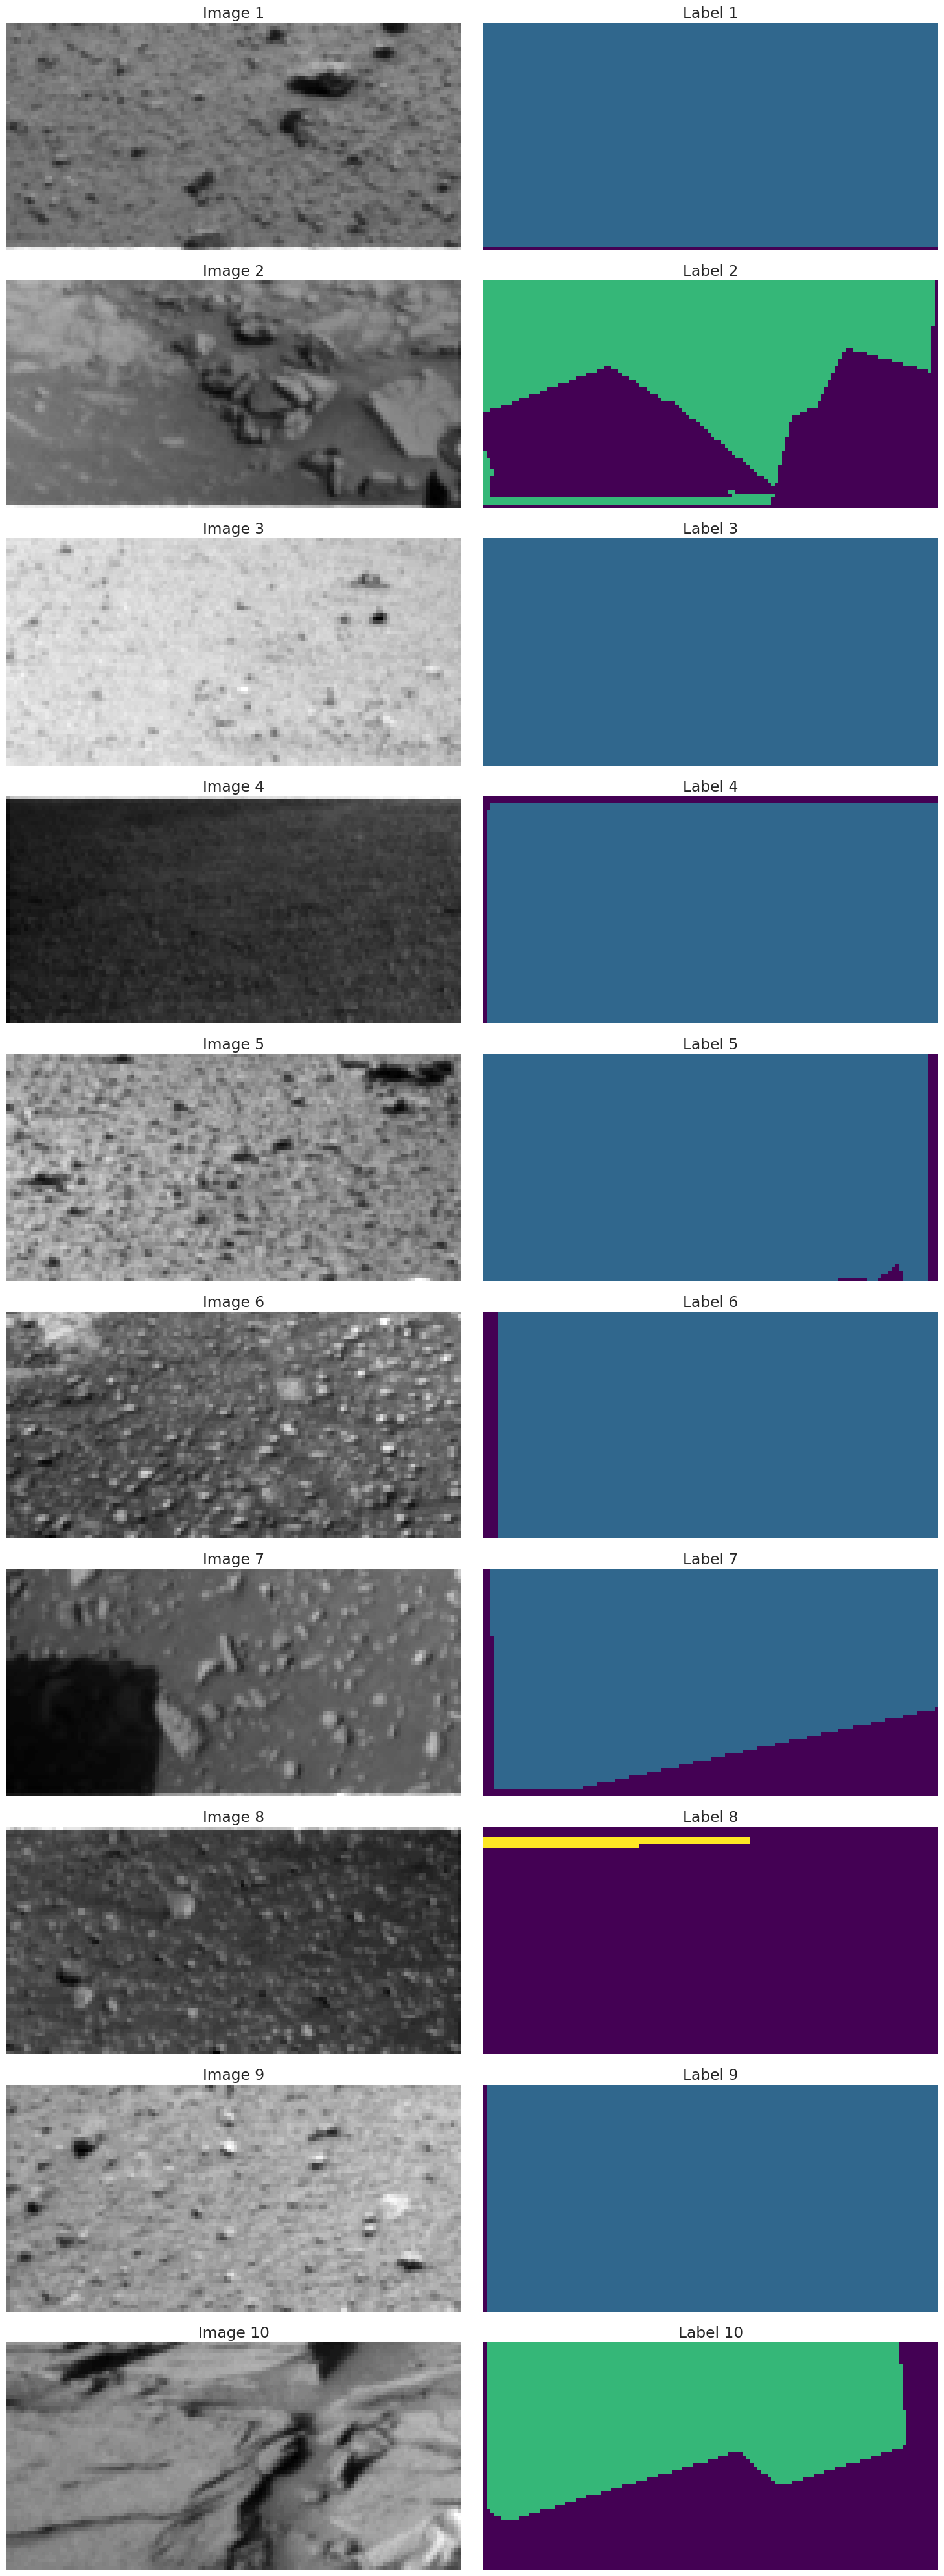

In [ ]:
def create_segmentation_colormap(num_classes):
    """
    Create a linear colormap using a predefined palette.
    Uses 'viridis' as default because it is perceptually uniform
    and works well for colorblindness.
    """
    return plt.cm.viridis(np.linspace(0, 1, num_classes))

def apply_colormap(label, colormap=None):
    """
    Apply the colormap to a label.
    """
    # Ensure label is 2D
    label = np.squeeze(label)

    if colormap is None:
        num_classes = len(np.unique(label))
        colormap = create_segmentation_colormap(num_classes)

    # Apply the colormap
    colored = colormap[label.astype(int)]

    return colored

def plot_sample_batch(dataset, num_samples=3):
    """
    Display some image and label pairs from the dataset.
    """
    plt.figure(figsize=(15, 4*num_samples))

    for images, labels in dataset.take(1):
        labels_np = labels.numpy()
        num_classes = len(np.unique(labels_np))
        colormap = create_segmentation_colormap(num_classes)

        for j in range(min(num_samples, len(images))):
            # Plot original image
            plt.subplot(num_samples, 2, j*2 + 1)
            plt.imshow(tf.squeeze(images[j], axis=-1)*255, cmap='gray')
            plt.title(f'Image {j+1}')
            plt.axis('off')

            # Plot colored label
            plt.subplot(num_samples, 2, j*2 + 2)
            colored_label = apply_colormap(labels_np[j], colormap)
            plt.imshow(colored_label)
            plt.title(f'Label {j+1}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()
    plt.close()

# Visualize examples from the training set
print("Visualizing examples from the training set:")
plot_sample_batch(train_dataset, num_samples=10)

Above are examples of the training dataset created

##💡Model

We define a U-Net model with 3 downsampling layers and 3 upsampling layers (using a basic U-block). In each upsampling layer, we add an attention block. In the bottleneck, we implement an improved ASPP layer

In [ ]:
def unet_block(input_tensor, filters, kernel_size=3, activation='relu', stack=2, name=''):
    # Initialise the input tensor
    x = input_tensor

    # Apply a sequence of Conv2D, Batch Normalisation, and Activation layers for the specified number of stacks
    for i in range(stack):
        x = tfkl.Conv2D(filters, kernel_size=kernel_size, padding='same', name=name + 'conv' + str(i + 1))(x)
        x = tfkl.BatchNormalization(name=name + 'bn' + str(i + 1))(x)
        x = tfkl.Activation(activation, name=name + 'activation' + str(i + 1))(x)

    # Return the transformed tensor
    return x


def improved_aspp_block(input_tensor, filters=128, dropout_rate=0.3):
    """
    Improved Atrous Spatial Pyramid Pooling (ASPP) Block with added normalization,
    adaptive filters, and multi-level regularization.
    """
    # 1x1 Convolution
    conv_1x1 = tfkl.Conv2D(filters, (1, 1), padding="same", activation="relu")(input_tensor)
    conv_1x1 = tfkl.BatchNormalization()(conv_1x1)

    # Dilated convolutions
    conv_3x3_1 = tfkl.Conv2D(filters, (3, 3), dilation_rate=6, padding="same", activation="relu")(input_tensor)
    conv_3x3_1 = tfkl.BatchNormalization()(conv_3x3_1)

    conv_3x3_2 = tfkl.Conv2D(filters, (3, 3), dilation_rate=12, padding="same", activation="relu")(input_tensor)
    conv_3x3_2 = tfkl.BatchNormalization()(conv_3x3_2)

    conv_3x3_3 = tfkl.Conv2D(filters, (3, 3), dilation_rate=18, padding="same", activation="relu")(input_tensor)
    conv_3x3_3 = tfkl.BatchNormalization()(conv_3x3_3)

    # Global Average Pooling
    gap = tfkl.GlobalAveragePooling2D()(input_tensor)
    gap = tfkl.Reshape((1, 1, input_tensor.shape[-1]))(gap)
    gap = tfkl.Conv2D(filters, (1, 1), padding="same", activation="relu")(gap)
    gap = tfkl.BatchNormalization()(gap)
    gap = tfkl.UpSampling2D(size=(input_tensor.shape[1], input_tensor.shape[2]))(gap)

    # Concatenate all branches
    x = tfkl.Concatenate()([conv_1x1, conv_3x3_1, conv_3x3_2, conv_3x3_3, gap])

    # Final 1x1 Convolution to combine features
    x = tfkl.Conv2D(filters, (1, 1), padding="same", activation="relu")(x)
    x = tfkl.BatchNormalization()(x)

    # Add multiple levels of Dropout
    x = tfkl.Dropout(dropout_rate)(x)  # Standard Dropout
    x = tfkl.SpatialDropout2D(dropout_rate)(x)  # Spatial Dropout

    return x



def attention_block(x, g, inter_channel):
    """
    Attention Gate: Modulates features in skip connections using gating signals.
    Args:
        x: Feature map from the encoder (skip connection input).
        g: Gating signal from the decoder.
        inter_channel: Number of filters for intermediate computations.
    Returns:
        Modified feature map with attention applied.
    """
    theta_x = tfkl.Conv2D(inter_channel, (1, 1), strides=(1, 1), padding='same')(x)
    phi_g = tfkl.Conv2D(inter_channel, (1, 1), strides=(1, 1), padding='same')(g)

    add_xg = tfkl.Add()([theta_x, phi_g])
    act_xg = tfkl.Activation('relu')(add_xg)
    psi = tfkl.Conv2D(1, (1, 1), strides=(1, 1), padding='same')(act_xg)
    sigmoid_psi = tfkl.Activation('sigmoid')(psi)

    return tfkl.Multiply()([x, sigmoid_psi])

def get_unet_model(input_shape=(64, 128, 1), num_classes=5, seed=42):
    """U-Net Model with 3 Downsampling and 3 Upsampling Blocks using Add instead of Concatenate"""
    tf.random.set_seed(seed)
    input_layer = tfkl.Input(shape=input_shape, name='input_layer')

    # Downsampling path
    down_block_1 = unet_block(input_layer, 32, name='down_block1_')
    d1 = tfkl.MaxPooling2D()(down_block_1)

    down_block_2 = unet_block(d1, 64, name='down_block2_')
    d2 = tfkl.MaxPooling2D()(down_block_2)

    down_block_3 = unet_block(d2, 128, name='down_block3_')
    d3 = tfkl.MaxPooling2D()(down_block_3)

    # Bottleneck with ASPP
    # Bottleneck
    bottleneck = improved_aspp_block(d3, filters=256, dropout_rate=0.4)

    # Upsampling path
    u1 = tfkl.UpSampling2D()(bottleneck)
    #u1 = tfkl.Conv2D(128, kernel_size=1, padding='same', name='adjust_u1_channels')(u1)  # Match channels
    #u1 = tfkl.Add()([u1, down_block_3])
    a1= attention_block(down_block_3, u1, 128)
    u1 = tfkl.Concatenate()([u1, a1])
    u1 = unet_block(u1, 128, name='up_block1_')

    u2 = tfkl.UpSampling2D()(u1)
    #u2 = tfkl.Conv2D(64, kernel_size=1, padding='same', name='adjust_u2_channels')(u2)  # Match channels
    #u2 = tfkl.Add()([u2, down_block_2])
    a2= attention_block(down_block_2, u2, 64)
    u2 = tfkl.Concatenate()([u2, a2])
    u2 = unet_block(u2, 64, name='up_block2_')

    u3 = tfkl.UpSampling2D()(u2)
    #u3 = tfkl.Conv2D(32, kernel_size=1, padding='same', name='adjust_u3_channels')(u3)  # Match channels
    #u3 = tfkl.Add()([u3, down_block_1])
    a3= attention_block(down_block_1, u3, 32)
    u3 = tfkl.Concatenate()([u3, a3])
    u3 = unet_block(u3, 32, name='up_block3_')

    # Add Spatial Dropout in the Decoder Path
    u3 = tfkl.SpatialDropout2D(rate=0.4)(u3)

    # Output Layer
    output_layer = tfkl.Conv2D(num_classes, kernel_size=1, padding='same', activation="softmax", name='output_layer')(u3)

    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='UNet')
    return model

We load a pre-trained U-Net model (with the same architecture) and freeze specific layers (e.g., the downsampling path) to prevent them from being updated during training. The rest of the layers remain trainable

Model: "UNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 64, 128, 1)     │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block1_conv1         │ (None, 64, 128, 32)    │            320 │ input_layer[0][0]      │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block1_bn1           │ (None, 64, 128, 32)    │            128 │ down_block1_conv1[0][… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block1_activation1   │ (None, 64, 128, 32)    │              0 │ down_block1_bn1[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block1_conv2         │ (None, 64, 128, 32)    │          9,248 │ down_block1_activatio… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block1_bn2           │ (None, 64, 128, 32)    │            128 │ down_block1_conv2[0][… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block1_activation2   │ (None, 64, 128, 32)    │              0 │ down_block1_bn2[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 32, 64, 32)     │              0 │ down_block1_activatio… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block2_conv1         │ (None, 32, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block2_bn1           │ (None, 32, 64, 64)     │            256 │ down_block2_conv1[0][… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block2_activation1   │ (None, 32, 64, 64)     │              0 │ down_block2_bn1[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block2_conv2         │ (None, 32, 64, 64)     │         36,928 │ down_block2_activatio… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block2_bn2           │ (None, 32, 64, 64)     │            256 │ down_block2_conv2[0][… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ down_block2_activatio

 Total params: 2,415,592 (9.21 MB)

 Trainable params: 2,123,400 (8.10 MB)

 Non-trainable params: 292,192 (1.11 MB)

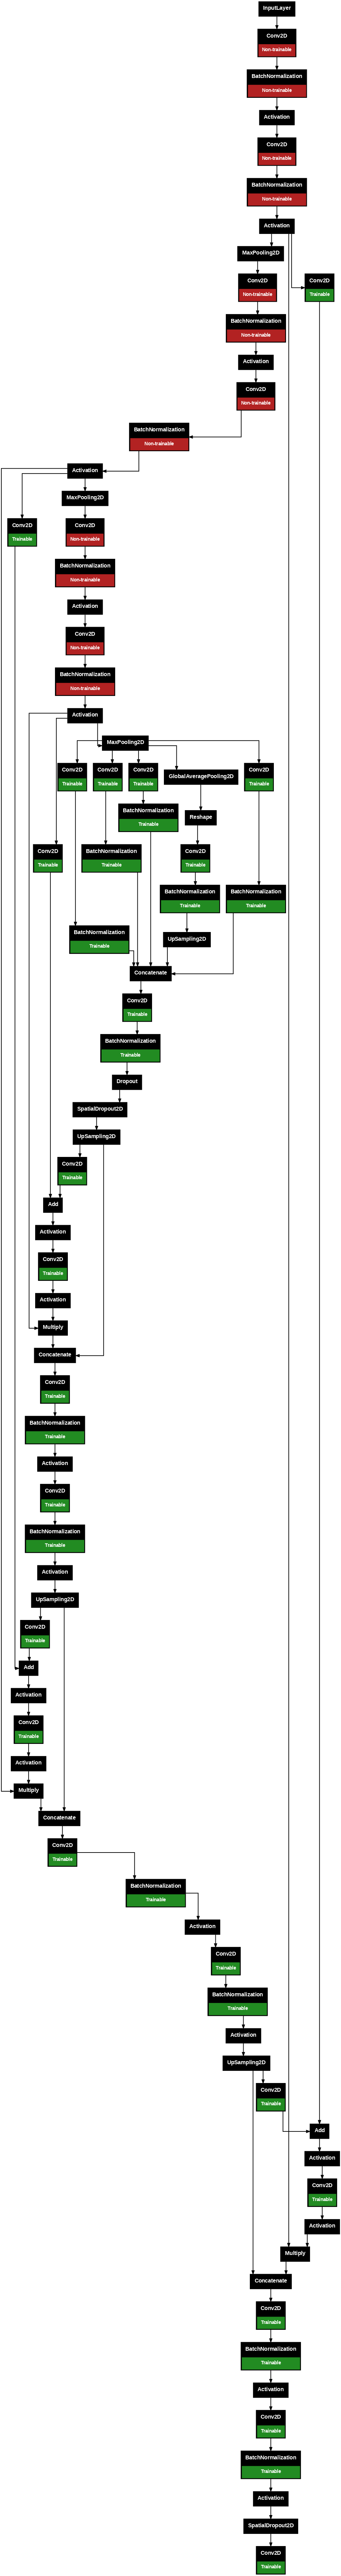

In [ ]:
# Model creation
model = get_unet_model()
weights_filename = 'UNet_weights_56.45.weights.h5'
model.load_weights(weights_filename)

# Freeze specific layers (e.g., encoder or downsampling path)
for layer in model.layers:
    if 'down_block' in layer.name:  # Adjust the prefix to match your layer naming convention
        layer.trainable = False  # Freeze encoder layers
    else:
        layer.trainable = True  # Keep other layers trainable

model.summary()


# Generate and display a graphical representation of the model architecture.
tf.keras.utils.plot_model(model, show_trainable=True, expand_nested=True, dpi=70)


Above, you can see the structure of the created model and the number of parameters

We define the MIoU (Mean Intersection over Union) and the Viz Callback to monitor the model's performance during training. MIoU is used as a metric to evaluate the accuracy of pixel-wise segmentation, while the Viz Callback helps visualize the model's predictions in real-time, providing insights into the training process.

In [ ]:
class MeanIntersectionOverUnion(tf.keras.metrics.MeanIoU):
    def __init__(self, num_classes, labels_to_exclude=None, name="mean_iou", dtype=None):
        super(MeanIntersectionOverUnion, self).__init__(num_classes=num_classes, name=name, dtype=dtype)
        if labels_to_exclude is None:
            labels_to_exclude = [0]  # Default to excluding label 0
        self.labels_to_exclude = labels_to_exclude

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert predictions to class labels
        y_pred = tf.math.argmax(y_pred, axis=-1)

        # Flatten the tensors
        y_true = tf.reshape(y_true, [-1])
        y_pred = tf.reshape(y_pred, [-1])

        # Apply mask to exclude specified labels
        for label in self.labels_to_exclude:
            mask = tf.not_equal(y_true, label)
            y_true = tf.boolean_mask(y_true, mask)
            y_pred = tf.boolean_mask(y_pred, mask)

        # Update the state
        return super().update_state(y_true, y_pred, sample_weight)


In [ ]:
class VizCallback(tf.keras.callbacks.Callback):
    def __init__(self, sample_images, sample_labels, frequency=5):
        """
        Visualization callback to monitor predictions during training.

        Args:
        - sample_images: A list of two NumPy arrays, each representing an image.
        - sample_labels: A list of two NumPy arrays, each representing a segmentation mask.
        - frequency: Frequency in terms of epochs to display the results.
        """
        super().__init__()
        self.sample_images = sample_images  # List of two images
        self.sample_labels = sample_labels  # List of two masks
        self.frequency = frequency

    def on_epoch_end(self, epoch, logs=None):
        """
        Displays the predictions at the end of every `frequency` epochs.
        """
        if epoch % self.frequency == 0:
            num_samples = len(self.sample_images)

            # Create the colormap
            num_classes = self.model.output_shape[-1]  # Number of classes from the model
            colormap = create_segmentation_colormap(num_classes)

            plt.figure(figsize=(16, 4 * num_samples))  # Expands the vertical size for more images

            for i in range(num_samples):
                image = tf.expand_dims(self.sample_images[i], 0)  # Adds batch dimension
                label = self.sample_labels[i]  # Associated label

                # Generate prediction
                pred = self.model.predict(image, verbose=0)
                y_pred = tf.math.argmax(pred, axis=-1)
                y_pred = y_pred.numpy()[0]  # Removes batch dimension

                # Input image
                plt.subplot(num_samples, 3, i * 3 + 1)
                plt.imshow(tf.squeeze(self.sample_images[i]), cmap='gray')
                plt.title(f"Input Image {i + 1}")
                plt.axis('off')

                # Ground truth
                plt.subplot(num_samples, 3, i * 3 + 2)
                colored_label = apply_colormap(label, colormap)
                plt.imshow(colored_label)
                plt.title(f"Ground Truth Mask {i + 1}")
                plt.axis('off')

                # Prediction
                plt.subplot(num_samples, 3, i * 3 + 3)
                colored_pred = apply_colormap(y_pred, colormap)
                plt.imshow(colored_pred)
                plt.title(f"Predicted Mask {i + 1}")
                plt.axis('off')

            plt.tight_layout()
            plt.show()
            plt.close()


sample_images = [X_val[0], X_val[1]]
sample_labels = [y_val[0], y_val[1]]
viz_callback = VizCallback(sample_images, sample_labels, frequency=5)


In [ ]:
EPOCHS = 200


# Setup callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=EPOCHS,
    restore_best_weights=True
)

We compute class weights to address class imbalance and normalize them into alpha. This alpha is then used in the custom Sparse Categorical Focal Loss function, which emphasizes harder examples during training. The custom loss function adjusts the impact of each class and focuses on improving model performance on difficult-to-classify samples

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np # Import numpy

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.array([0, 1, 2, 3, 4]),  # Convert the list to a NumPy array
    y=y_train.flatten(),  # y_train must be in 1D format
)
alpha = class_weights / sum(class_weights)
print(alpha)


[0.00524455 0.00377298 0.00531845 0.00705449 0.97860952]


In [ ]:
class SparseCategoricalFocalLoss(tf.keras.losses.Loss):
    def __init__(self, gamma=2.0, alpha=None, name="sparse_categorical_focal_loss"):
        """
        Implements the Focal Loss for integer labels.

        Parameters:
        - gamma: Modulates the balance between easy and hard examples.
        - alpha: Balances the contribution of classes (e.g., for class imbalance).
        """
        super().__init__(name=name)
        self.gamma = gamma
        self.alpha = alpha  # Store alpha as an attribute, but don't calculate it here

    def call(self, y_true, y_pred):
        # Calculate alpha inside the call method if it's not provided
        if self.alpha is None:
            classes, counts = np.unique(y_train, return_counts=True)
            class_weights = compute_class_weight(
                class_weight="balanced",
                classes=np.array([0, 1, 2, 3, 4]),
                y=y_train.flatten()
            )
            alpha = class_weights / sum(class_weights)
        else:
            alpha = self.alpha  # Use the provided alpha if available

        alpha = tf.cast(alpha, tf.float32)  # Cast alpha to tf.float32

        # Convert predicted probabilities to log probabilities
        y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)  # Avoid log(0)

        # Calculate the probability of the true class
        one_hot_y_true = tf.one_hot(tf.cast(y_true[..., 0], tf.int32), depth=y_pred.shape[-1])
        true_prob = tf.reduce_sum(y_pred * one_hot_y_true, axis=-1)

        # Apply Focal Loss
        weight = tf.pow(1.0 - true_prob, self.gamma)  # Focus on hard examples

        # Reshape alpha to match the shape of weight
        alpha_reshaped = tf.gather(alpha, tf.cast(y_true[..., 0], tf.int32))  # Gather alpha values for true classes
        # alpha_reshaped = tf.reshape(self.alpha, [1, 1, -1]) # Reshape alpha to (1, 1, num_classes)
        # alpha_reshaped = tf.broadcast_to(alpha_reshaped, tf.shape(y_pred)) # Broadcast to match y_pred

        focal_loss = -alpha_reshaped * weight * tf.math.log(true_prob)

        return tf.reduce_mean(focal_loss)

    # Updated get_config method
    def get_config(self):
        """
        Returns the configuration of the loss function.
        """
        config = super().get_config()
        config.update({
            "gamma": self.gamma,
            "alpha": self.alpha.tolist() if self.alpha is not None else None  # Ensure serializable type
        })
        return config

    @classmethod
    def from_config(cls, config):
        """
        Creates a loss instance from the configuration.
        """
        return cls(**config)


We define a cosine decay learning rate schedule with a warmup phase, starting at 1e-5 and decaying to 1e-6 over time

In [ ]:
# Compile the model

import keras
reduce_lr = keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-5,
    decay_steps=120*32,
    alpha=1e-6,
    name="CosineDecay",
    warmup_target=1e-4,
    warmup_steps=120*32*0.1,
)
'''
reduce_lr=keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-4,
    decay_steps=120*32,
    decay_rate=0.96,
    staircase=False,
    name="ExponentialDecay",
)
'''

print("Compiling model...")
model.compile(
    loss=SparseCategoricalFocalLoss,
    optimizer = tf.keras.optimizers.AdamW(
    learning_rate=reduce_lr,
    weight_decay=1e-4),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=5, labels_to_exclude=[0])]
)
print("Model compiled!")

Compiling model...
Model compiled!


###training

We can train the model, also using early stopping to prevent overfitting and reduce computational time

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.8163 - loss: 9.2701e-04 - mean_iou: 0.6883

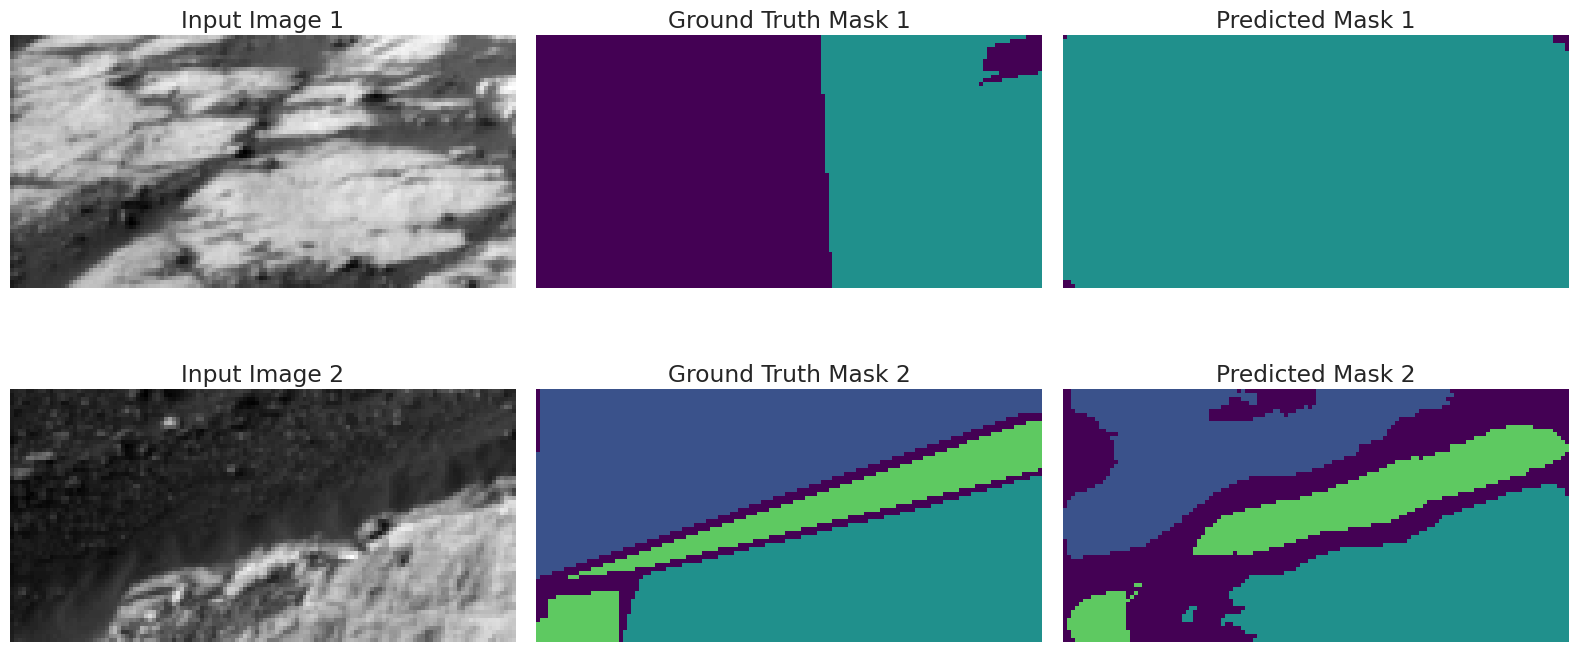

32/32 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8164 - loss: 9.2707e-04 - mean_iou: 0.6882 - val_accuracy: 0.7635 - val_loss: 0.0031 - val_mean_iou: 0.5510
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.8190 - loss: 9.0501e-04 - mean_iou: 0.6847 - val_accuracy: 0.7635 - val_loss: 0.0032 - val_mean_iou: 0.5504
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.8195 - loss: 9.1670e-04 - mean_iou: 0.6891 - val_accuracy: 0.7631 - val_loss: 0.0031 - val_mean_iou: 0.5503
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.8237 - loss: 9.0193e-04 - mean_iou: 0.6989 - val_accuracy: 0.7627 - val_loss: 0.0031 - val_mean_iou: 0.5495
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8198 - loss: 8.9604e-04 - mean_iou: 0.6850 - val_accuracy: 0.7639 - val_loss: 0.0033 - val_mean_iou: 0.5495
Epoch 6/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8238 - loss: 8.9772e-04 - mean_iou: 0.6991

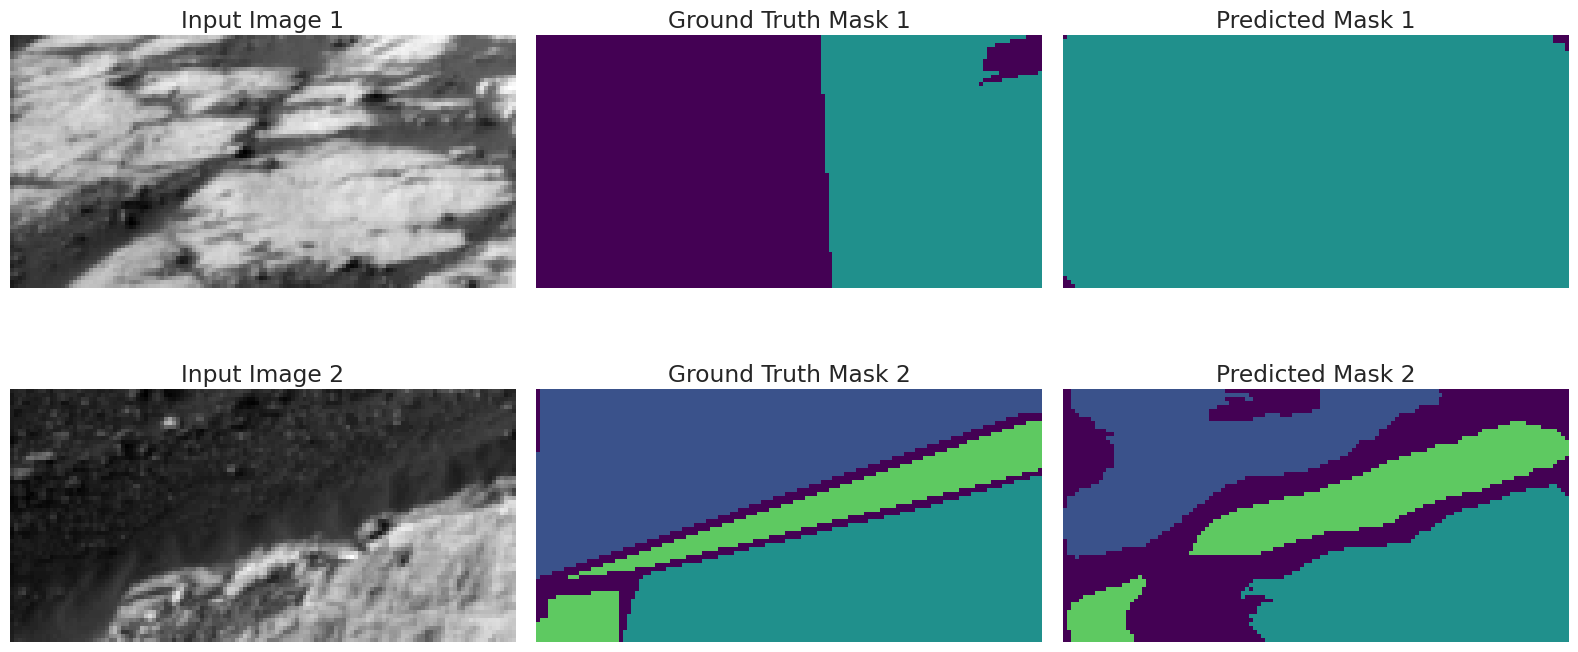

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.8238 - loss: 8.9867e-04 - mean_iou: 0.6985 - val_accuracy: 0.7642 - val_loss: 0.0033 - val_mean_iou: 0.5480
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8203 - loss: 9.1157e-04 - mean_iou: 0.6996 - val_accuracy: 0.7637 - val_loss: 0.0032 - val_mean_iou: 0.5478
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8259 - loss: 9.1077e-04 - mean_iou: 0.6899 - val_accuracy: 0.7641 - val_loss: 0.0033 - val_mean_iou: 0.5511
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8252 - loss: 9.0650e-04 - mean_iou: 0.6959 - val_accuracy: 0.7640 - val_loss: 0.0034 - val_mean_iou: 0.5395
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8191 - loss: 9.1499e-04 - mean_iou: 0.6897 - val_accuracy: 0.7675 - val_loss: 0.0035 - val_mean_iou: 0.5420
Epoch 11/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8217 - loss: 9.0360e-04 - mean_iou: 0.6838

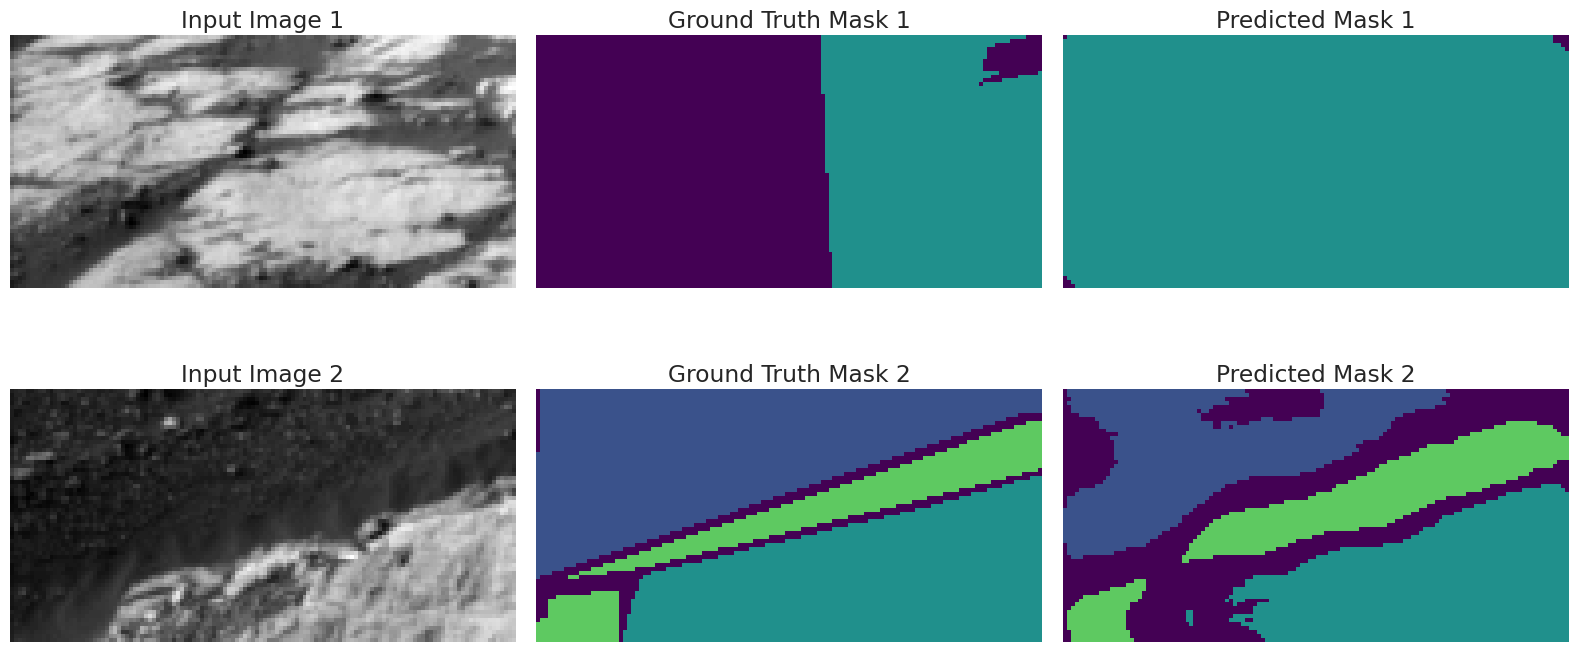

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8219 - loss: 9.0376e-04 - mean_iou: 0.6843 - val_accuracy: 0.7641 - val_loss: 0.0042 - val_mean_iou: 0.5148
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8189 - loss: 9.0165e-04 - mean_iou: 0.6788 - val_accuracy: 0.7647 - val_loss: 0.0043 - val_mean_iou: 0.5232
Epoch 13/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8283 - loss: 8.9581e-04 - mean_iou: 0.7093 - val_accuracy: 0.7657 - val_loss: 0.0043 - val_mean_iou: 0.5175
Epoch 14/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8239 - loss: 8.7334e-04 - mean_iou: 0.6935 - val_accuracy: 0.7665 - val_loss: 0.0036 - val_mean_iou: 0.5353
Epoch 15/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8252 - loss: 8.7303e-04 - mean_iou: 0.6903 - val_accuracy: 0.7639 - val_loss: 0.0031 - val_mean_iou: 0.5359
Epoch 16/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8248 - loss: 8.6473e-04 - mean_iou: 0.6899

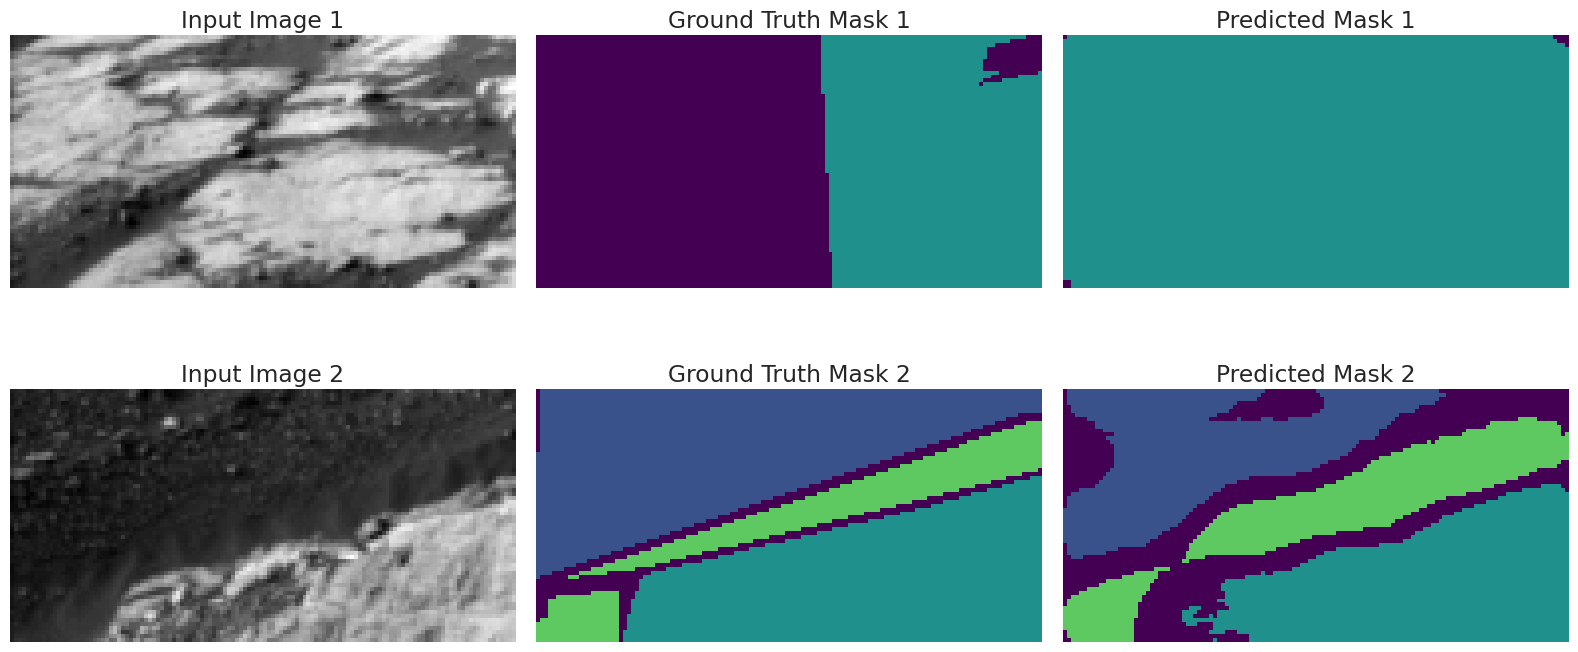

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8250 - loss: 8.6533e-04 - mean_iou: 0.6898 - val_accuracy: 0.7620 - val_loss: 0.0034 - val_mean_iou: 0.5439
Epoch 17/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8303 - loss: 8.4175e-04 - mean_iou: 0.7051 - val_accuracy: 0.7641 - val_loss: 0.0031 - val_mean_iou: 0.5435
Epoch 18/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8309 - loss: 8.4357e-04 - mean_iou: 0.6812 - val_accuracy: 0.7664 - val_loss: 0.0036 - val_mean_iou: 0.5353
Epoch 19/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8275 - loss: 8.6692e-04 - mean_iou: 0.6989 - val_accuracy: 0.7711 - val_loss: 0.0041 - val_mean_iou: 0.5116
Epoch 20/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8280 - loss: 8.6217e-04 - mean_iou: 0.7073 - val_accuracy: 0.7671 - val_loss: 0.0036 - val_mean_iou: 0.5358
Epoch 21/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.8298 - loss: 8.3690e-04 - mean_iou: 0.6994

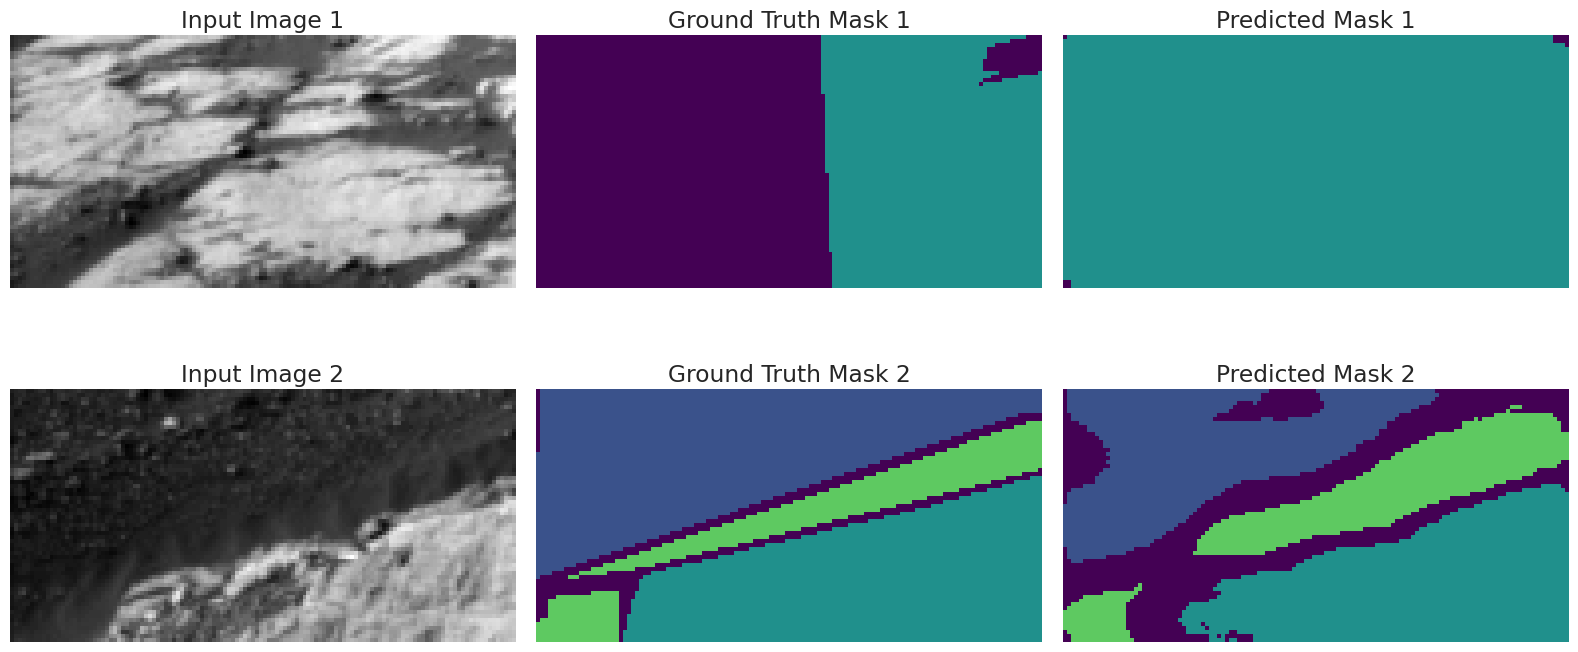

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.8300 - loss: 8.3715e-04 - mean_iou: 0.6995 - val_accuracy: 0.7682 - val_loss: 0.0039 - val_mean_iou: 0.5258
Epoch 22/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8290 - loss: 8.1968e-04 - mean_iou: 0.7055 - val_accuracy: 0.7643 - val_loss: 0.0040 - val_mean_iou: 0.5199
Epoch 23/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8291 - loss: 8.3780e-04 - mean_iou: 0.7105 - val_accuracy: 0.7638 - val_loss: 0.0035 - val_mean_iou: 0.5445
Epoch 24/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8280 - loss: 8.3932e-04 - mean_iou: 0.6969 - val_accuracy: 0.7638 - val_loss: 0.0036 - val_mean_iou: 0.5417
Epoch 25/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8300 - loss: 8.4381e-04 - mean_iou: 0.7092 - val_accuracy: 0.7648 - val_loss: 0.0041 - val_mean_iou: 0.5268
Epoch 26/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8317 - loss: 8.1584e-04 - mean_iou: 0.7038

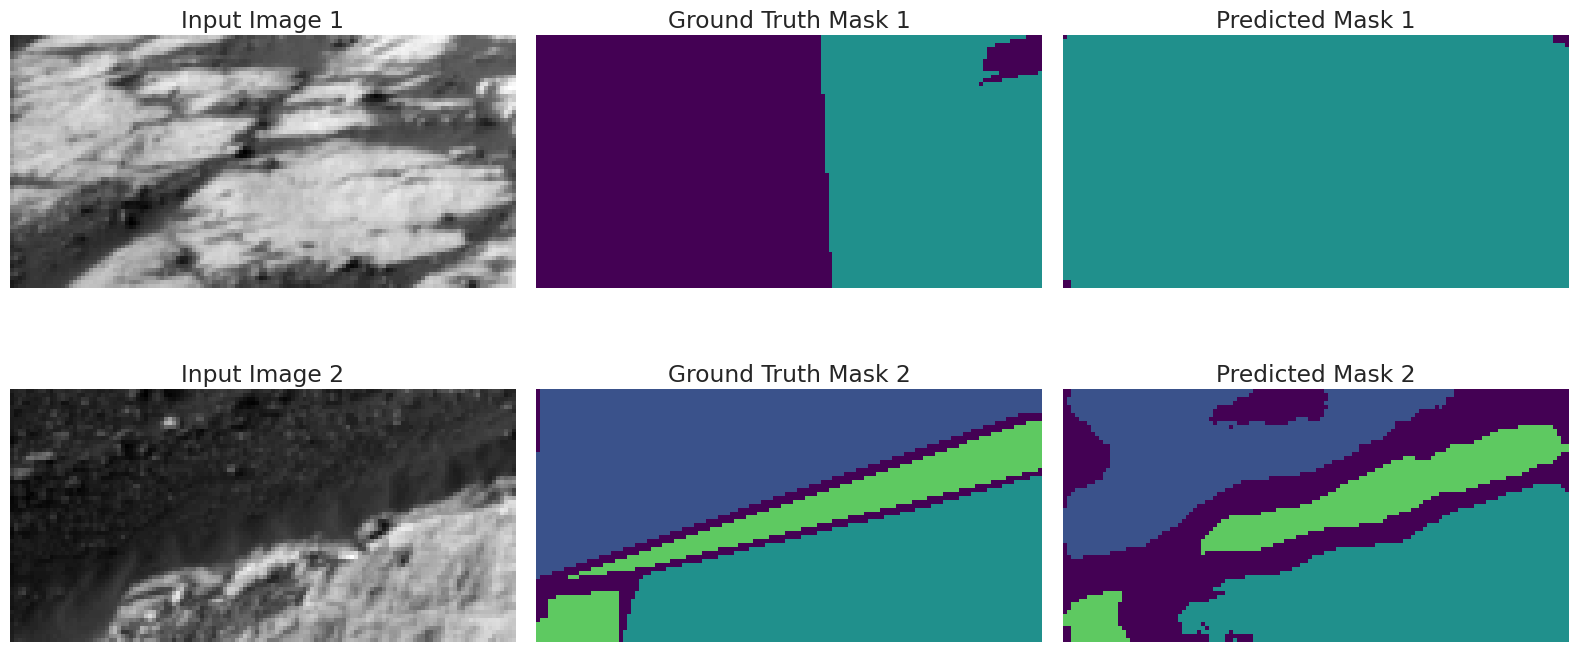

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8318 - loss: 8.1707e-04 - mean_iou: 0.7037 - val_accuracy: 0.7706 - val_loss: 0.0037 - val_mean_iou: 0.5451
Epoch 27/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8315 - loss: 8.0547e-04 - mean_iou: 0.7043 - val_accuracy: 0.7606 - val_loss: 0.0036 - val_mean_iou: 0.5392
Epoch 28/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8289 - loss: 8.3084e-04 - mean_iou: 0.7052 - val_accuracy: 0.7665 - val_loss: 0.0038 - val_mean_iou: 0.5355
Epoch 29/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8348 - loss: 7.9345e-04 - mean_iou: 0.7108 - val_accuracy: 0.7667 - val_loss: 0.0043 - val_mean_iou: 0.5165
Epoch 30/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8305 - loss: 8.2432e-04 - mean_iou: 0.7009 - val_accuracy: 0.7684 - val_loss: 0.0034 - val_mean_iou: 0.5366
Epoch 31/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8329 - loss: 8.1875e-04 - mean_iou: 0.6962

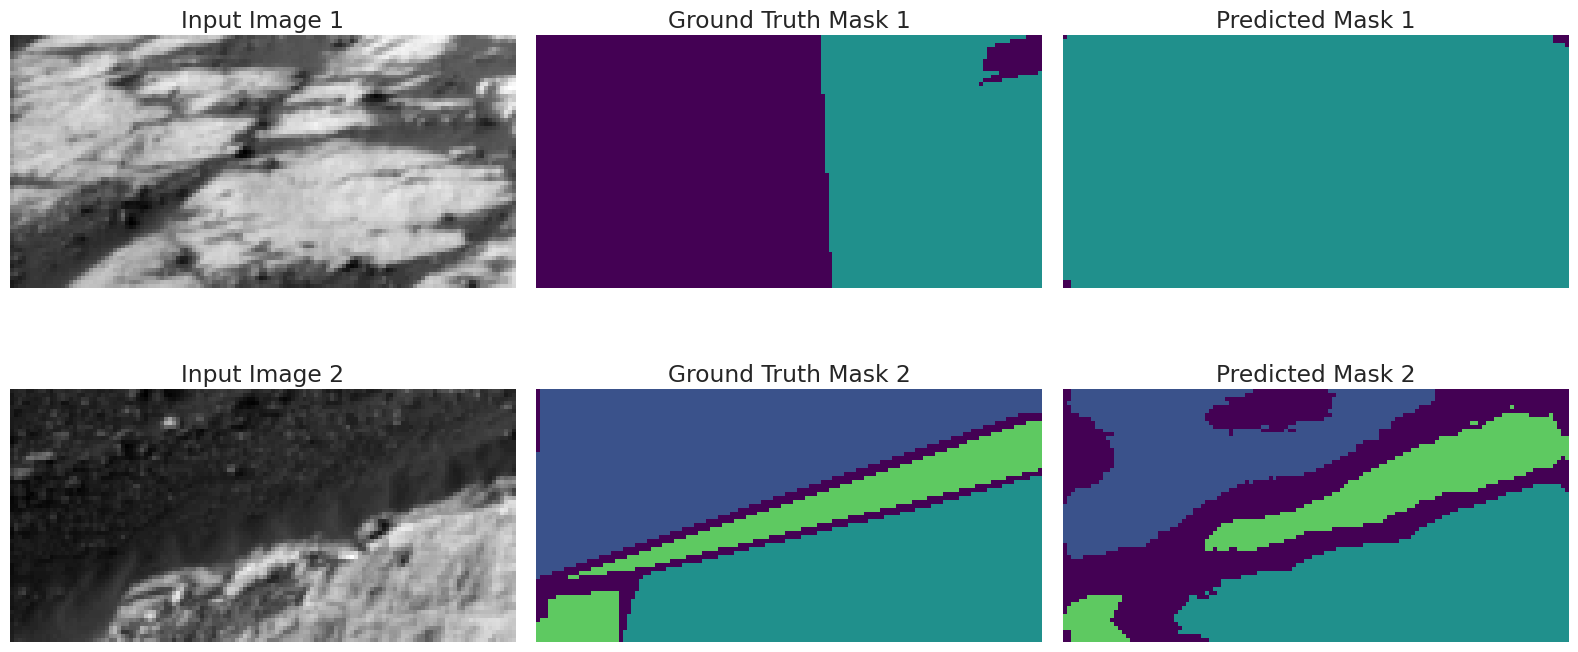

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8331 - loss: 8.1826e-04 - mean_iou: 0.6965 - val_accuracy: 0.7673 - val_loss: 0.0040 - val_mean_iou: 0.5344
Epoch 32/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 121ms/step - accuracy: 0.8362 - loss: 7.9610e-04 - mean_iou: 0.7045 - val_accuracy: 0.7667 - val_loss: 0.0047 - val_mean_iou: 0.5097
Epoch 33/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8373 - loss: 7.8483e-04 - mean_iou: 0.7113 - val_accuracy: 0.7706 - val_loss: 0.0044 - val_mean_iou: 0.5227
Epoch 34/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8326 - loss: 8.0570e-04 - mean_iou: 0.7098 - val_accuracy: 0.7693 - val_loss: 0.0050 - val_mean_iou: 0.5024
Epoch 35/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8395 - loss: 7.6496e-04 - mean_iou: 0.7188 - val_accuracy: 0.7709 - val_loss: 0.0048 - val_mean_iou: 0.5072
Epoch 36/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8339 - loss: 7.8354e-04 - mean_iou: 0.7060

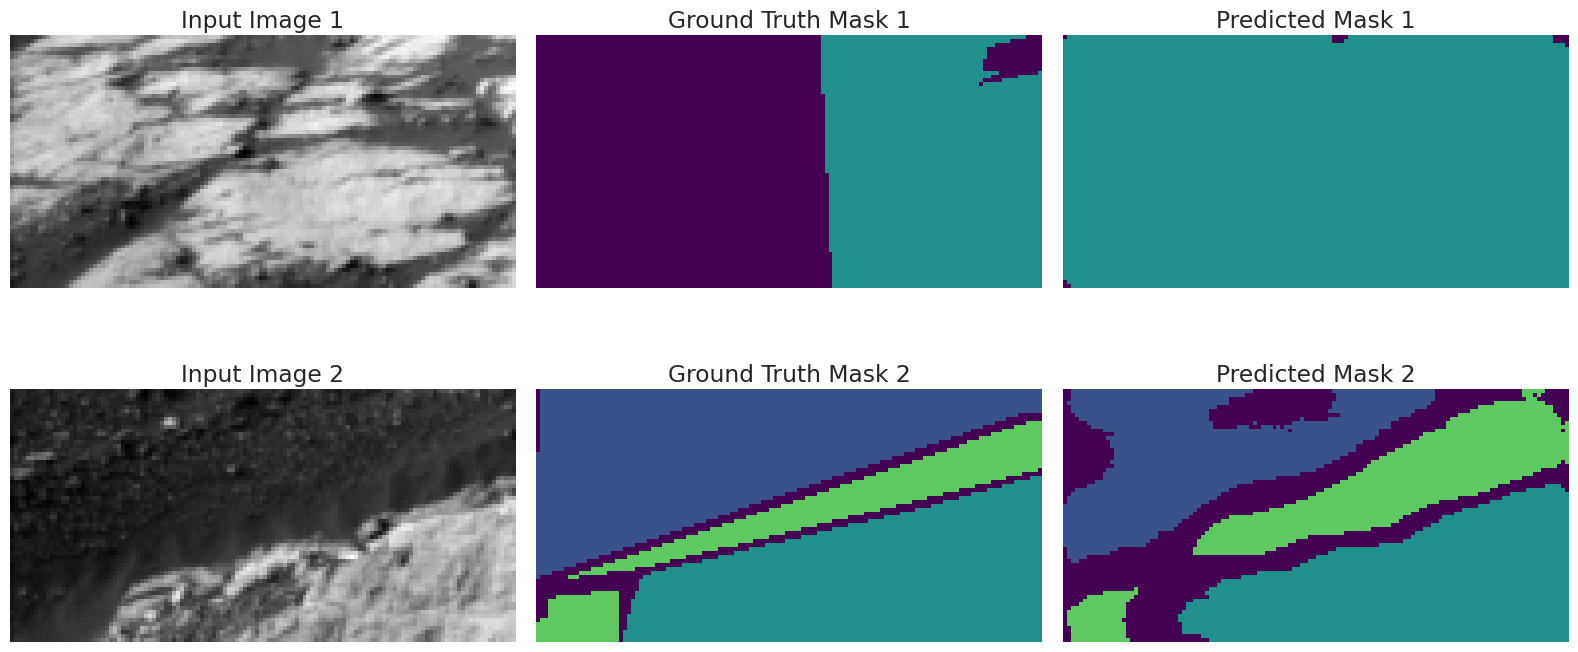

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8341 - loss: 7.8372e-04 - mean_iou: 0.7064 - val_accuracy: 0.7683 - val_loss: 0.0049 - val_mean_iou: 0.5074
Epoch 37/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8419 - loss: 7.6267e-04 - mean_iou: 0.7260 - val_accuracy: 0.7713 - val_loss: 0.0043 - val_mean_iou: 0.5247
Epoch 38/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8401 - loss: 7.7005e-04 - mean_iou: 0.7171 - val_accuracy: 0.7715 - val_loss: 0.0040 - val_mean_iou: 0.5341
Epoch 39/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8324 - loss: 8.0937e-04 - mean_iou: 0.7097 - val_accuracy: 0.7687 - val_loss: 0.0047 - val_mean_iou: 0.5202
Epoch 40/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8340 - loss: 7.8044e-04 - mean_iou: 0.7114 - val_accuracy: 0.7724 - val_loss: 0.0049 - val_mean_iou: 0.5125
Epoch 41/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8355 - loss: 7.7552e-04 - mean_iou: 0.7150

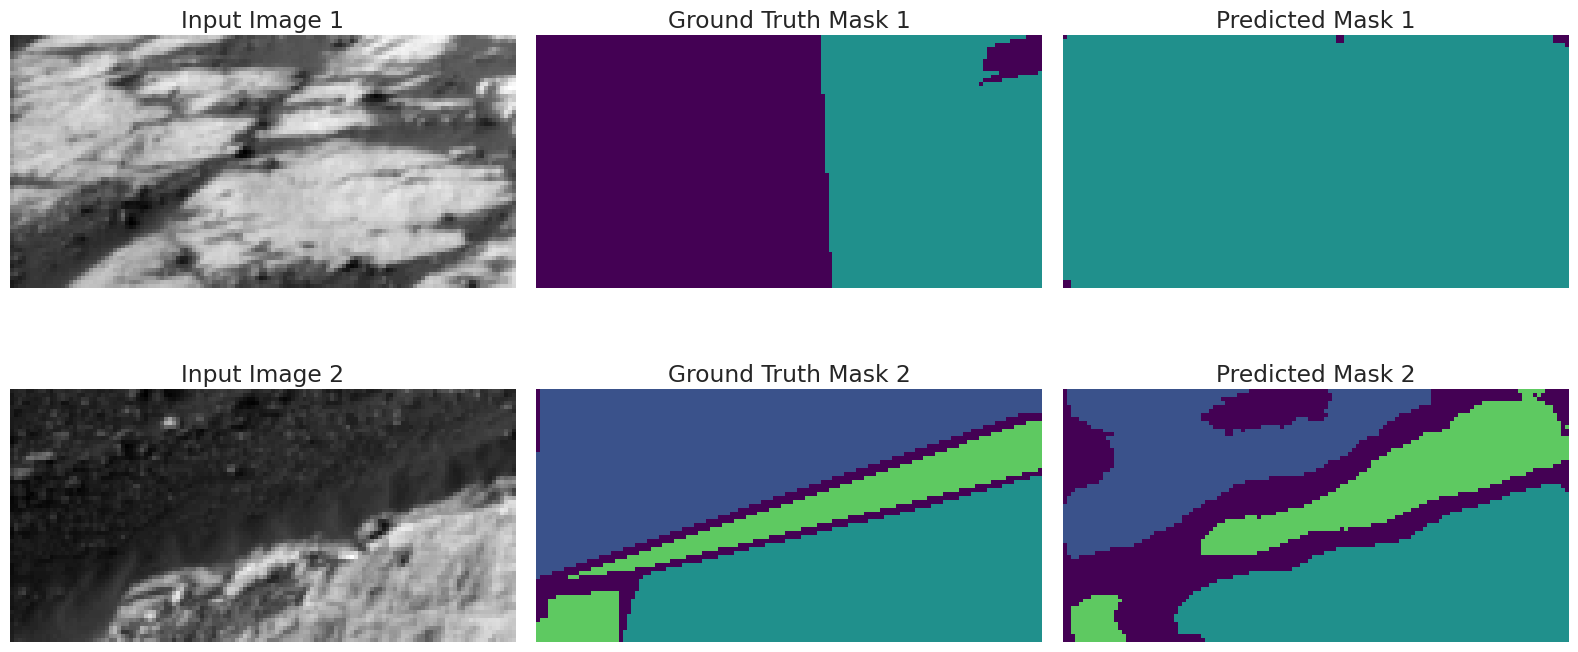

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8358 - loss: 7.7575e-04 - mean_iou: 0.7152 - val_accuracy: 0.7715 - val_loss: 0.0050 - val_mean_iou: 0.5018
Epoch 42/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8419 - loss: 7.5422e-04 - mean_iou: 0.7102 - val_accuracy: 0.7694 - val_loss: 0.0049 - val_mean_iou: 0.5095
Epoch 43/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8408 - loss: 7.6221e-04 - mean_iou: 0.7150 - val_accuracy: 0.7691 - val_loss: 0.0051 - val_mean_iou: 0.4996
Epoch 44/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8378 - loss: 7.7210e-04 - mean_iou: 0.7106 - val_accuracy: 0.7640 - val_loss: 0.0055 - val_mean_iou: 0.4897
Epoch 45/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8366 - loss: 7.6128e-04 - mean_iou: 0.7176 - val_accuracy: 0.7677 - val_loss: 0.0048 - val_mean_iou: 0.5061
Epoch 46/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8351 - loss: 7.6562e-04 - mean_iou: 0.7055

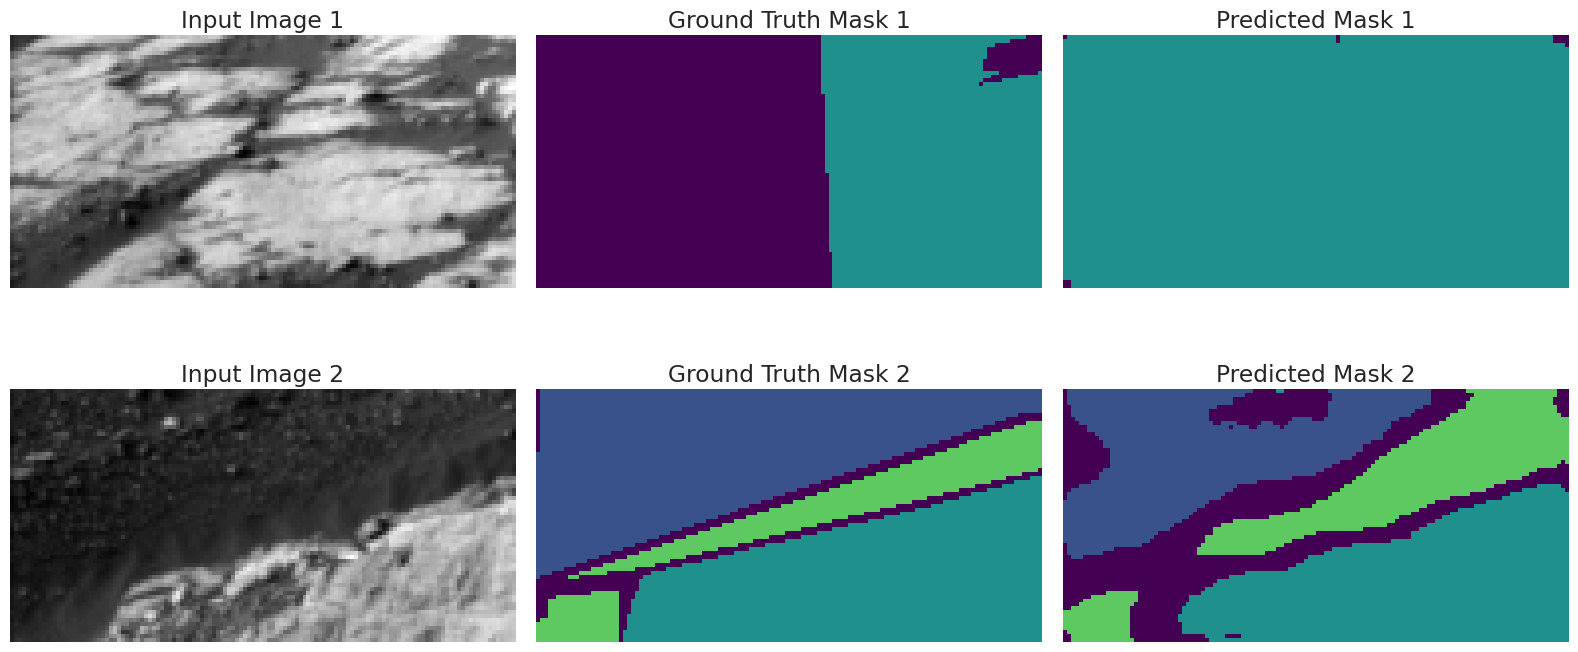

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8354 - loss: 7.6560e-04 - mean_iou: 0.7059 - val_accuracy: 0.7679 - val_loss: 0.0052 - val_mean_iou: 0.4958
Epoch 47/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8441 - loss: 7.4405e-04 - mean_iou: 0.7278 - val_accuracy: 0.7679 - val_loss: 0.0040 - val_mean_iou: 0.5291
Epoch 48/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8402 - loss: 7.4186e-04 - mean_iou: 0.7110 - val_accuracy: 0.7686 - val_loss: 0.0049 - val_mean_iou: 0.5102
Epoch 49/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8448 - loss: 7.3050e-04 - mean_iou: 0.7295 - val_accuracy: 0.7707 - val_loss: 0.0054 - val_mean_iou: 0.5009
Epoch 50/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8420 - loss: 7.2677e-04 - mean_iou: 0.7127 - val_accuracy: 0.7697 - val_loss: 0.0060 - val_mean_iou: 0.4893
Epoch 51/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8465 - loss: 7.1904e-04 - mean_iou: 0.7255

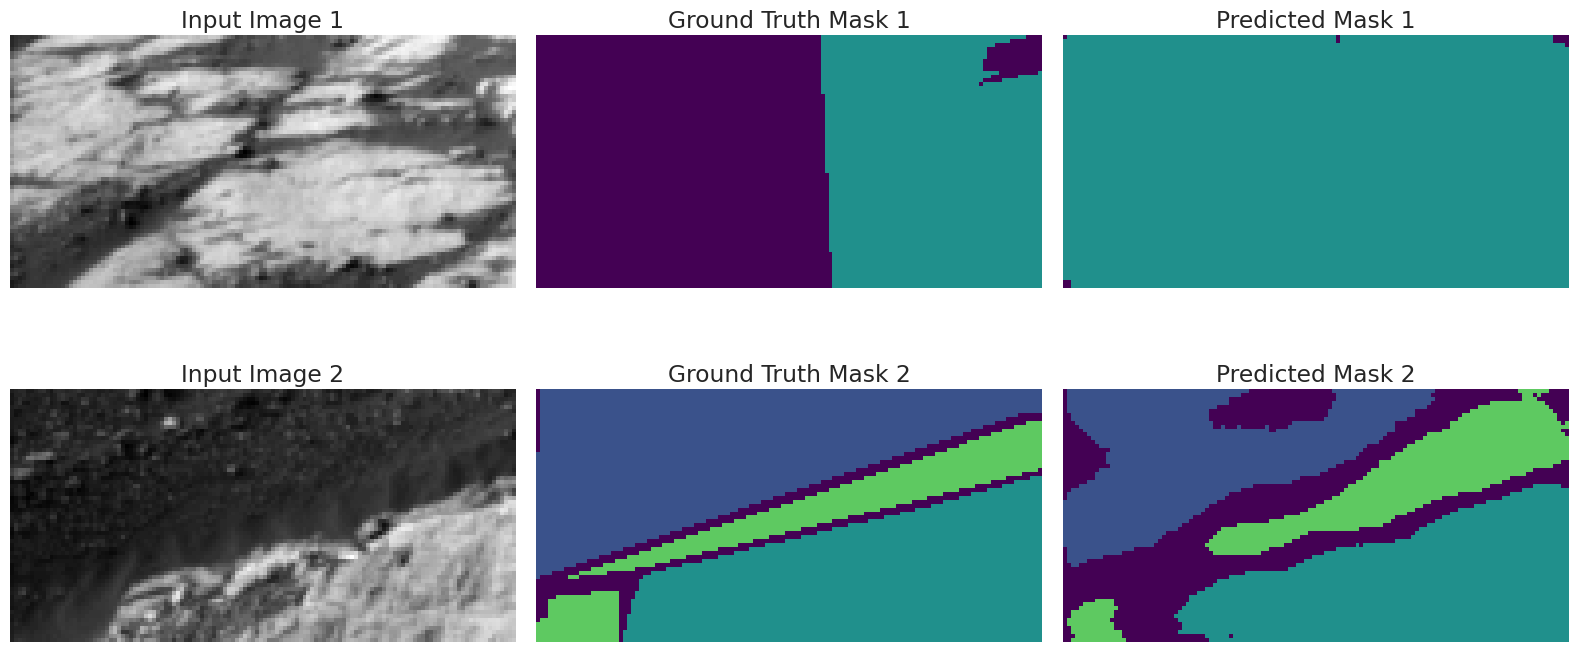

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8465 - loss: 7.2032e-04 - mean_iou: 0.7250 - val_accuracy: 0.7694 - val_loss: 0.0051 - val_mean_iou: 0.5017
Epoch 52/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8451 - loss: 7.2225e-04 - mean_iou: 0.6995 - val_accuracy: 0.7694 - val_loss: 0.0047 - val_mean_iou: 0.5093
Epoch 53/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8374 - loss: 7.4682e-04 - mean_iou: 0.7170 - val_accuracy: 0.7686 - val_loss: 0.0048 - val_mean_iou: 0.5011
Epoch 54/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8424 - loss: 7.3794e-04 - mean_iou: 0.7124 - val_accuracy: 0.7684 - val_loss: 0.0048 - val_mean_iou: 0.5103
Epoch 55/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8463 - loss: 7.0847e-04 - mean_iou: 0.7178 - val_accuracy: 0.7671 - val_loss: 0.0051 - val_mean_iou: 0.5056
Epoch 56/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8440 - loss: 7.2838e-04 - mean_iou: 0.7105

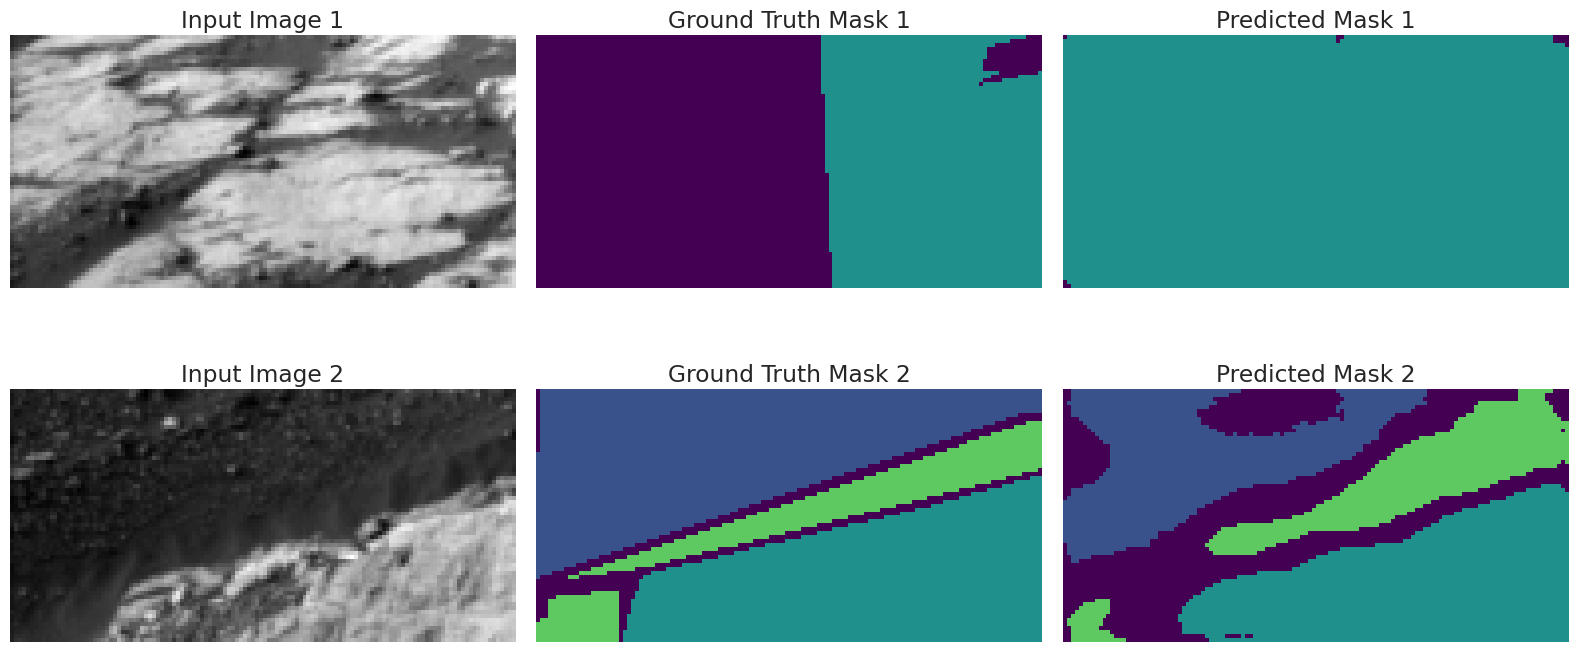

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.8442 - loss: 7.2782e-04 - mean_iou: 0.7110 - val_accuracy: 0.7706 - val_loss: 0.0066 - val_mean_iou: 0.4857
Epoch 57/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8439 - loss: 7.1819e-04 - mean_iou: 0.7230 - val_accuracy: 0.7690 - val_loss: 0.0047 - val_mean_iou: 0.5097
Epoch 58/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8505 - loss: 7.0543e-04 - mean_iou: 0.7166 - val_accuracy: 0.7636 - val_loss: 0.0054 - val_mean_iou: 0.4972
Epoch 59/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8448 - loss: 7.0410e-04 - mean_iou: 0.7197 - val_accuracy: 0.7691 - val_loss: 0.0067 - val_mean_iou: 0.4848
Epoch 60/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8505 - loss: 7.0578e-04 - mean_iou: 0.7273 - val_accuracy: 0.7661 - val_loss: 0.0057 - val_mean_iou: 0.4935
Epoch 61/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8450 - loss: 7.0816e-04 - mean_iou: 0.7293

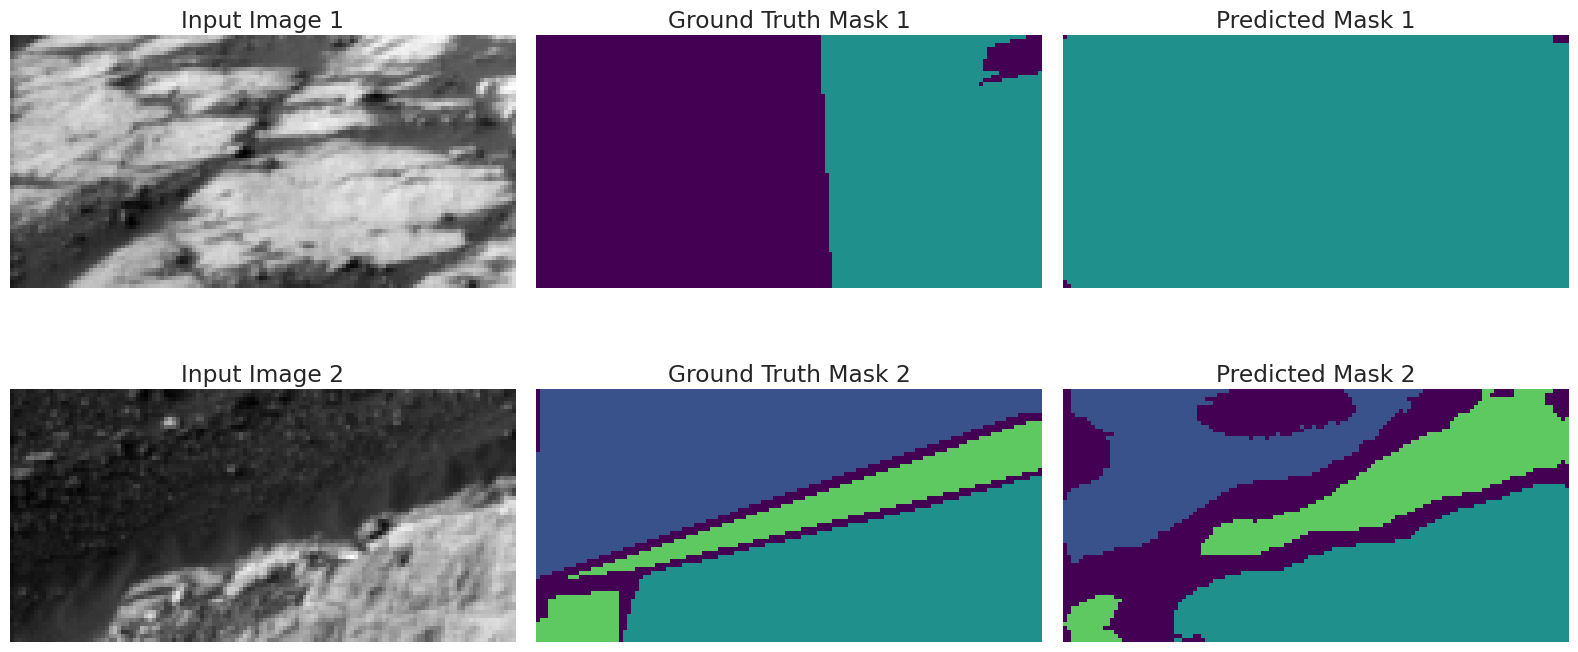

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8454 - loss: 7.0832e-04 - mean_iou: 0.7292 - val_accuracy: 0.7680 - val_loss: 0.0060 - val_mean_iou: 0.4910
Epoch 62/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8484 - loss: 6.9837e-04 - mean_iou: 0.7010 - val_accuracy: 0.7688 - val_loss: 0.0060 - val_mean_iou: 0.4864
Epoch 63/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8484 - loss: 6.8707e-04 - mean_iou: 0.7266 - val_accuracy: 0.7690 - val_loss: 0.0059 - val_mean_iou: 0.4917
Epoch 64/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8510 - loss: 6.9569e-04 - mean_iou: 0.7329 - val_accuracy: 0.7671 - val_loss: 0.0057 - val_mean_iou: 0.4898
Epoch 65/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8498 - loss: 6.8393e-04 - mean_iou: 0.7264 - val_accuracy: 0.7697 - val_loss: 0.0053 - val_mean_iou: 0.5032
Epoch 66/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8487 - loss: 6.8882e-04 - mean_iou: 0.7297

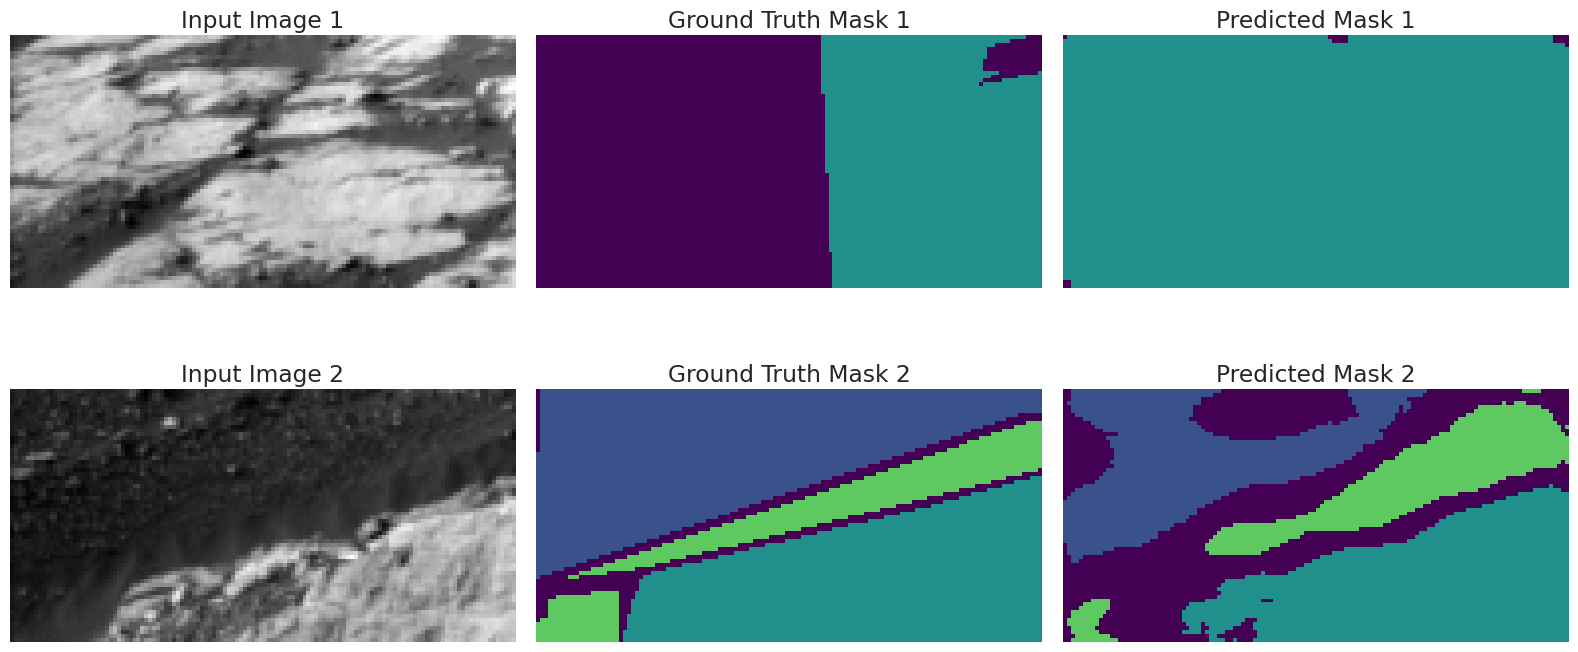

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8488 - loss: 6.8974e-04 - mean_iou: 0.7294 - val_accuracy: 0.7690 - val_loss: 0.0045 - val_mean_iou: 0.5109
Epoch 67/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8504 - loss: 6.8188e-04 - mean_iou: 0.7195 - val_accuracy: 0.7684 - val_loss: 0.0051 - val_mean_iou: 0.5019
Epoch 68/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8511 - loss: 6.8265e-04 - mean_iou: 0.7244 - val_accuracy: 0.7691 - val_loss: 0.0054 - val_mean_iou: 0.5006
Epoch 69/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8494 - loss: 7.3468e-04 - mean_iou: 0.7174 - val_accuracy: 0.7697 - val_loss: 0.0057 - val_mean_iou: 0.4975
Epoch 70/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8528 - loss: 6.8649e-04 - mean_iou: 0.7288 - val_accuracy: 0.7694 - val_loss: 0.0043 - val_mean_iou: 0.5366
Epoch 71/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8508 - loss: 6.7952e-04 - mean_iou: 0.7234

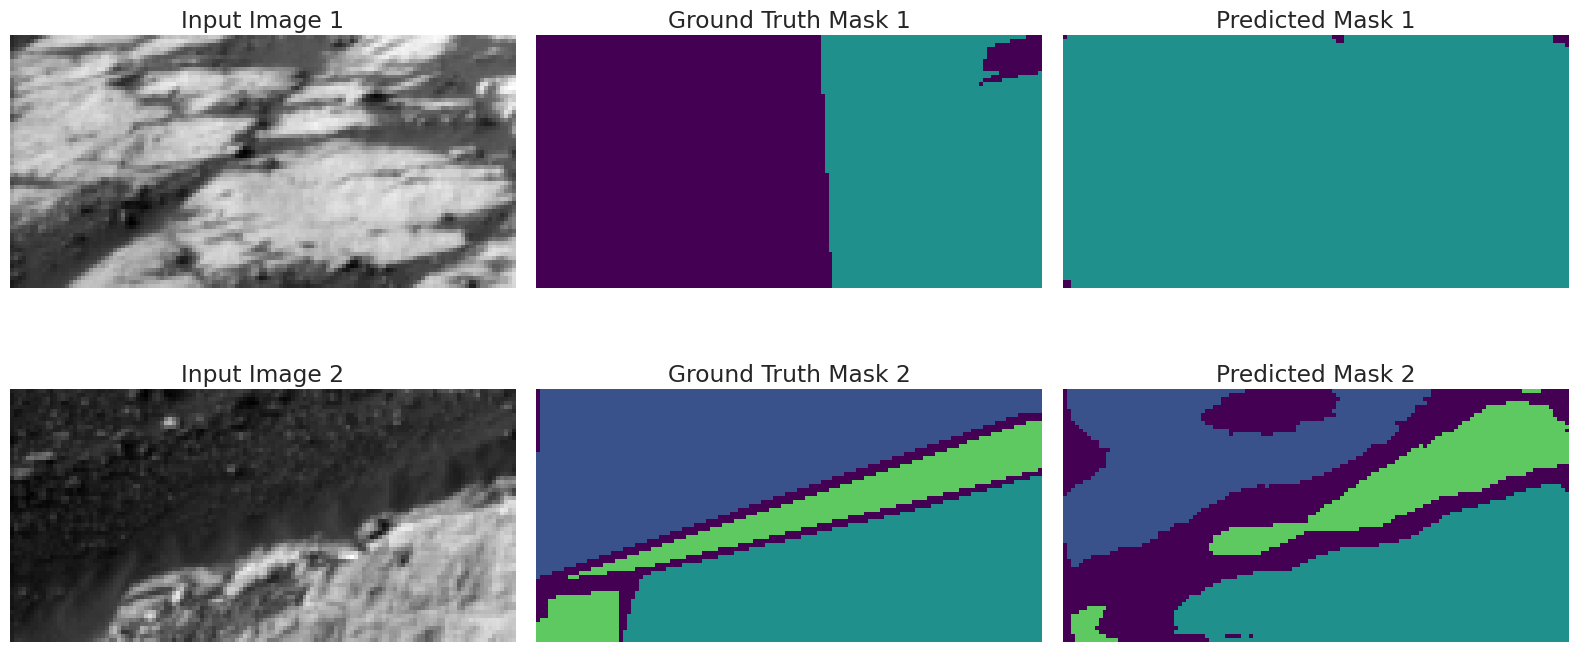

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8510 - loss: 6.8013e-04 - mean_iou: 0.7235 - val_accuracy: 0.7682 - val_loss: 0.0048 - val_mean_iou: 0.5211
Epoch 72/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8511 - loss: 6.8484e-04 - mean_iou: 0.7313 - val_accuracy: 0.7692 - val_loss: 0.0052 - val_mean_iou: 0.5124
Epoch 73/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8518 - loss: 6.5761e-04 - mean_iou: 0.7357 - val_accuracy: 0.7694 - val_loss: 0.0050 - val_mean_iou: 0.5163
Epoch 74/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8558 - loss: 6.6503e-04 - mean_iou: 0.7308 - val_accuracy: 0.7680 - val_loss: 0.0048 - val_mean_iou: 0.5270
Epoch 75/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8555 - loss: 6.6454e-04 - mean_iou: 0.7315 - val_accuracy: 0.7683 - val_loss: 0.0052 - val_mean_iou: 0.5151
Epoch 76/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8514 - loss: 6.7049e-04 - mean_iou: 0.7283

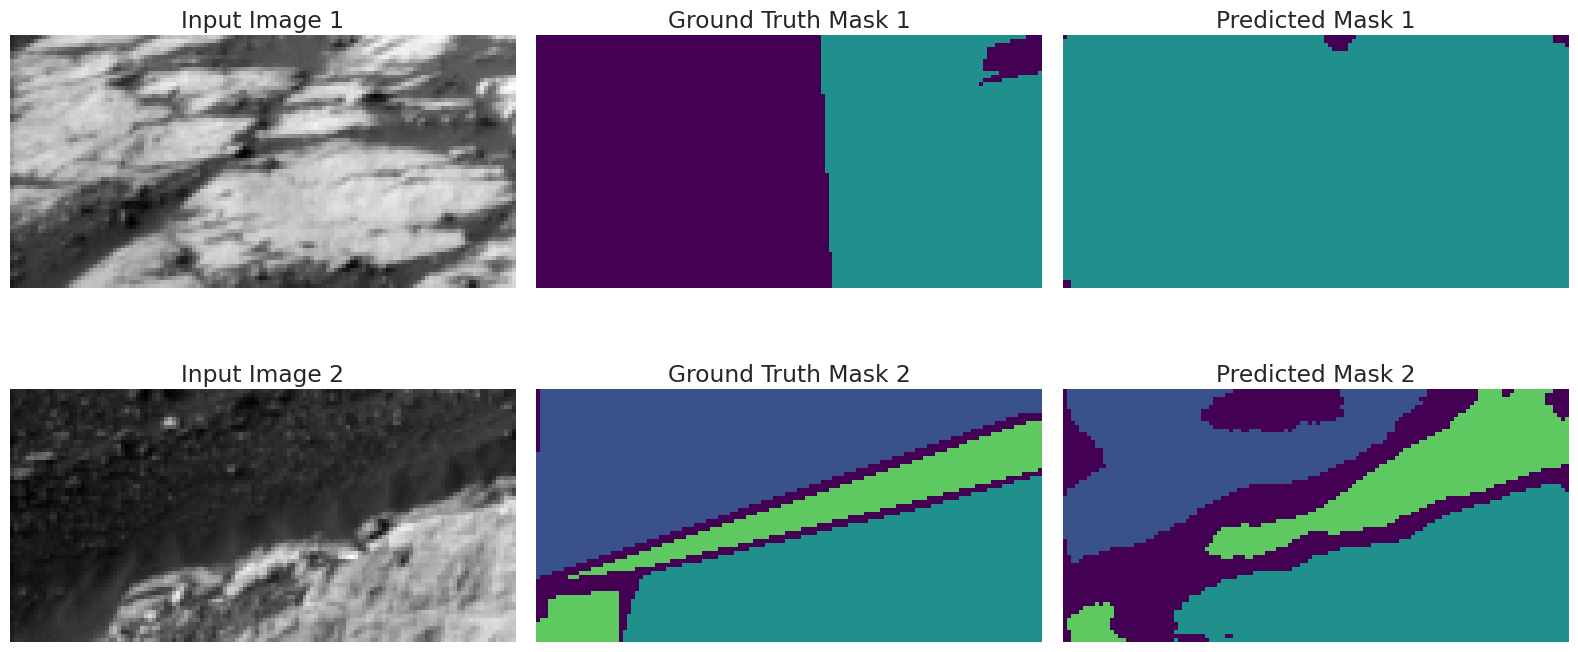

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.8516 - loss: 6.7051e-04 - mean_iou: 0.7286 - val_accuracy: 0.7668 - val_loss: 0.0052 - val_mean_iou: 0.5102
Epoch 77/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8537 - loss: 7.1692e-04 - mean_iou: 0.7277 - val_accuracy: 0.7659 - val_loss: 0.0052 - val_mean_iou: 0.5151
Epoch 78/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8575 - loss: 6.4755e-04 - mean_iou: 0.7248 - val_accuracy: 0.7681 - val_loss: 0.0055 - val_mean_iou: 0.5034
Epoch 79/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8570 - loss: 6.4475e-04 - mean_iou: 0.7179 - val_accuracy: 0.7663 - val_loss: 0.0054 - val_mean_iou: 0.5055
Epoch 80/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8526 - loss: 6.5707e-04 - mean_iou: 0.7326 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5033
Epoch 81/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8535 - loss: 6.4862e-04 - mean_iou: 0.7333

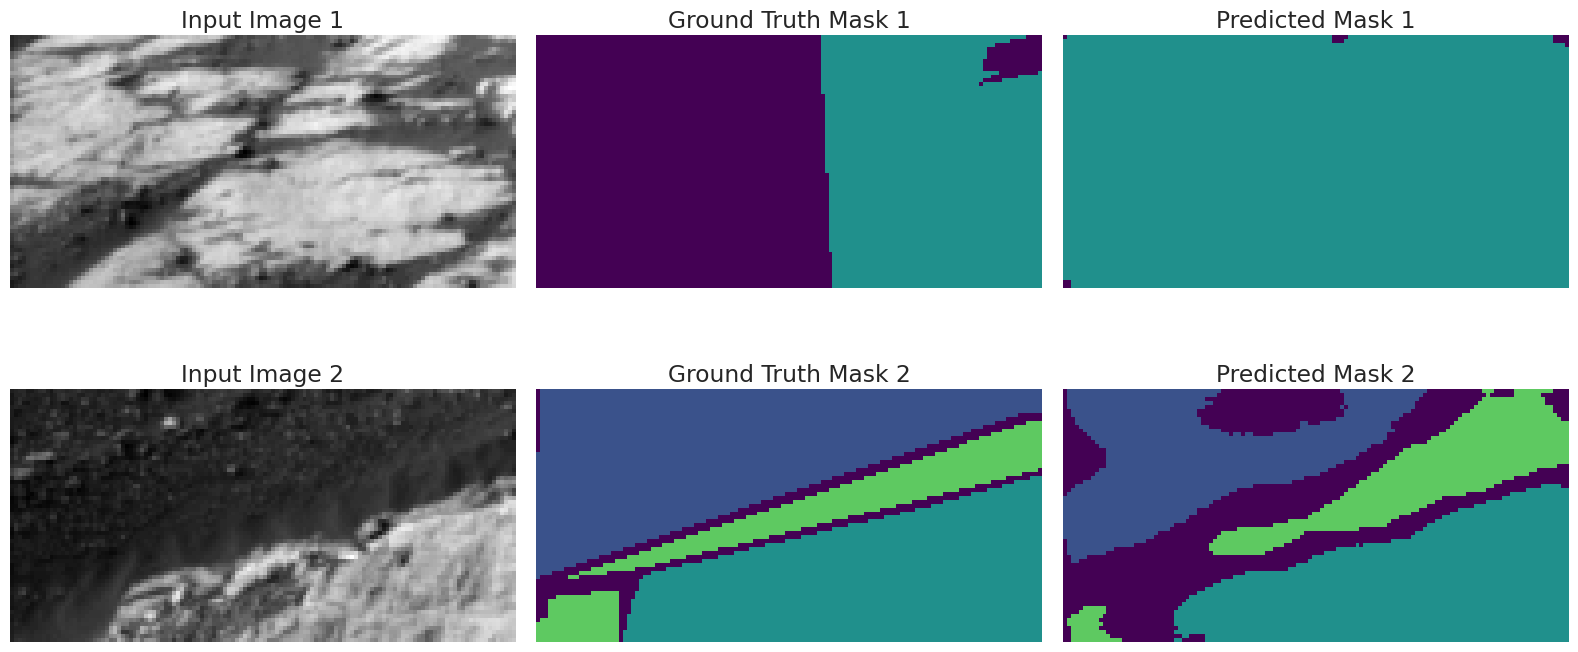

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8537 - loss: 6.4910e-04 - mean_iou: 0.7335 - val_accuracy: 0.7655 - val_loss: 0.0056 - val_mean_iou: 0.5013
Epoch 82/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8493 - loss: 6.9710e-04 - mean_iou: 0.7252 - val_accuracy: 0.7670 - val_loss: 0.0058 - val_mean_iou: 0.4994
Epoch 83/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8543 - loss: 6.5411e-04 - mean_iou: 0.7275 - val_accuracy: 0.7664 - val_loss: 0.0061 - val_mean_iou: 0.4933
Epoch 84/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8562 - loss: 6.3985e-04 - mean_iou: 0.7318 - val_accuracy: 0.7656 - val_loss: 0.0064 - val_mean_iou: 0.4897
Epoch 85/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8532 - loss: 6.5258e-04 - mean_iou: 0.7262 - val_accuracy: 0.7669 - val_loss: 0.0054 - val_mean_iou: 0.5088
Epoch 86/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8541 - loss: 6.6643e-04 - mean_iou: 0.7215

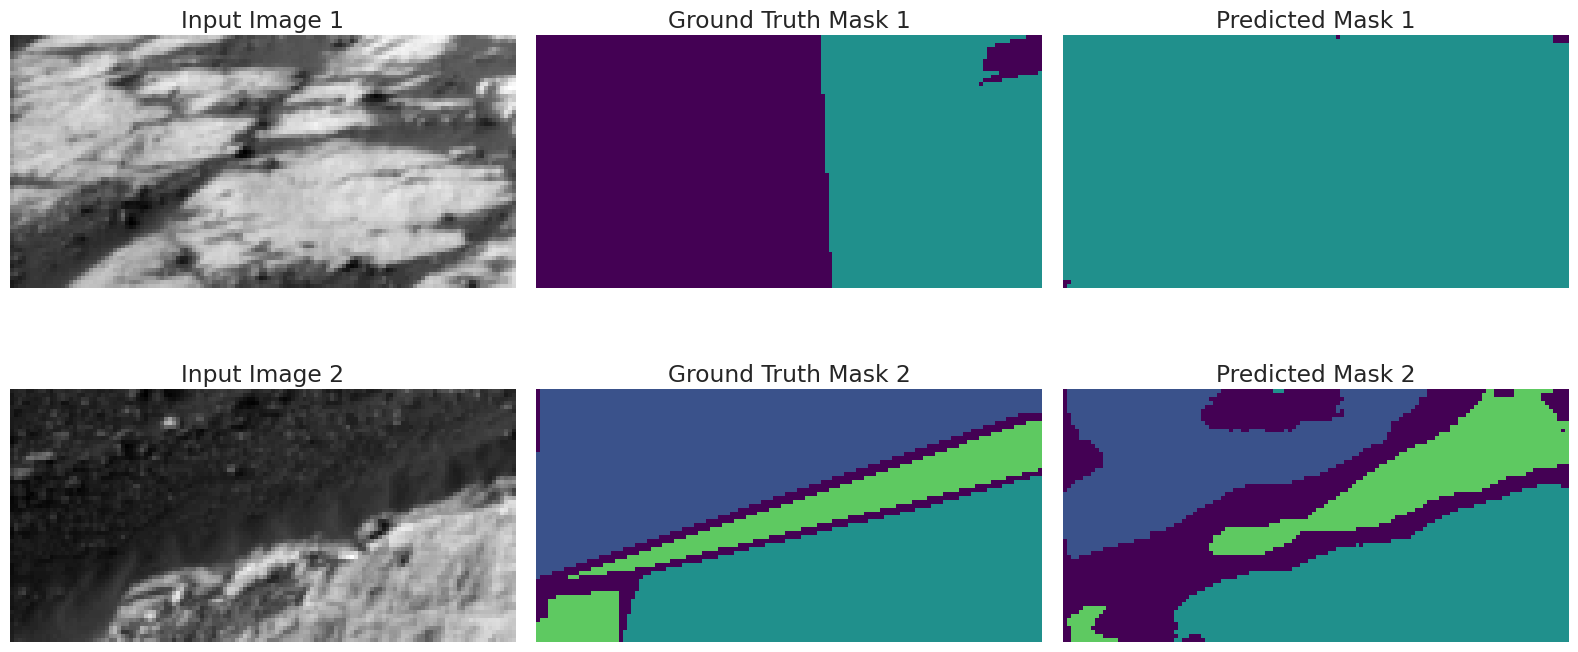

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8543 - loss: 6.6642e-04 - mean_iou: 0.7218 - val_accuracy: 0.7672 - val_loss: 0.0051 - val_mean_iou: 0.5146
Epoch 87/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8549 - loss: 6.3755e-04 - mean_iou: 0.7283 - val_accuracy: 0.7676 - val_loss: 0.0052 - val_mean_iou: 0.5129
Epoch 88/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8562 - loss: 6.3835e-04 - mean_iou: 0.7346 - val_accuracy: 0.7678 - val_loss: 0.0053 - val_mean_iou: 0.5132
Epoch 89/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8569 - loss: 6.4852e-04 - mean_iou: 0.7346 - val_accuracy: 0.7682 - val_loss: 0.0049 - val_mean_iou: 0.5263
Epoch 90/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8588 - loss: 6.2762e-04 - mean_iou: 0.7358 - val_accuracy: 0.7675 - val_loss: 0.0052 - val_mean_iou: 0.5198
Epoch 91/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8589 - loss: 6.2530e-04 - mean_iou: 0.7261

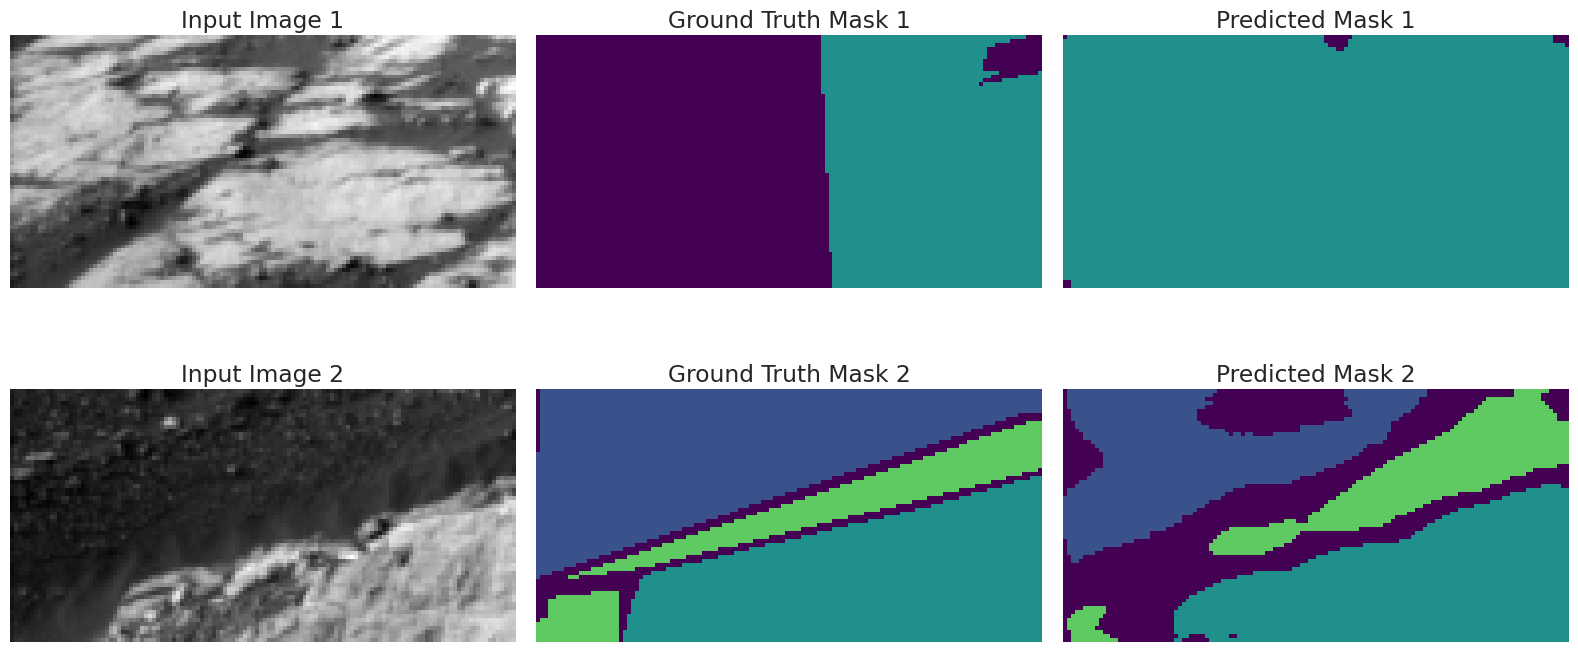

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8589 - loss: 6.2674e-04 - mean_iou: 0.7264 - val_accuracy: 0.7669 - val_loss: 0.0051 - val_mean_iou: 0.5197
Epoch 92/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8569 - loss: 6.3947e-04 - mean_iou: 0.7381 - val_accuracy: 0.7671 - val_loss: 0.0055 - val_mean_iou: 0.5120
Epoch 93/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8616 - loss: 6.1652e-04 - mean_iou: 0.7411 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5086
Epoch 94/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8604 - loss: 6.2602e-04 - mean_iou: 0.7401 - val_accuracy: 0.7675 - val_loss: 0.0057 - val_mean_iou: 0.5043
Epoch 95/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8599 - loss: 6.2806e-04 - mean_iou: 0.7358 - val_accuracy: 0.7680 - val_loss: 0.0055 - val_mean_iou: 0.5073
Epoch 96/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8581 - loss: 6.3726e-04 - mean_iou: 0.7250

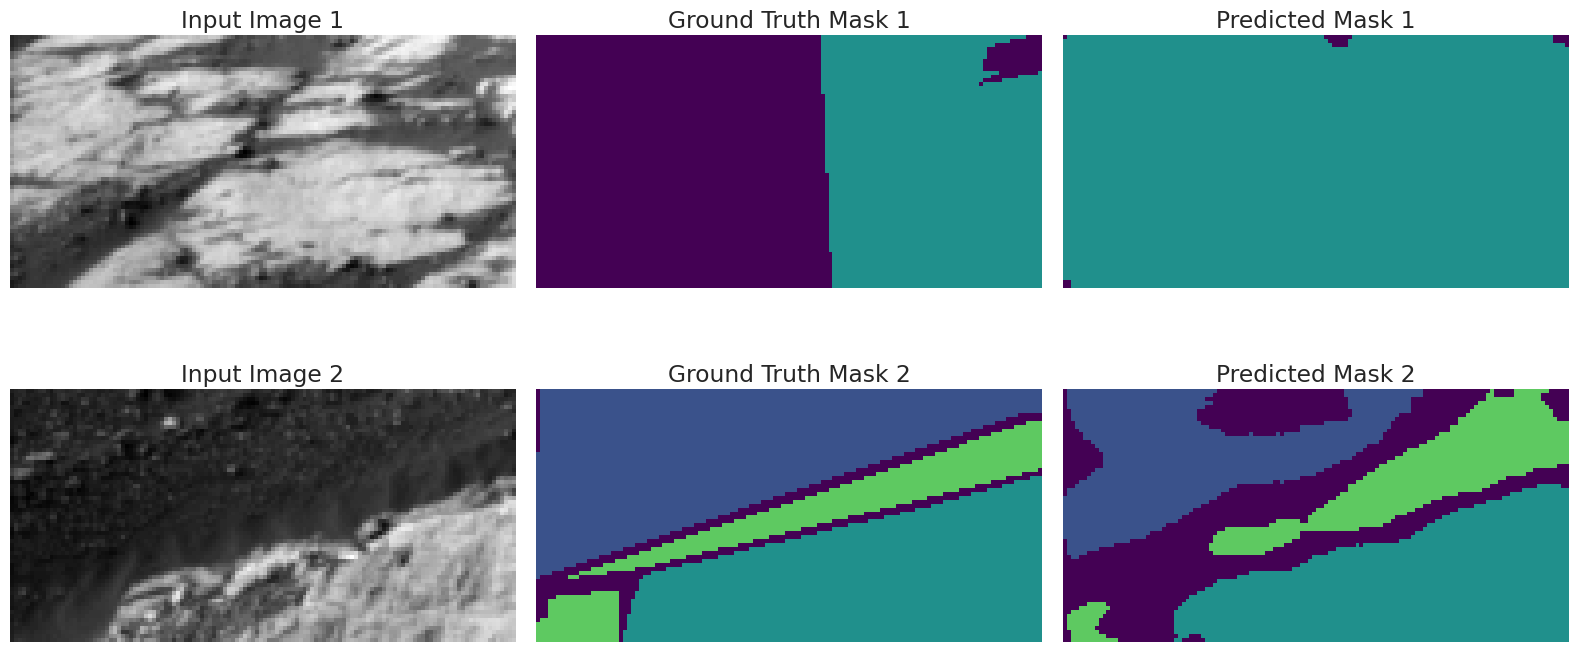

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8583 - loss: 6.3727e-04 - mean_iou: 0.7255 - val_accuracy: 0.7676 - val_loss: 0.0058 - val_mean_iou: 0.5029
Epoch 97/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8574 - loss: 6.3740e-04 - mean_iou: 0.7363 - val_accuracy: 0.7675 - val_loss: 0.0055 - val_mean_iou: 0.5062
Epoch 98/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8600 - loss: 6.1814e-04 - mean_iou: 0.7273 - val_accuracy: 0.7675 - val_loss: 0.0052 - val_mean_iou: 0.5151
Epoch 99/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8586 - loss: 6.3303e-04 - mean_iou: 0.7313 - val_accuracy: 0.7673 - val_loss: 0.0053 - val_mean_iou: 0.5149
Epoch 100/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8594 - loss: 6.2801e-04 - mean_iou: 0.7313 - val_accuracy: 0.7671 - val_loss: 0.0051 - val_mean_iou: 0.5285
Epoch 101/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8597 - loss: 6.2722e-04 - mean_iou: 0.7388

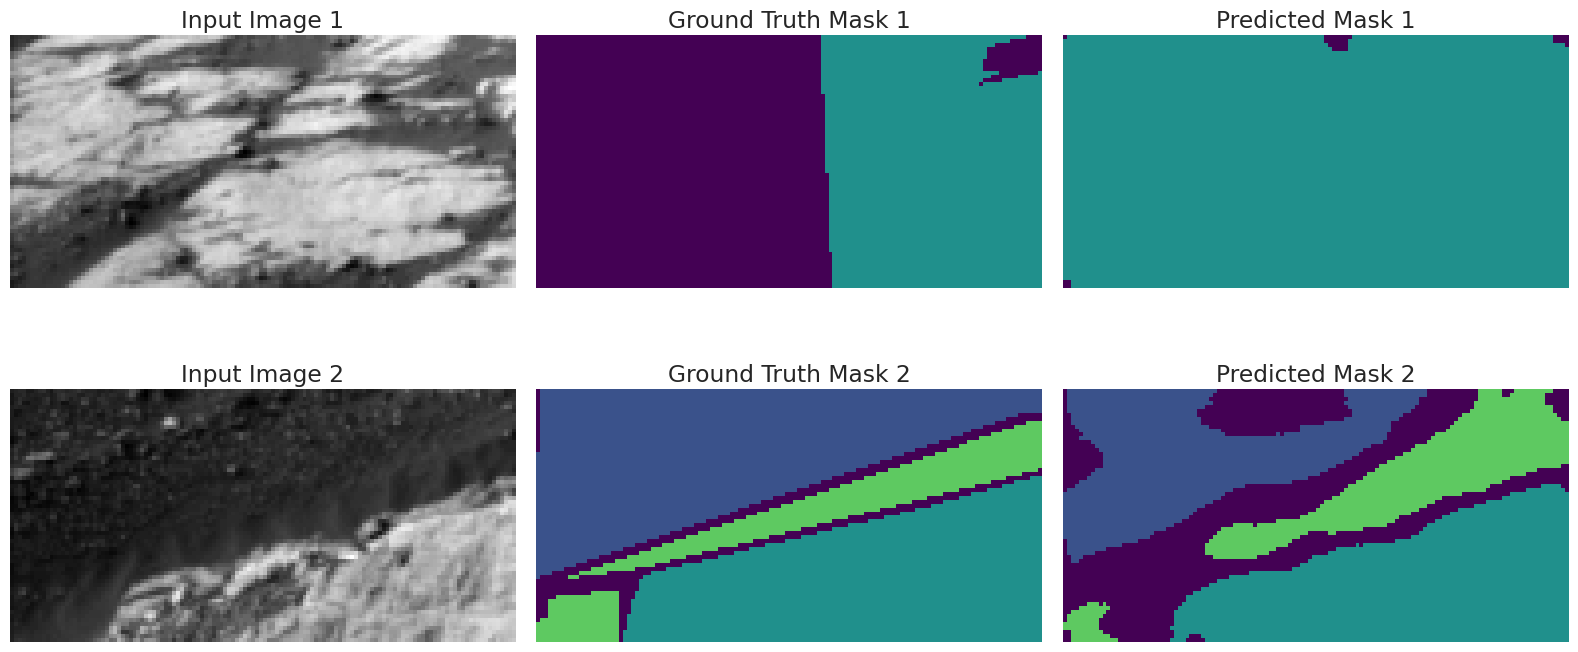

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8597 - loss: 6.2786e-04 - mean_iou: 0.7386 - val_accuracy: 0.7666 - val_loss: 0.0052 - val_mean_iou: 0.5212
Epoch 102/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8575 - loss: 6.2775e-04 - mean_iou: 0.7408 - val_accuracy: 0.7664 - val_loss: 0.0054 - val_mean_iou: 0.5170
Epoch 103/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8566 - loss: 6.3930e-04 - mean_iou: 0.7364 - val_accuracy: 0.7669 - val_loss: 0.0054 - val_mean_iou: 0.5142
Epoch 104/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8582 - loss: 6.3867e-04 - mean_iou: 0.7254 - val_accuracy: 0.7667 - val_loss: 0.0054 - val_mean_iou: 0.5141
Epoch 105/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8587 - loss: 6.3509e-04 - mean_iou: 0.7351 - val_accuracy: 0.7674 - val_loss: 0.0055 - val_mean_iou: 0.5125
Epoch 106/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8632 - loss: 6.0860e-04 - mean_iou: 0.7437

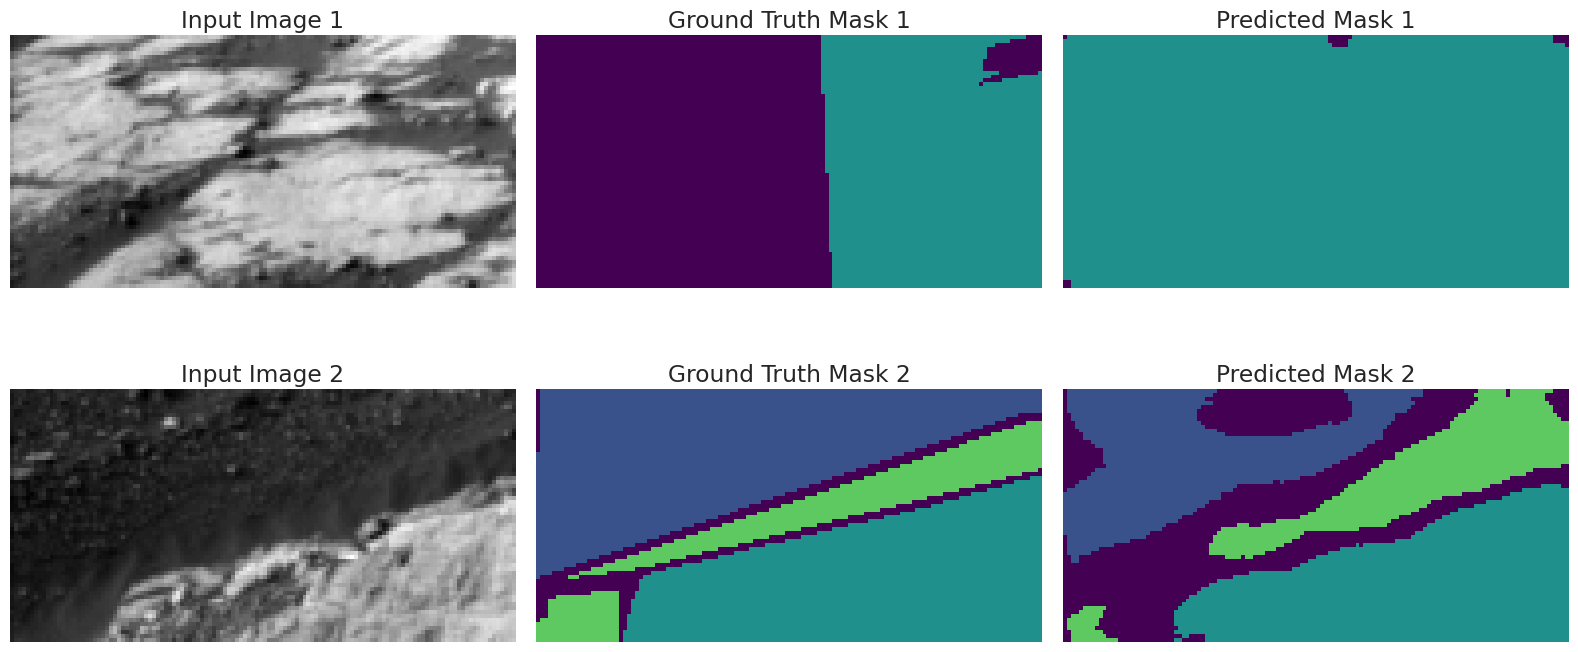

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8632 - loss: 6.0969e-04 - mean_iou: 0.7436 - val_accuracy: 0.7668 - val_loss: 0.0054 - val_mean_iou: 0.5123
Epoch 107/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8605 - loss: 6.3131e-04 - mean_iou: 0.7368 - val_accuracy: 0.7668 - val_loss: 0.0055 - val_mean_iou: 0.5116
Epoch 108/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8572 - loss: 6.3504e-04 - mean_iou: 0.7308 - val_accuracy: 0.7665 - val_loss: 0.0056 - val_mean_iou: 0.5087
Epoch 109/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8581 - loss: 6.2244e-04 - mean_iou: 0.7397 - val_accuracy: 0.7658 - val_loss: 0.0056 - val_mean_iou: 0.5081
Epoch 110/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8567 - loss: 6.4065e-04 - mean_iou: 0.7285 - val_accuracy: 0.7660 - val_loss: 0.0055 - val_mean_iou: 0.5126
Epoch 111/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8632 - loss: 6.1407e-04 - mean_iou: 0.7347

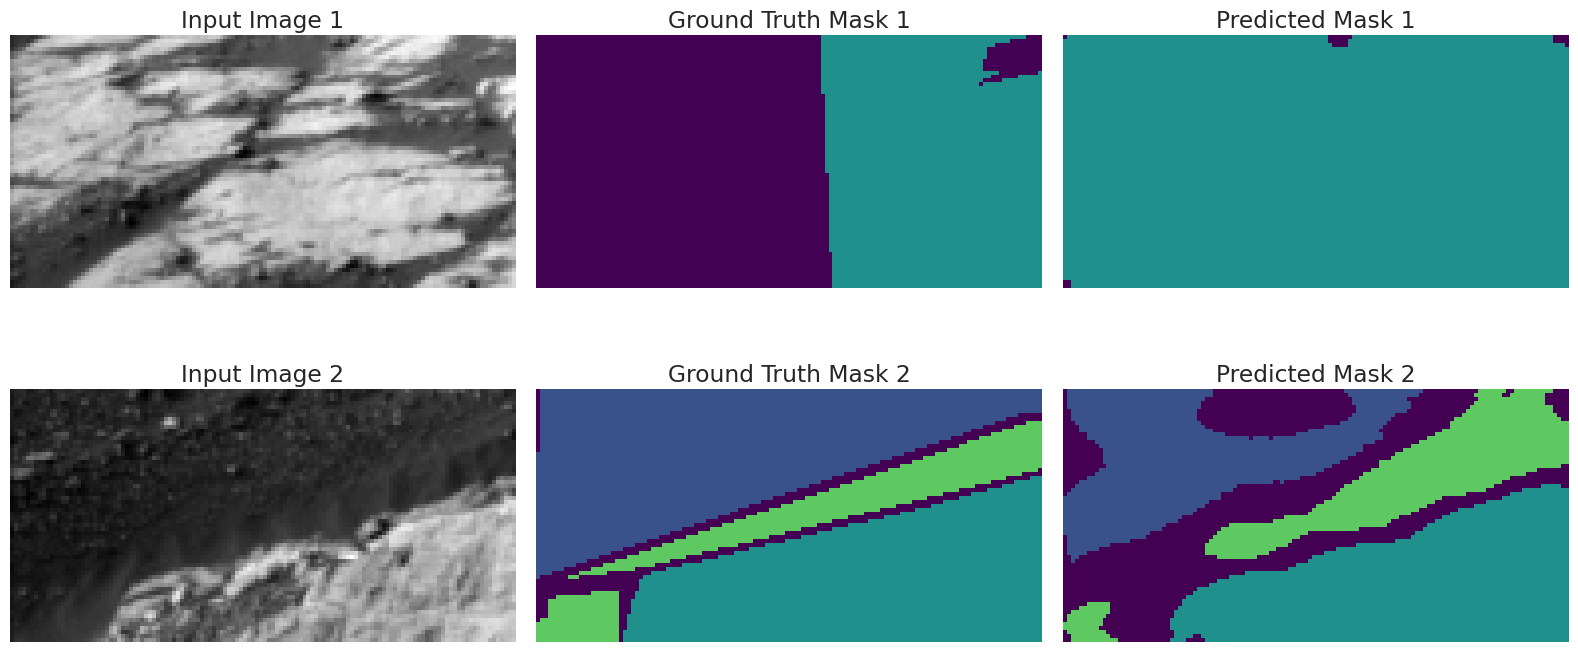

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.8632 - loss: 6.1529e-04 - mean_iou: 0.7348 - val_accuracy: 0.7662 - val_loss: 0.0055 - val_mean_iou: 0.5120
Epoch 112/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8597 - loss: 6.3055e-04 - mean_iou: 0.7311 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5118
Epoch 113/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8576 - loss: 6.3213e-04 - mean_iou: 0.7156 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5112
Epoch 114/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8599 - loss: 6.2032e-04 - mean_iou: 0.7335 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5112
Epoch 115/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8596 - loss: 6.2535e-04 - mean_iou: 0.7353 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5101
Epoch 116/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8565 - loss: 6.3768e-04 - mean_iou: 0.7362

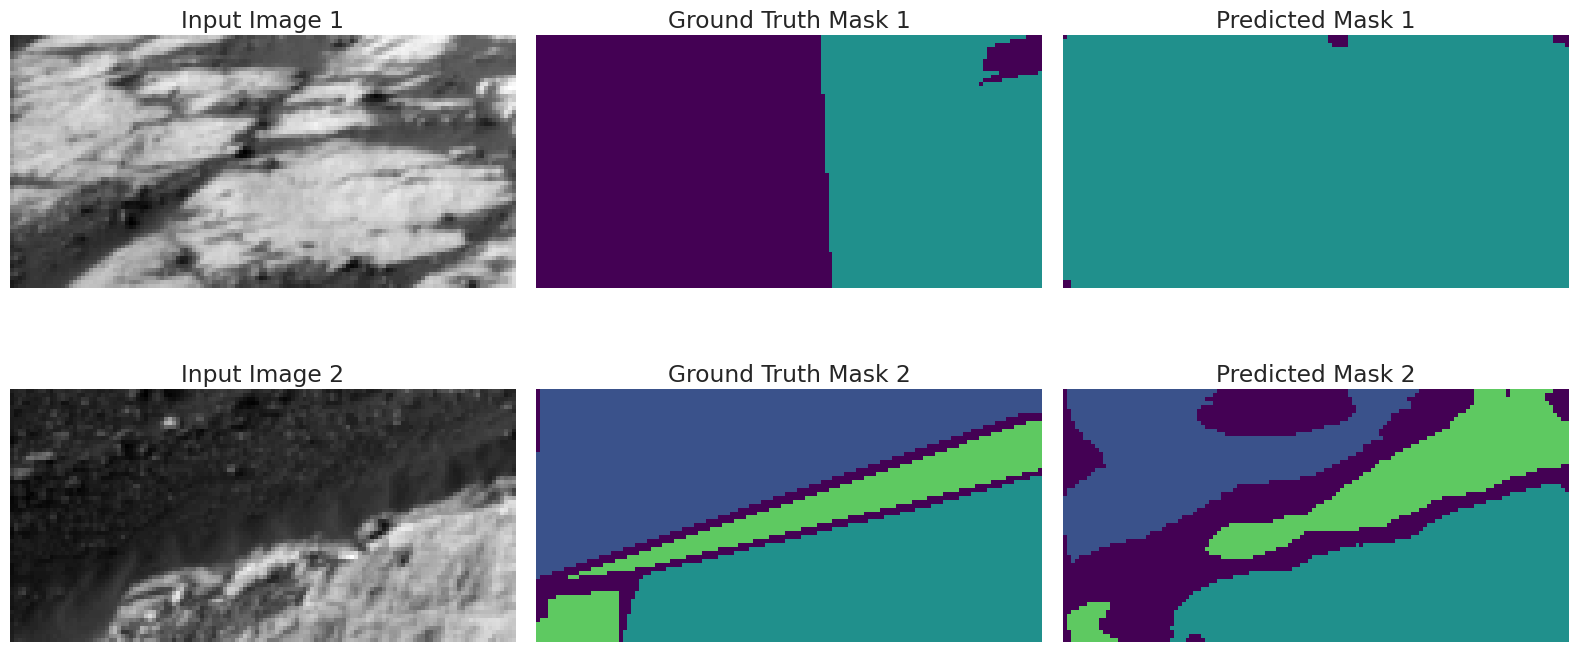

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8567 - loss: 6.3731e-04 - mean_iou: 0.7363 - val_accuracy: 0.7665 - val_loss: 0.0056 - val_mean_iou: 0.5087
Epoch 117/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8600 - loss: 6.2055e-04 - mean_iou: 0.7129 - val_accuracy: 0.7664 - val_loss: 0.0057 - val_mean_iou: 0.5071
Epoch 118/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8586 - loss: 6.3507e-04 - mean_iou: 0.7283 - val_accuracy: 0.7664 - val_loss: 0.0056 - val_mean_iou: 0.5103
Epoch 119/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8611 - loss: 6.1955e-04 - mean_iou: 0.7370 - val_accuracy: 0.7664 - val_loss: 0.0056 - val_mean_iou: 0.5094
Epoch 120/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8603 - loss: 6.2119e-04 - mean_iou: 0.7385 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5110
Epoch 121/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8643 - loss: 6.1827e-04 - mean_iou: 0.7390

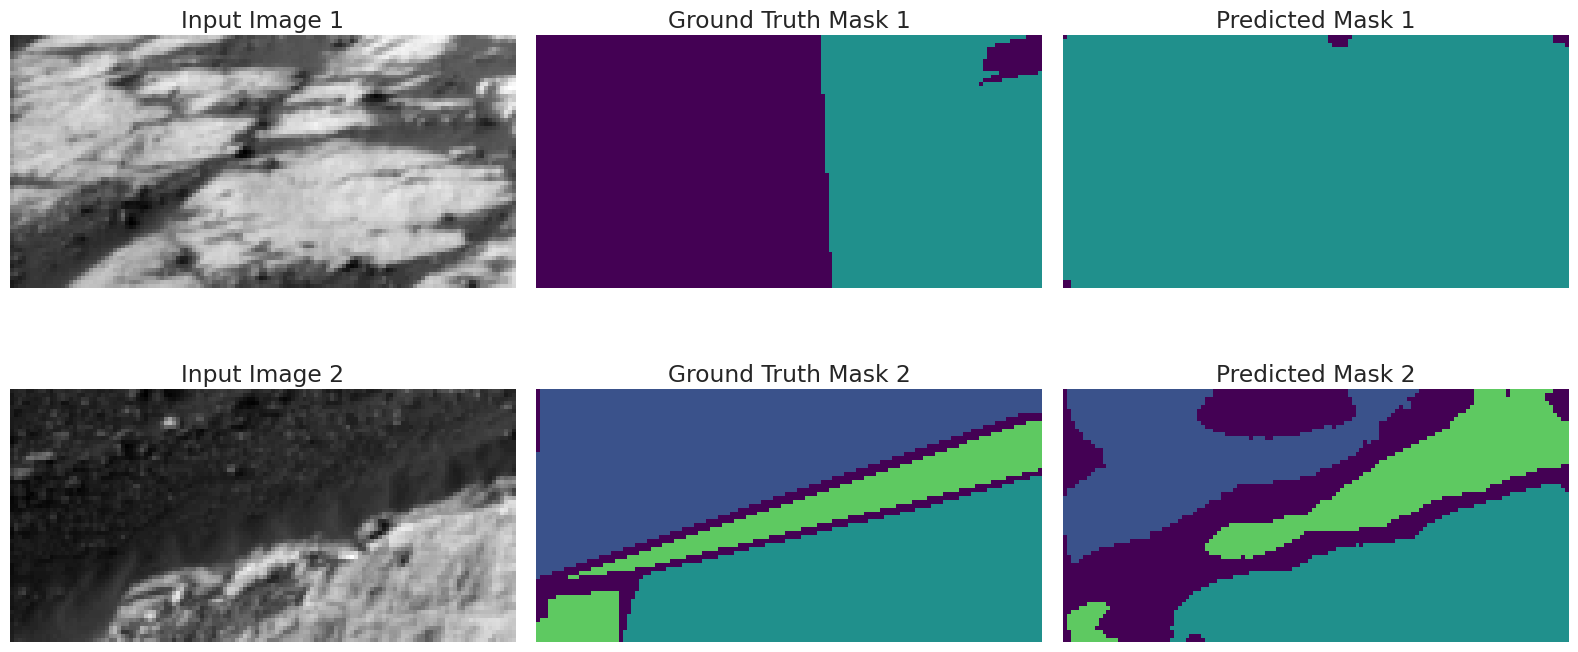

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8642 - loss: 6.1872e-04 - mean_iou: 0.7387 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5111
Epoch 122/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8594 - loss: 6.0693e-04 - mean_iou: 0.7319 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5118
Epoch 123/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8586 - loss: 6.2963e-04 - mean_iou: 0.7313 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5115
Epoch 124/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8619 - loss: 6.2055e-04 - mean_iou: 0.7332 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5115
Epoch 125/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8631 - loss: 6.1089e-04 - mean_iou: 0.7240 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5119
Epoch 126/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8603 - loss: 6.2750e-04 - mean_iou: 0.7360

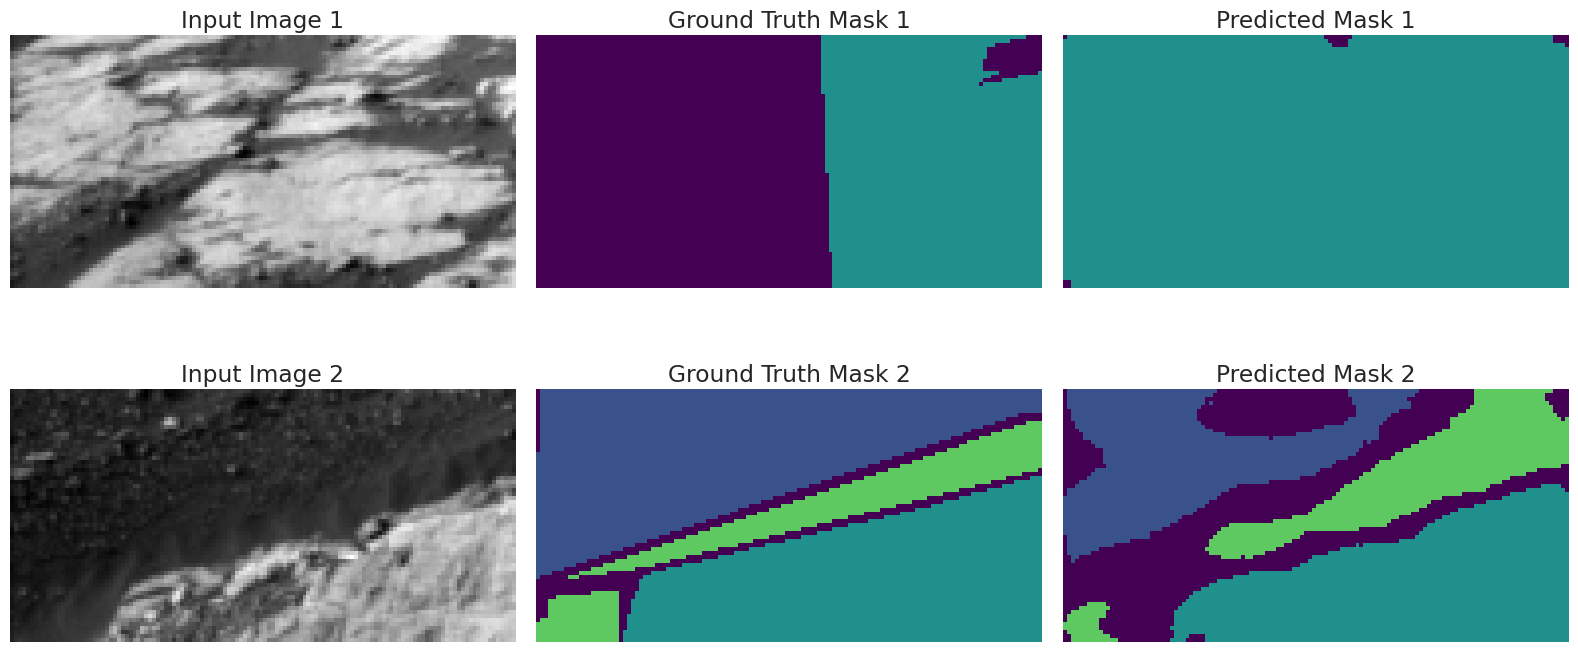

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8606 - loss: 6.2734e-04 - mean_iou: 0.7362 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5122
Epoch 127/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8588 - loss: 6.4499e-04 - mean_iou: 0.7371 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5125
Epoch 128/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8616 - loss: 6.1386e-04 - mean_iou: 0.7383 - val_accuracy: 0.7666 - val_loss: 0.0055 - val_mean_iou: 0.5124
Epoch 129/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8578 - loss: 6.2779e-04 - mean_iou: 0.7264 - val_accuracy: 0.7666 - val_loss: 0.0055 - val_mean_iou: 0.5124
Epoch 130/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8612 - loss: 6.1907e-04 - mean_iou: 0.7395 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5120
Epoch 131/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step - accuracy: 0.8620 - loss: 6.2502e-04 - mean_iou: 0.7378

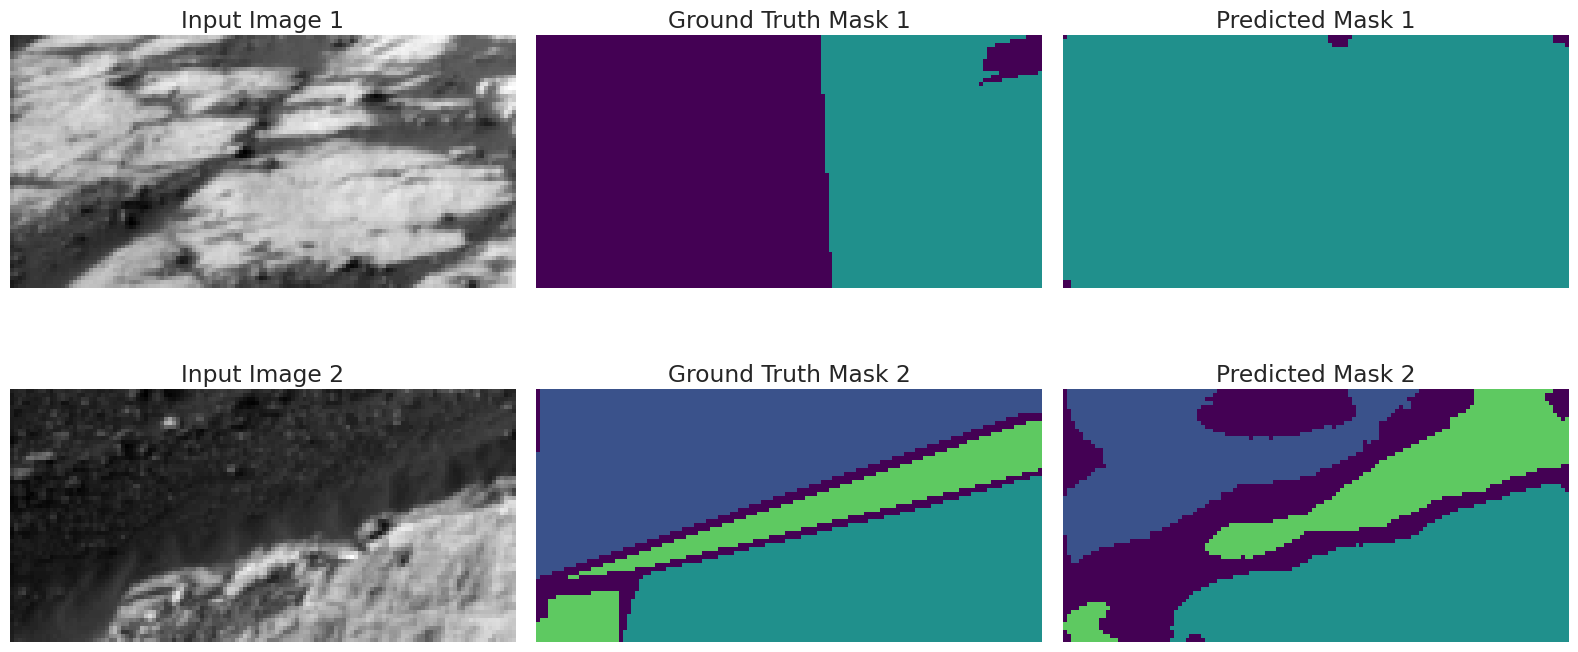

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8621 - loss: 6.2551e-04 - mean_iou: 0.7376 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5119
Epoch 132/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8587 - loss: 6.2046e-04 - mean_iou: 0.7351 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5119
Epoch 133/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8610 - loss: 6.2708e-04 - mean_iou: 0.7291 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5120
Epoch 134/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8592 - loss: 6.1684e-04 - mean_iou: 0.7272 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5122
Epoch 135/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8586 - loss: 6.2805e-04 - mean_iou: 0.7277 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5122
Epoch 136/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8627 - loss: 6.3124e-04 - mean_iou: 0.7391

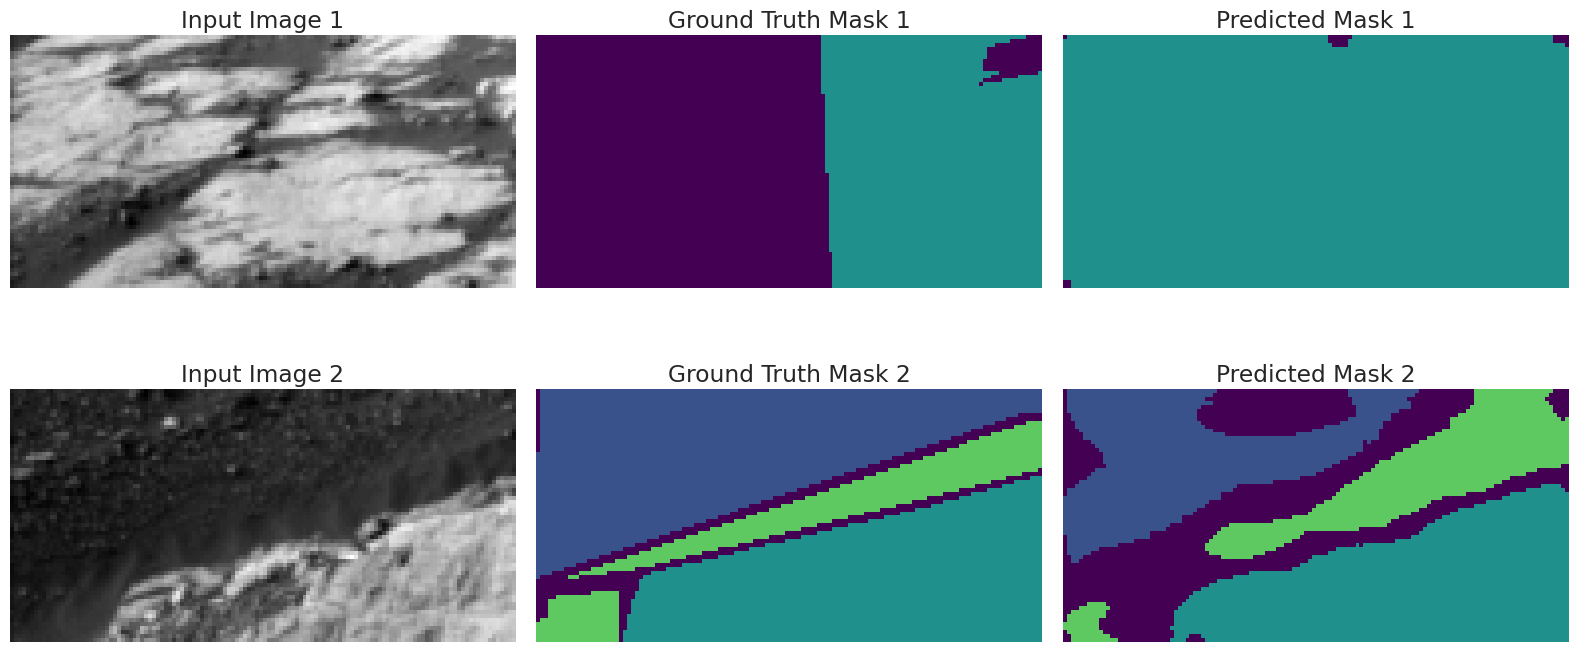

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8626 - loss: 6.3257e-04 - mean_iou: 0.7389 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5126
Epoch 137/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8604 - loss: 6.1940e-04 - mean_iou: 0.7337 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5123
Epoch 138/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 124ms/step - accuracy: 0.8554 - loss: 6.4794e-04 - mean_iou: 0.7277 - val_accuracy: 0.7664 - val_loss: 0.0054 - val_mean_iou: 0.5128
Epoch 139/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8608 - loss: 6.1786e-04 - mean_iou: 0.7334 - val_accuracy: 0.7664 - val_loss: 0.0054 - val_mean_iou: 0.5123
Epoch 140/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8585 - loss: 6.2850e-04 - mean_iou: 0.7363 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5123
Epoch 141/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8593 - loss: 6.1880e-04 - mean_iou: 0.7355

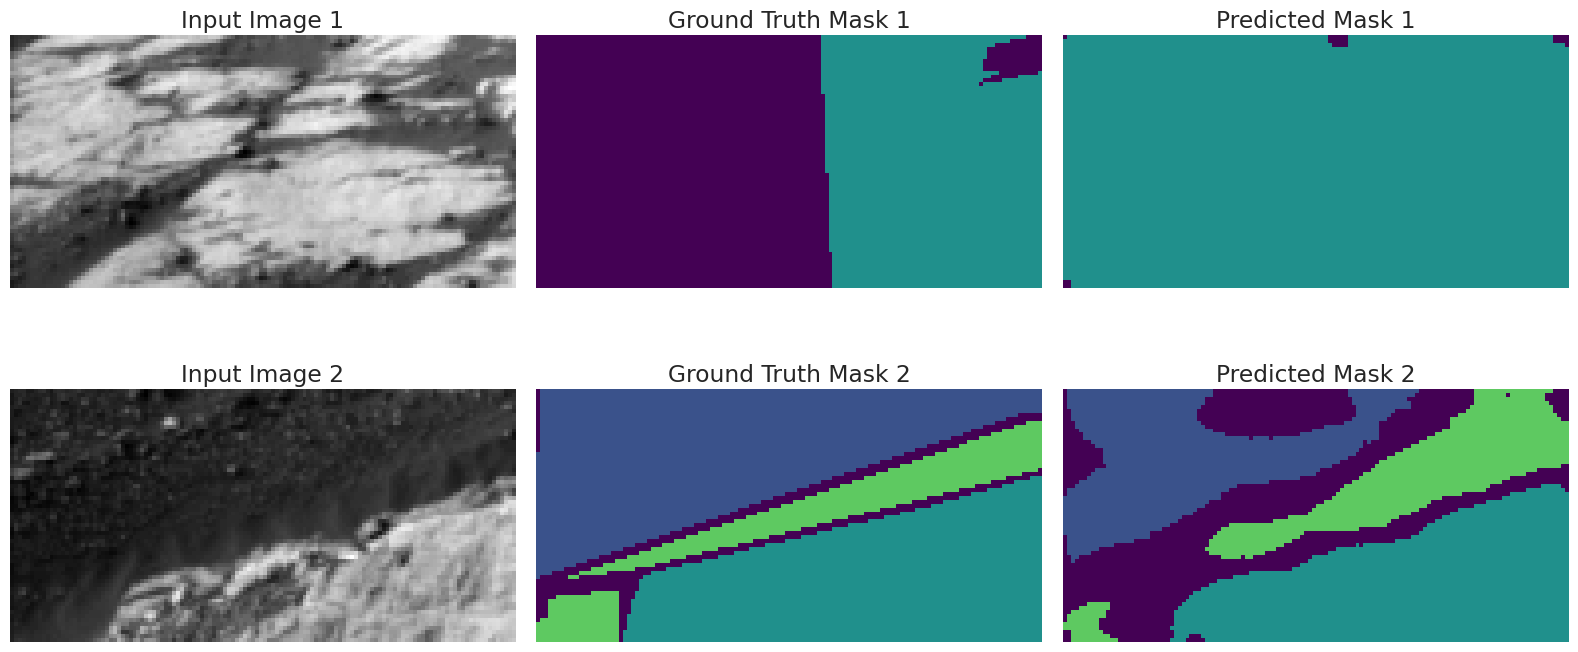

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8595 - loss: 6.1941e-04 - mean_iou: 0.7357 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5122
Epoch 142/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8598 - loss: 6.2685e-04 - mean_iou: 0.7309 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5120
Epoch 143/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8650 - loss: 6.1872e-04 - mean_iou: 0.7426 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5125
Epoch 144/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8607 - loss: 6.1092e-04 - mean_iou: 0.7324 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5126
Epoch 145/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8588 - loss: 6.2531e-04 - mean_iou: 0.7269 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5121
Epoch 146/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8617 - loss: 6.1655e-04 - mean_iou: 0.7383

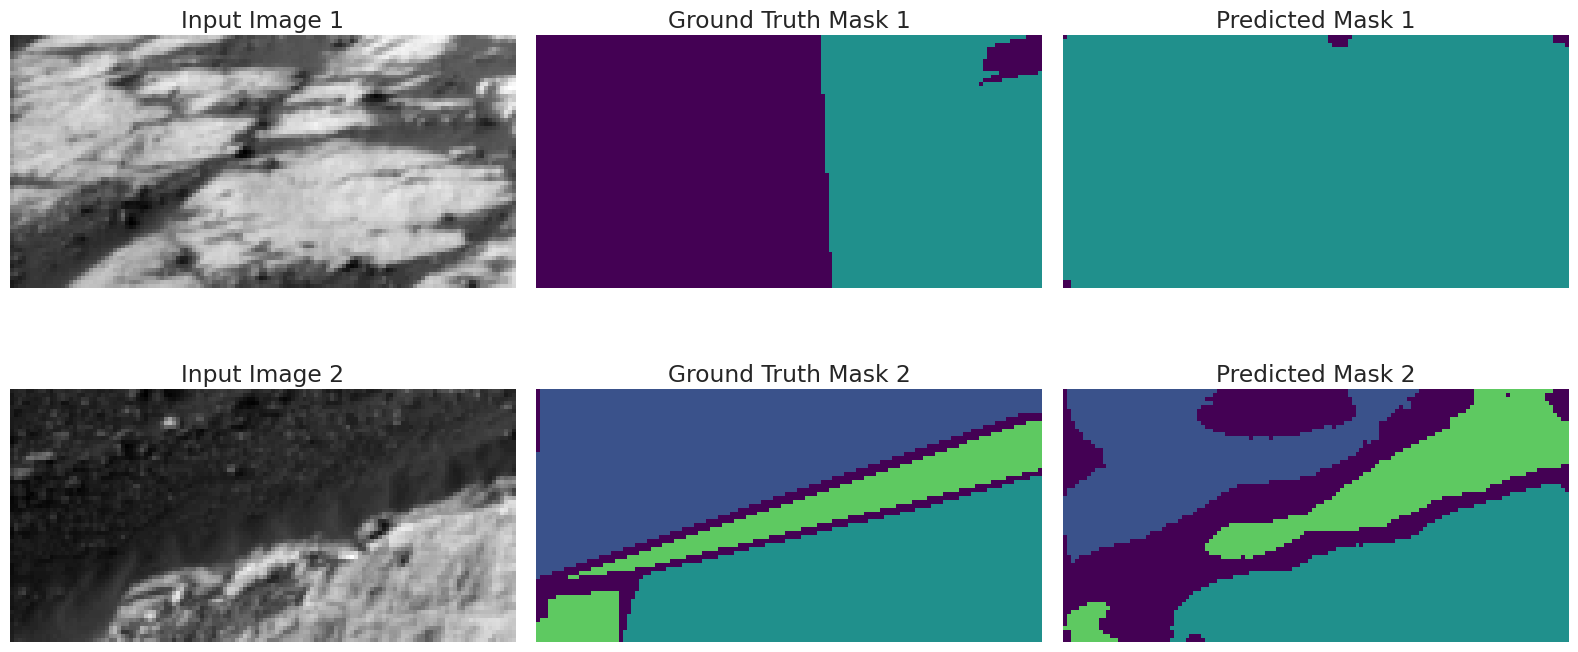

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8616 - loss: 6.1756e-04 - mean_iou: 0.7380 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5122
Epoch 147/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8623 - loss: 6.0838e-04 - mean_iou: 0.7313 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5120
Epoch 148/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8600 - loss: 6.3576e-04 - mean_iou: 0.7362 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5116
Epoch 149/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8614 - loss: 6.3969e-04 - mean_iou: 0.7375 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5120
Epoch 150/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8592 - loss: 6.2311e-04 - mean_iou: 0.7314 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5124
Epoch 151/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8575 - loss: 6.3230e-04 - mean_iou: 0.7382

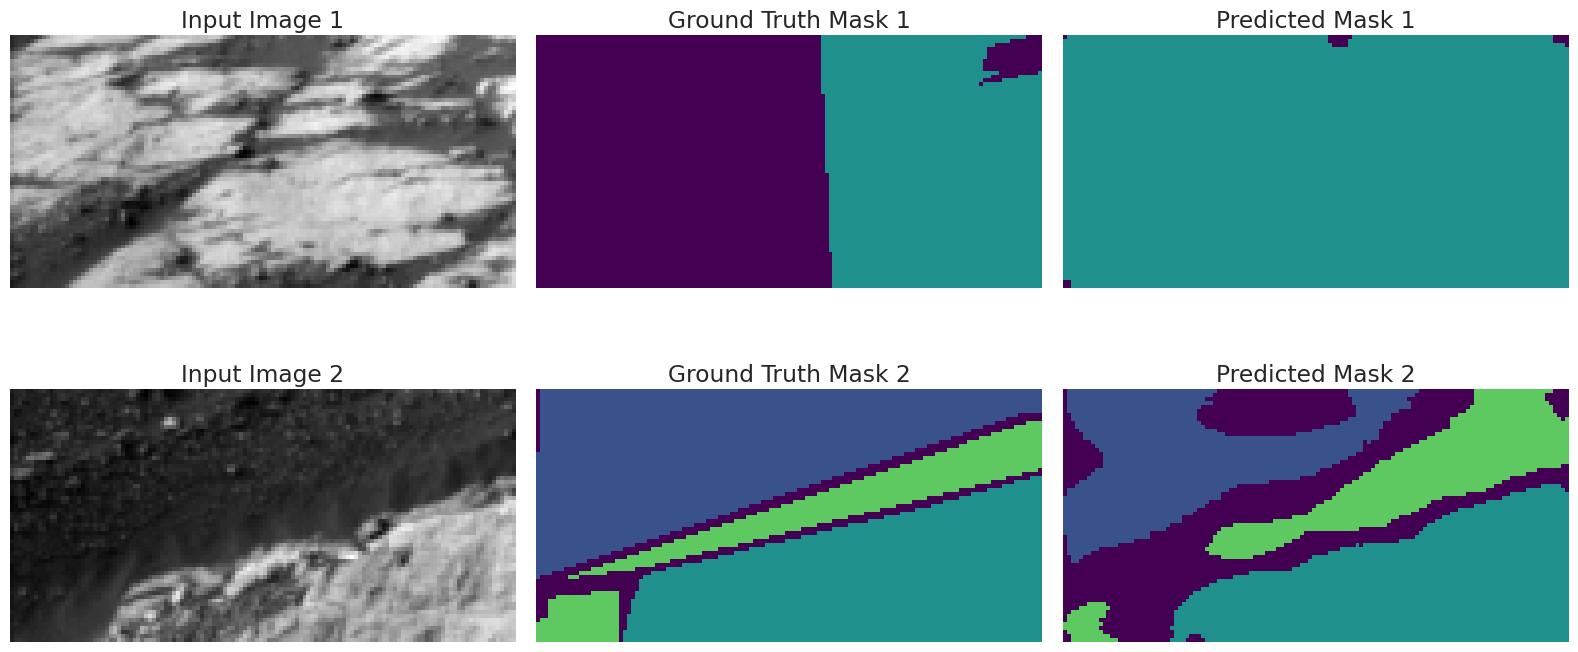

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8576 - loss: 6.3293e-04 - mean_iou: 0.7380 - val_accuracy: 0.7665 - val_loss: 0.0055 - val_mean_iou: 0.5127
Epoch 152/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8635 - loss: 6.0467e-04 - mean_iou: 0.7325 - val_accuracy: 0.7664 - val_loss: 0.0054 - val_mean_iou: 0.5131
Epoch 153/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8586 - loss: 6.3434e-04 - mean_iou: 0.7332 - val_accuracy: 0.7665 - val_loss: 0.0054 - val_mean_iou: 0.5136
Epoch 154/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8583 - loss: 6.2677e-04 - mean_iou: 0.7197 - val_accuracy: 0.7664 - val_loss: 0.0054 - val_mean_iou: 0.5131
Epoch 155/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8566 - loss: 6.5782e-04 - mean_iou: 0.7271 - val_accuracy: 0.7663 - val_loss: 0.0054 - val_mean_iou: 0.5131
Epoch 156/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8601 - loss: 6.2254e-04 - mean_iou: 0.7345

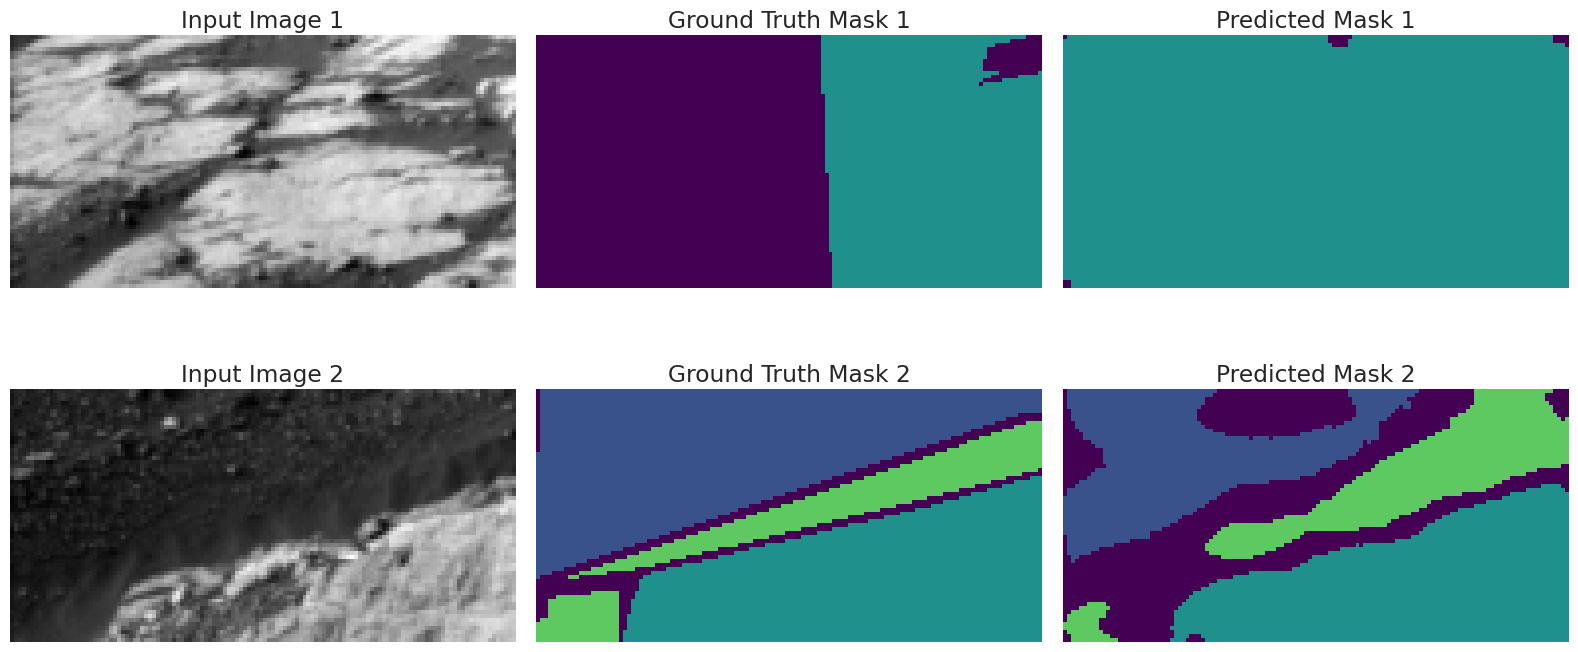

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8602 - loss: 6.2288e-04 - mean_iou: 0.7347 - val_accuracy: 0.7663 - val_loss: 0.0054 - val_mean_iou: 0.5130
Epoch 157/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8599 - loss: 6.2511e-04 - mean_iou: 0.7381 - val_accuracy: 0.7663 - val_loss: 0.0054 - val_mean_iou: 0.5131
Epoch 158/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8622 - loss: 6.2020e-04 - mean_iou: 0.7390 - val_accuracy: 0.7664 - val_loss: 0.0054 - val_mean_iou: 0.5132
Epoch 159/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8622 - loss: 6.2194e-04 - mean_iou: 0.7283 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5131
Epoch 160/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8607 - loss: 6.3188e-04 - mean_iou: 0.7360 - val_accuracy: 0.7664 - val_loss: 0.0054 - val_mean_iou: 0.5130
Epoch 161/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8583 - loss: 6.3739e-04 - mean_iou: 0.7327

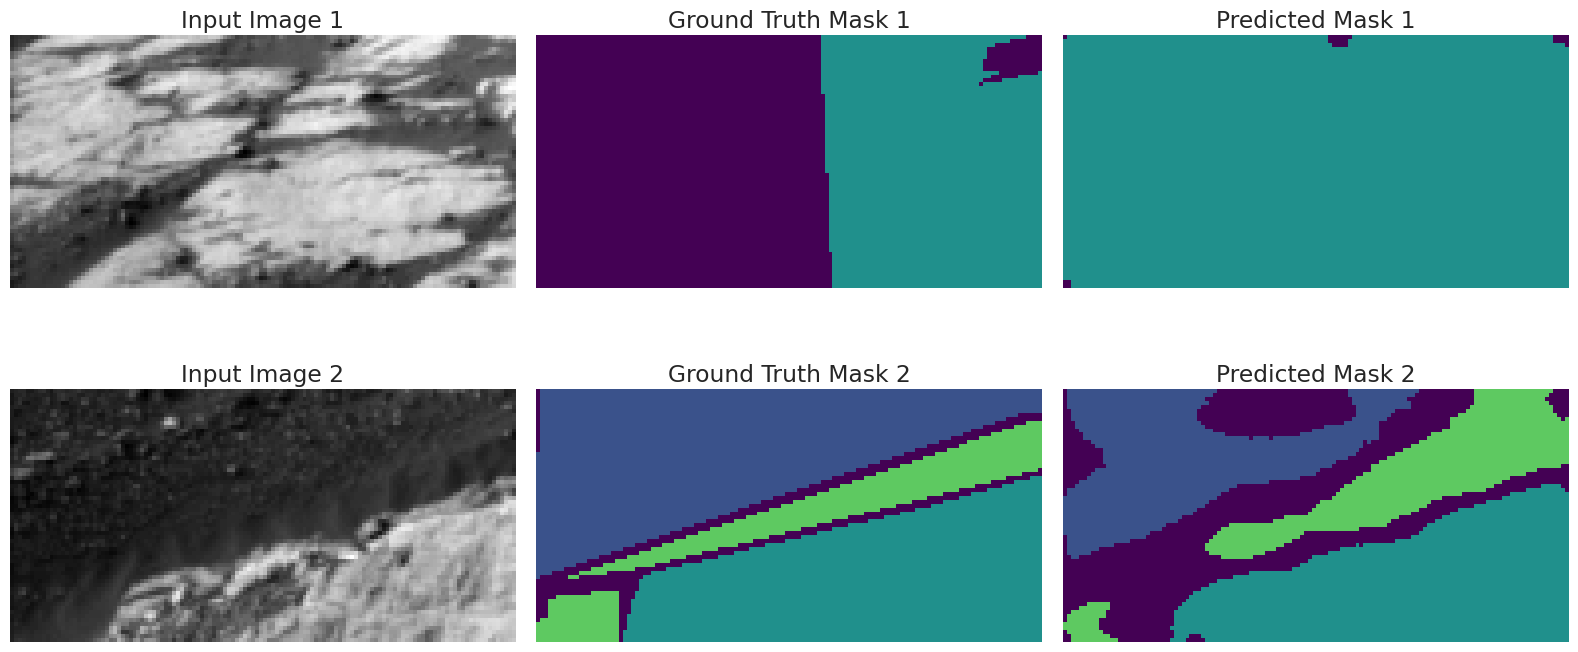

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8584 - loss: 6.3750e-04 - mean_iou: 0.7329 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5128
Epoch 162/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8582 - loss: 6.3869e-04 - mean_iou: 0.7258 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5126
Epoch 163/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8544 - loss: 6.3269e-04 - mean_iou: 0.7310 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5127
Epoch 164/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8627 - loss: 6.0932e-04 - mean_iou: 0.7292 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5128
Epoch 165/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8605 - loss: 6.3627e-04 - mean_iou: 0.7341 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5131
Epoch 166/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8608 - loss: 6.2175e-04 - mean_iou: 0.7364

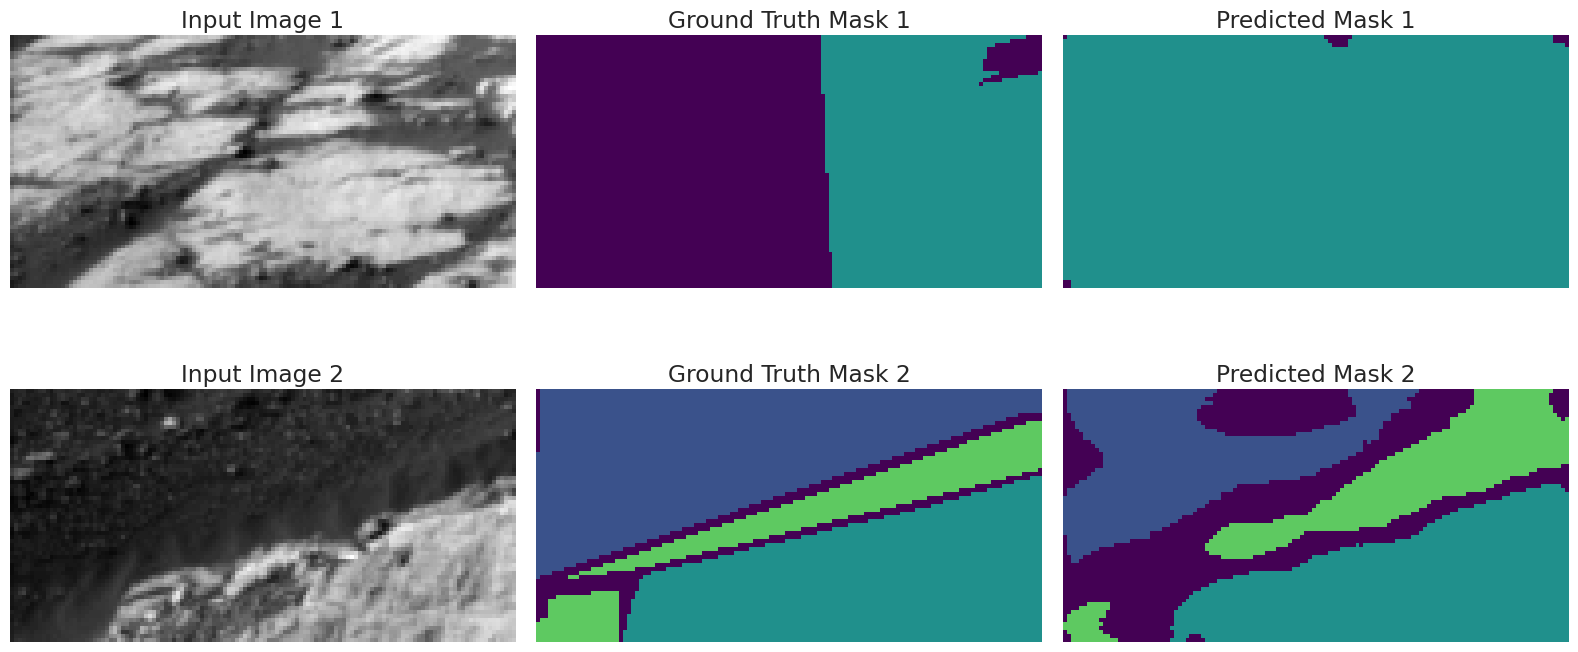

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.8607 - loss: 6.2327e-04 - mean_iou: 0.7364 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5128
Epoch 167/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8595 - loss: 6.4776e-04 - mean_iou: 0.7328 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5130
Epoch 168/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8599 - loss: 6.3150e-04 - mean_iou: 0.7337 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5126
Epoch 169/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8604 - loss: 6.2206e-04 - mean_iou: 0.7400 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5122
Epoch 170/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8561 - loss: 6.4405e-04 - mean_iou: 0.7361 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5120
Epoch 171/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8608 - loss: 6.1639e-04 - mean_iou: 0.7348

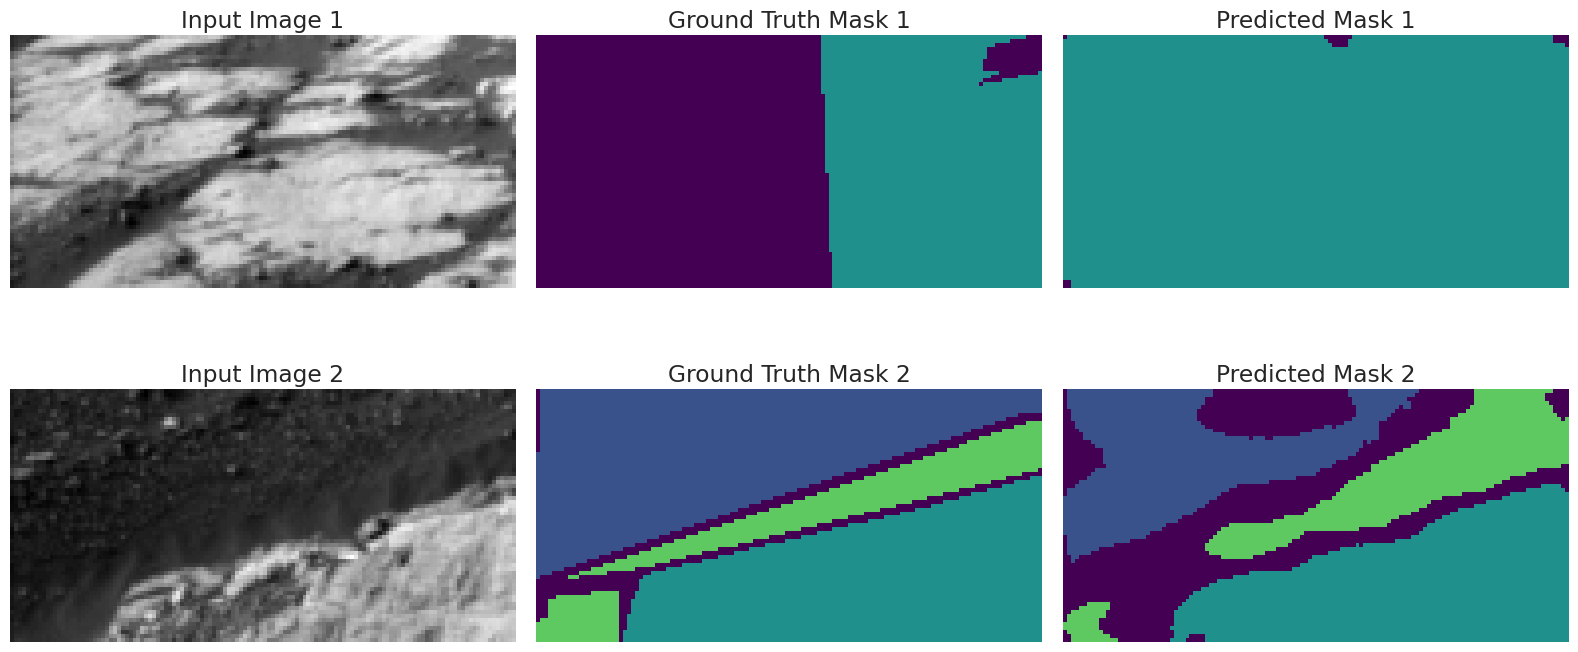

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8608 - loss: 6.1751e-04 - mean_iou: 0.7349 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5124
Epoch 172/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8607 - loss: 6.2329e-04 - mean_iou: 0.7367 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5126
Epoch 173/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8643 - loss: 6.1289e-04 - mean_iou: 0.7375 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5122
Epoch 174/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8569 - loss: 6.1965e-04 - mean_iou: 0.7337 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5119
Epoch 175/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8573 - loss: 6.2983e-04 - mean_iou: 0.7343 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5127
Epoch 176/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.8591 - loss: 6.2651e-04 - mean_iou: 0.7340

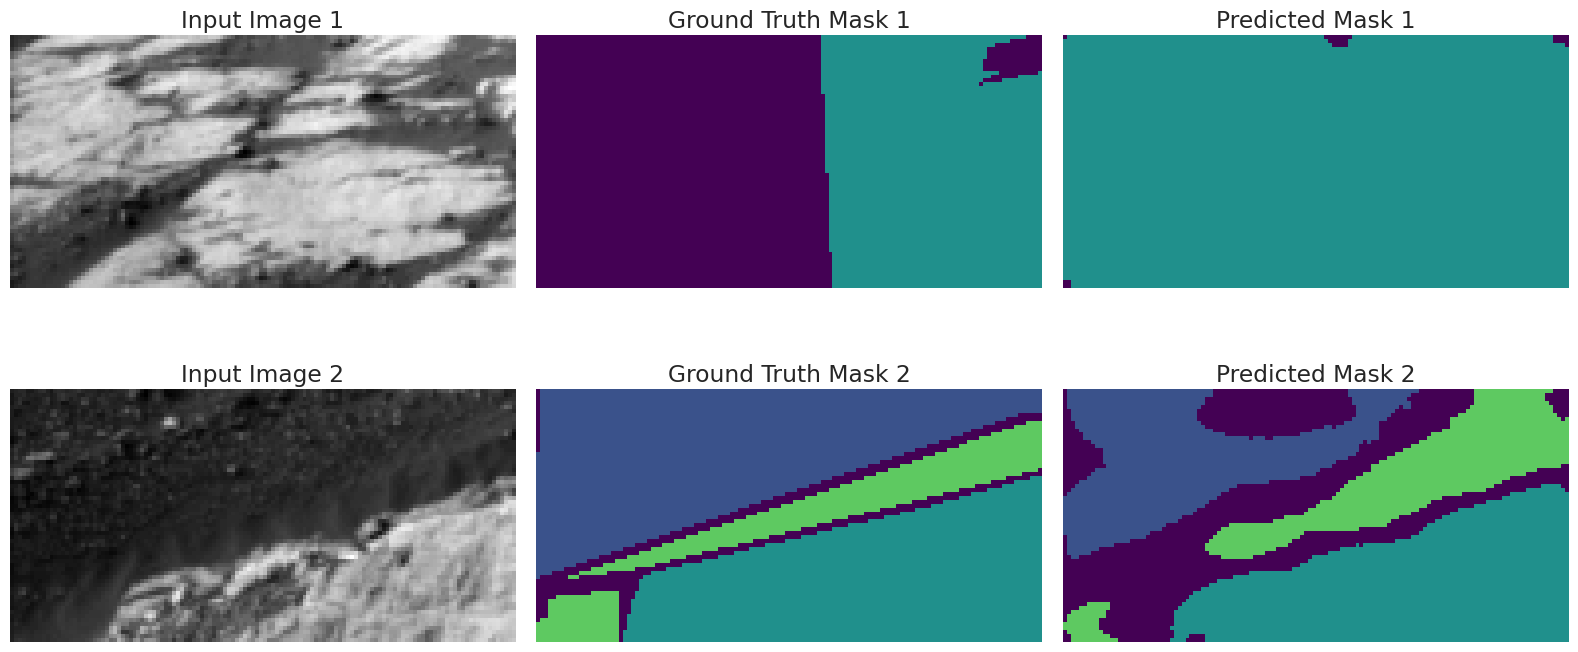

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8591 - loss: 6.2722e-04 - mean_iou: 0.7340 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5125
Epoch 177/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8646 - loss: 6.0857e-04 - mean_iou: 0.7355 - val_accuracy: 0.7663 - val_loss: 0.0054 - val_mean_iou: 0.5128
Epoch 178/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8602 - loss: 6.6286e-04 - mean_iou: 0.7212 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5127
Epoch 179/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8633 - loss: 6.0492e-04 - mean_iou: 0.7374 - val_accuracy: 0.7662 - val_loss: 0.0055 - val_mean_iou: 0.5126
Epoch 180/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8634 - loss: 6.1671e-04 - mean_iou: 0.7315 - val_accuracy: 0.7662 - val_loss: 0.0055 - val_mean_iou: 0.5123
Epoch 181/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8641 - loss: 6.0836e-04 - mean_iou: 0.7383

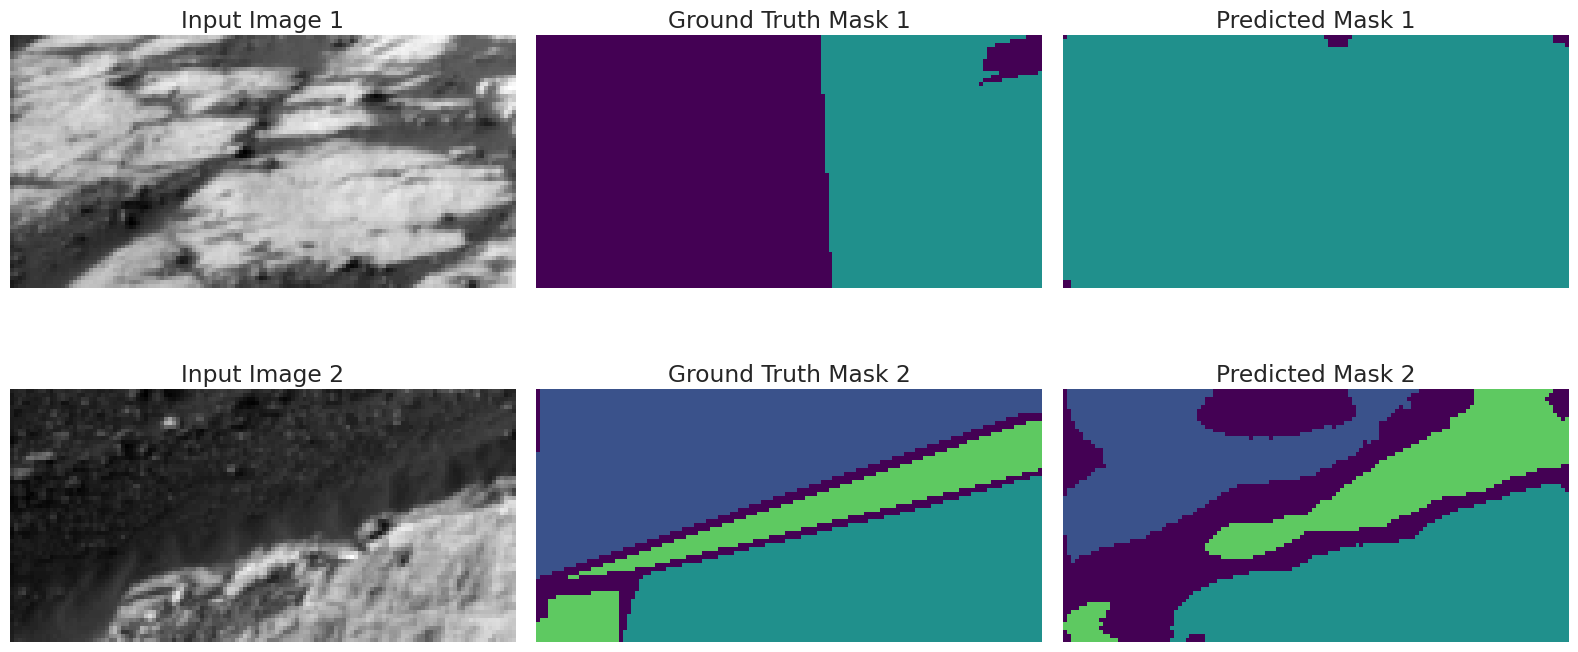

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8641 - loss: 6.0952e-04 - mean_iou: 0.7380 - val_accuracy: 0.7662 - val_loss: 0.0055 - val_mean_iou: 0.5122
Epoch 182/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8598 - loss: 6.1765e-04 - mean_iou: 0.7283 - val_accuracy: 0.7663 - val_loss: 0.0054 - val_mean_iou: 0.5124
Epoch 183/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8612 - loss: 6.1104e-04 - mean_iou: 0.7283 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5125
Epoch 184/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8599 - loss: 6.1378e-04 - mean_iou: 0.7379 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5125
Epoch 185/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8587 - loss: 6.2153e-04 - mean_iou: 0.7360 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5123
Epoch 186/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8627 - loss: 6.0705e-04 - mean_iou: 0.7421

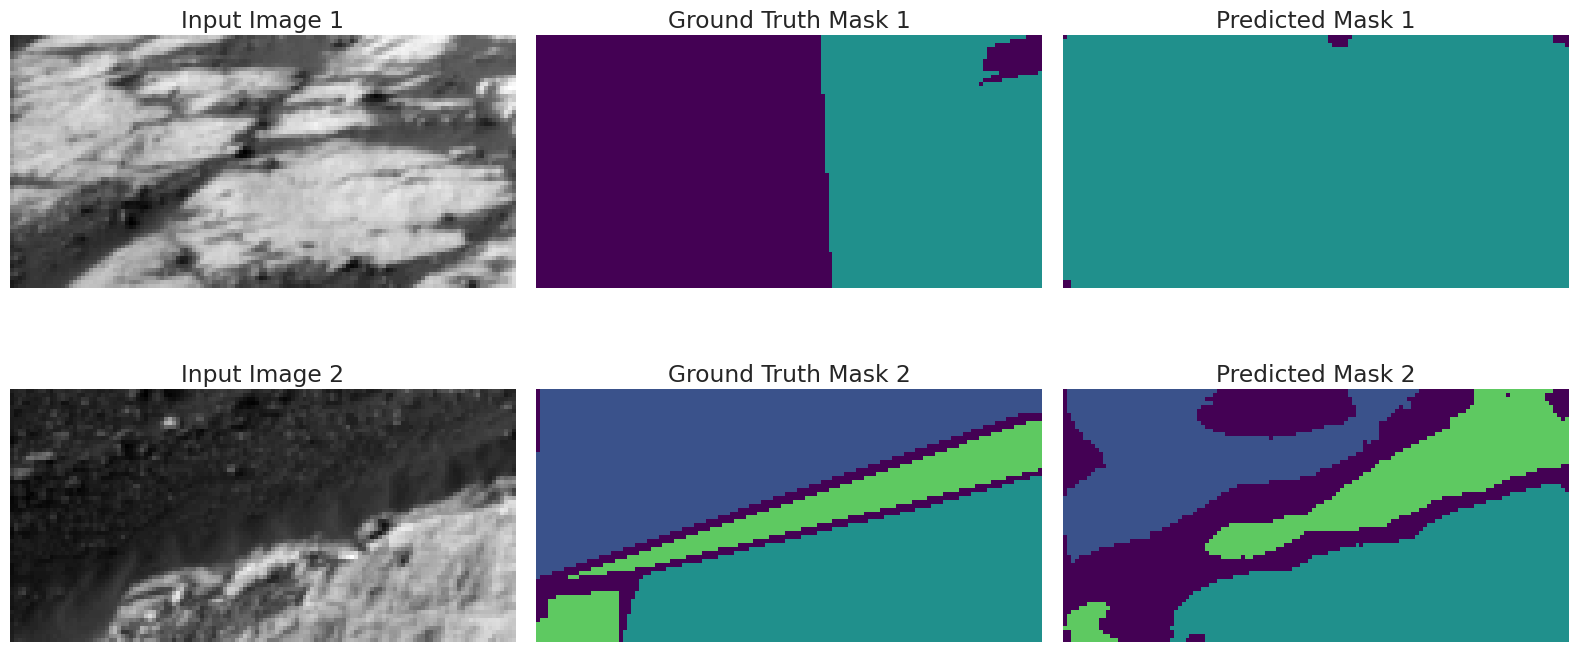

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8628 - loss: 6.0746e-04 - mean_iou: 0.7420 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5126
Epoch 187/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8617 - loss: 6.1151e-04 - mean_iou: 0.7341 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5124
Epoch 188/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8602 - loss: 6.0489e-04 - mean_iou: 0.7368 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5118
Epoch 189/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8591 - loss: 6.2739e-04 - mean_iou: 0.7348 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5114
Epoch 190/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8640 - loss: 6.1491e-04 - mean_iou: 0.7281 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5114
Epoch 191/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8610 - loss: 6.5581e-04 - mean_iou: 0.7435

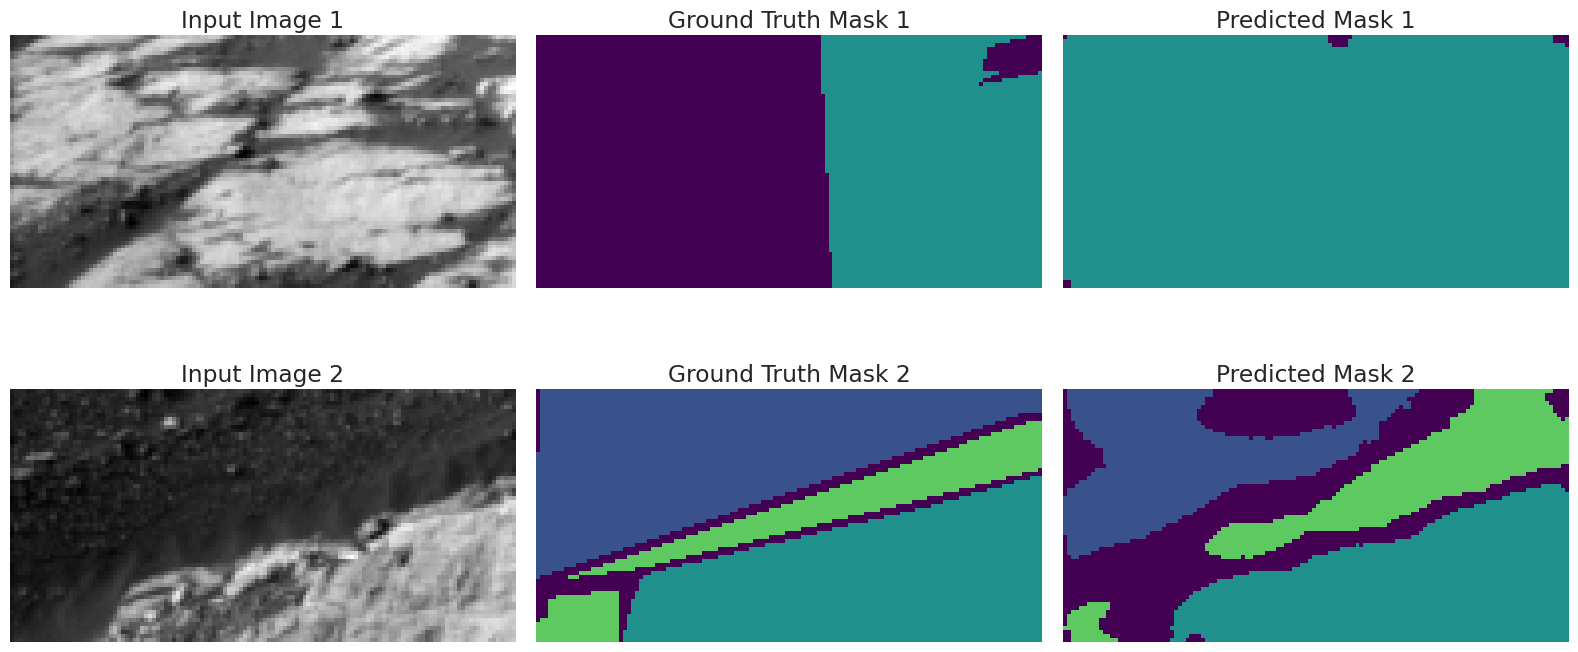

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - accuracy: 0.8611 - loss: 6.5518e-04 - mean_iou: 0.7431 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5113
Epoch 192/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8597 - loss: 6.3877e-04 - mean_iou: 0.7344 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5116
Epoch 193/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8586 - loss: 6.2912e-04 - mean_iou: 0.7345 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5117
Epoch 194/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8587 - loss: 6.1267e-04 - mean_iou: 0.6968 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5123
Epoch 195/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8604 - loss: 6.2268e-04 - mean_iou: 0.7366 - val_accuracy: 0.7662 - val_loss: 0.0055 - val_mean_iou: 0.5124
Epoch 196/200
31/32 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.8581 - loss: 6.3338e-04 - mean_iou: 0.7265

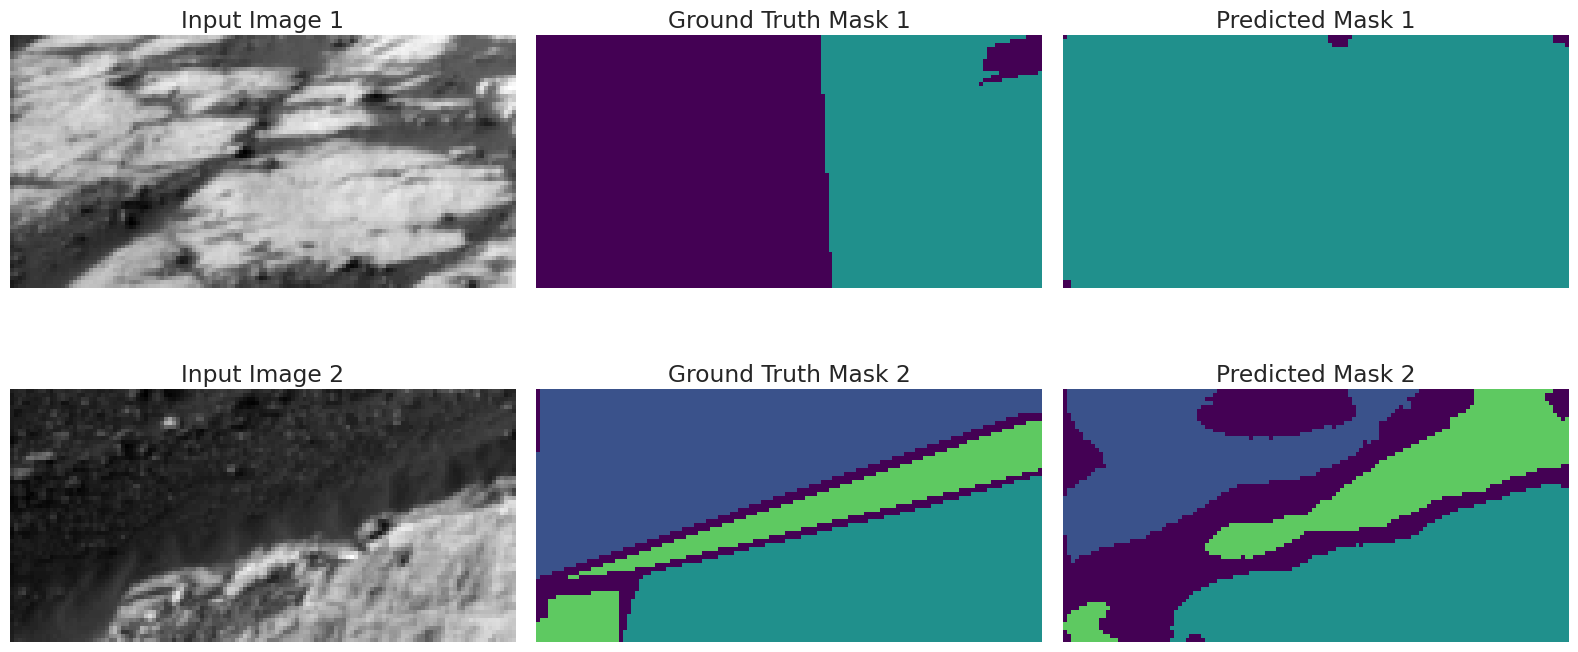

32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.8583 - loss: 6.3404e-04 - mean_iou: 0.7271 - val_accuracy: 0.7663 - val_loss: 0.0055 - val_mean_iou: 0.5121
Epoch 197/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8576 - loss: 6.3576e-04 - mean_iou: 0.7366 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5123
Epoch 198/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8614 - loss: 6.2718e-04 - mean_iou: 0.7282 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5125
Epoch 199/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8602 - loss: 6.2752e-04 - mean_iou: 0.7279 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5128
Epoch 200/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 122ms/step - accuracy: 0.8600 - loss: 6.4104e-04 - mean_iou: 0.7358 - val_accuracy: 0.7664 - val_loss: 0.0055 - val_mean_iou: 0.5124
Final validation Mean Intersection Over Union: 55.11%


In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=val_dataset,
    callbacks=[early_stopping, viz_callback],
    verbose=1
).history

# Calculate and print the final validation accuracy
final_val_meanIoU = round(max(history['val_mean_iou'])* 100, 2)
print(f'Final validation Mean Intersection Over Union: {final_val_meanIoU}%')

# Save the trained model to a file with the accuracy included in the filename
model_filename = 'UNet_'+str(final_val_meanIoU)+'.keras'
#model.save(model_filename)

# Delete the model to free up resources
#del model

In [ ]:
weights_filename = 'UNet_weights_' + str(final_val_meanIoU) + '.weights.h5'
model.save_weights(weights_filename)

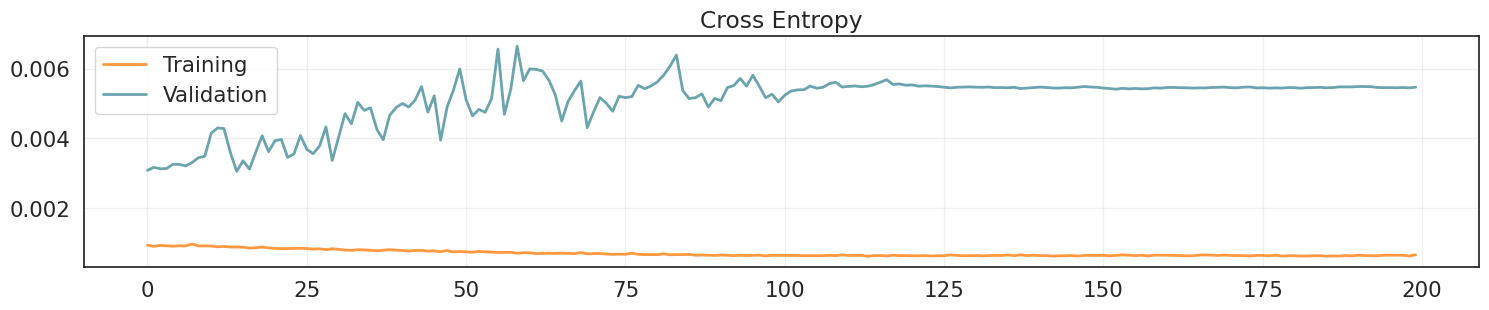

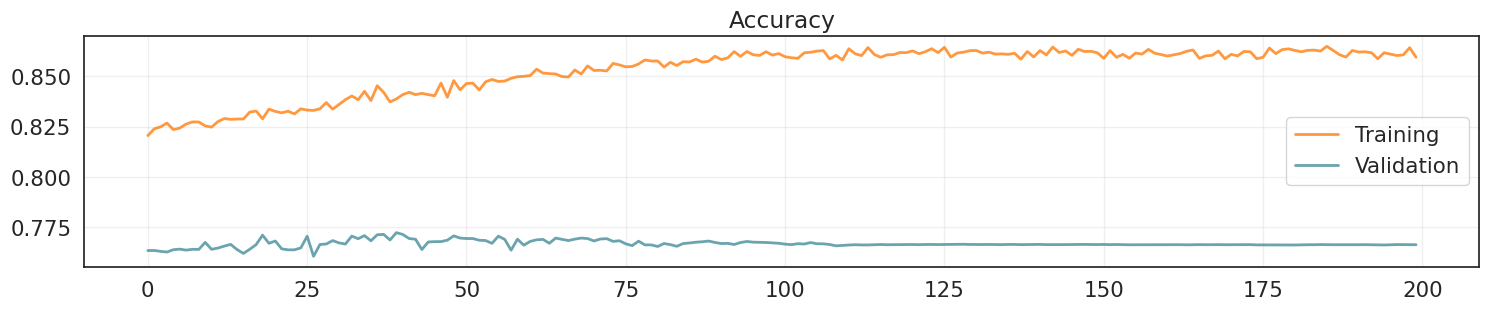

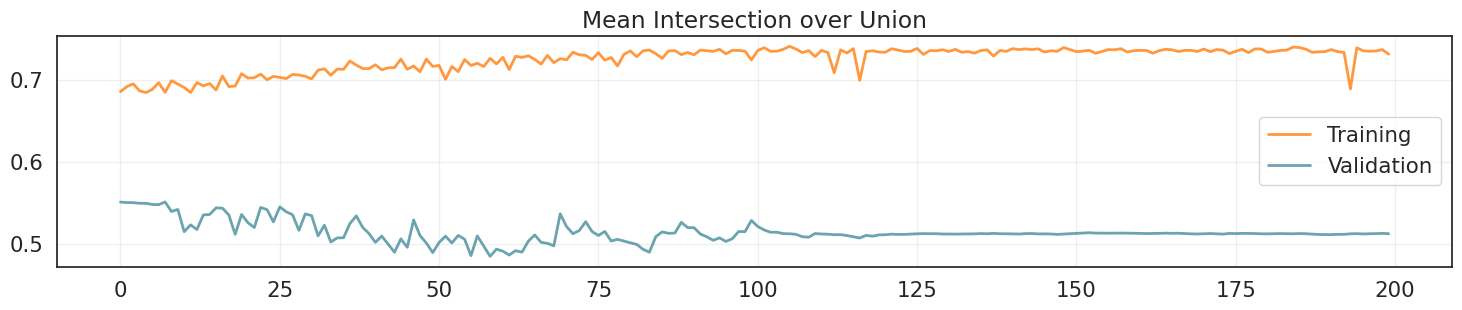

In [ ]:
# Plot and display training and validation loss
plt.figure(figsize=(18, 3))
plt.plot(history['loss'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_loss'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Cross Entropy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation accuracy
plt.figure(figsize=(18, 3))
plt.plot(history['accuracy'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_accuracy'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Plot and display training and validation mean IoU
plt.figure(figsize=(18, 3))
plt.plot(history['mean_iou'], label='Training', alpha=0.8, color='#ff7f0e', linewidth=2)
plt.plot(history['val_mean_iou'], label='Validation', alpha=0.9, color='#5a9aa5', linewidth=2)
plt.title('Mean Intersection over Union')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Above, you can see the progress of the Loss function and of the accuracy and miou for both Training and Validation during the model training

###make inference

We can now use the trained model to see how it performs on a test dataset, never seen by the model before

In [ ]:
# Recreate the model with the original architecture
model = get_unet_model()  # Assuming original architecture
# Load the weights
model.load_weights(weights_filename)

# Compile the model with specified loss, optimizer, and metrics
# Define metrics for each output layer


model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tfk.optimizers.AdamW(LEARNING_RATE),
    metrics=["accuracy", MeanIntersectionOverUnion(num_classes=5, labels_to_exclude=[0])]  # Pass the list of metrics
)

# Print a detailed summary of the model with expanded nested layers and trainable parameters.
model.summary(expand_nested=True, show_trainable=True)

# Generate and display a graphical representation of the model architecture.
#tf.keras.utils.plot_model(model, show_trainable=True, expand_nested=True, dpi=70)

Model: "UNet"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape         ┃      Param # ┃ Connected to        ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer            │ (None, 64, 128, 1)   │            0 │ -                   │    -    │
│ (InputLayer)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_conv1      │ (None, 64, 128, 32)  │          320 │ input_layer[0][0]   │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_bn1        │ (None, 64, 128, 32)  │          128 │ down_block1_conv1[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_activatio… │ (None, 64, 128, 32)  │            0 │ down_block1_bn1[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_conv2      │ (None, 64, 128, 32)  │        9,248 │ down_block1_activa… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_bn2        │ (None, 64, 128, 32)  │          128 │ down_block1_conv2[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block1_activatio… │ (None, 64, 128, 32)  │            0 │ down_block1_bn2[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ max_pooling2d_3        │ (None, 32, 64, 32)   │            0 │ down_block1_activa… │    -    │
│ (MaxPooling2D)         │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_conv1      │ (None, 32, 64, 64)   │       18,496 │ max_pooling2d_3[0]… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_bn1        │ (None, 32, 64, 64)   │          256 │ down_block2_conv1[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_activatio… │ (None, 32, 64, 64)   │            0 │ down_block2_bn1[0]… │    -    │
│ (Activation)           │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_conv2      │ (None, 32, 64, 64)   │       36,928 │ down_block2_activa… │    Y    │
│ (Conv2D)               │                      │              │                     │         │
├────────────────────────┼──────────────────────┼──────────────┼─────────────────────┼─────────┤
│ down_block2_bn2        │ (None, 32, 64, 64)   │          256 │ down_block2_conv2[… │    Y    │
│ (BatchNormalization)   │                      │              │                     │         │
├──────────────────────

 Total params: 2,415,592 (9.21 MB)

 Trainable params: 2,410,728 (9.20 MB)

 Non-trainable params: 4,864 (19.00 KB)

In [ ]:
# Evaluate the model on the test set and print the results
test_loss, test_accuracy, test_mean_iou = model.evaluate(test_dataset, verbose=0, batch_size=10)
print(f'Test Accuracy: {round(test_accuracy, 4)}')
print(f'Test Mean Intersection over Union: {round(test_mean_iou, 4)}')

Test Accuracy: 0.8111
Test Mean Intersection over Union: 0.5887


Above, we can see the results from the predictions made on the test dataset

In [ ]:
preds = model.predict(test_dataset, verbose=0) # Convert the list of predictions to a NumPy array
print(f"Predictions shape: {preds.shape}")

Predictions shape: (251, 64, 128, 5)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


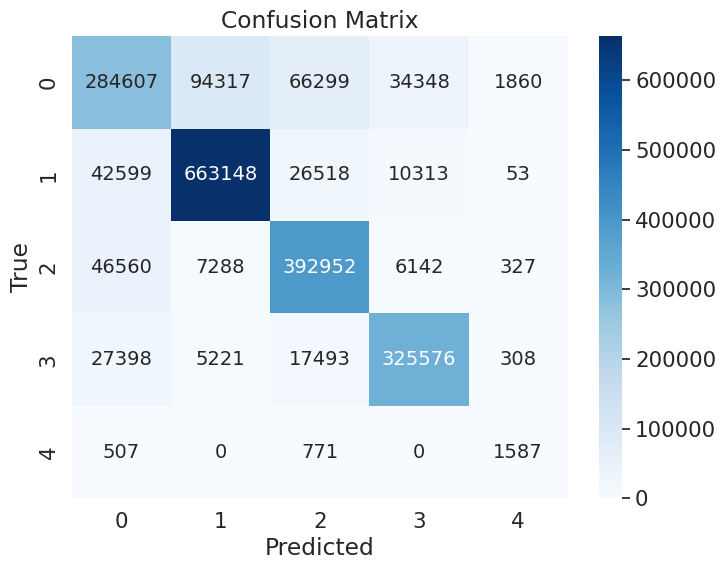

In [ ]:
# Predict on the test set
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Correctly extract and flatten true labels
y_true = []
for _, labels in test_dataset:
    y_true.extend(labels.numpy().flatten())  # Assuming labels are class indices
y_true = np.array(y_true)

# Flatten predictions
y_pred_classes = y_pred_classes.flatten()

# Compute the confusion matrix without excluding any classes.
cm = confusion_matrix(y_true, y_pred_classes, labels=[0, 1, 2, 3, 4])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=[0, 1, 2, 3, 4], yticklabels=[0, 1, 2, 3, 4])  # Use all class labels
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

We use the trained model to predict on the test set and compute the confusion matrix by comparing the predicted and true labels

Below, we process the test dataset, generating predictions using the trained model. Random samples are visualized, displaying the original image, the true mask, and the predicted mask to evaluate the model's performance

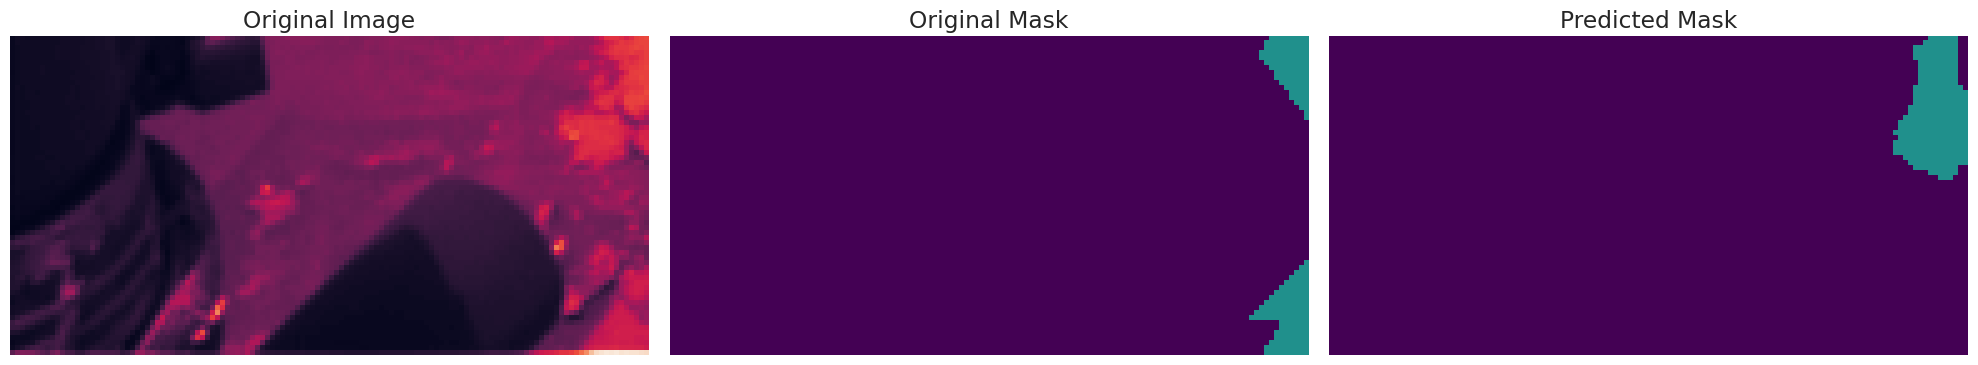

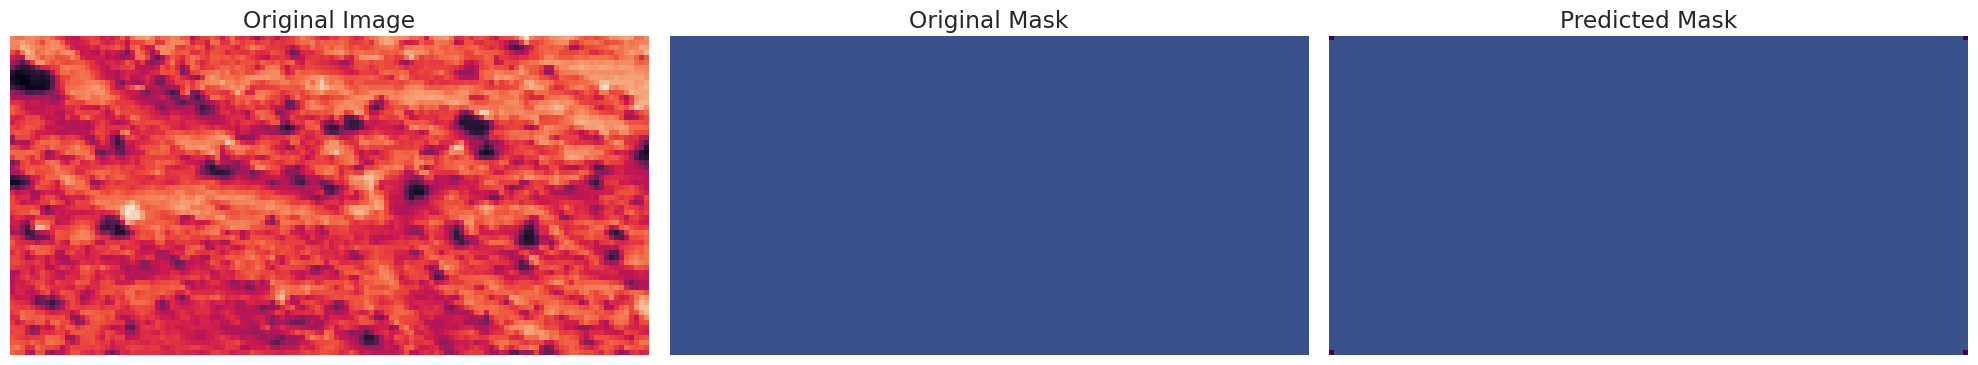

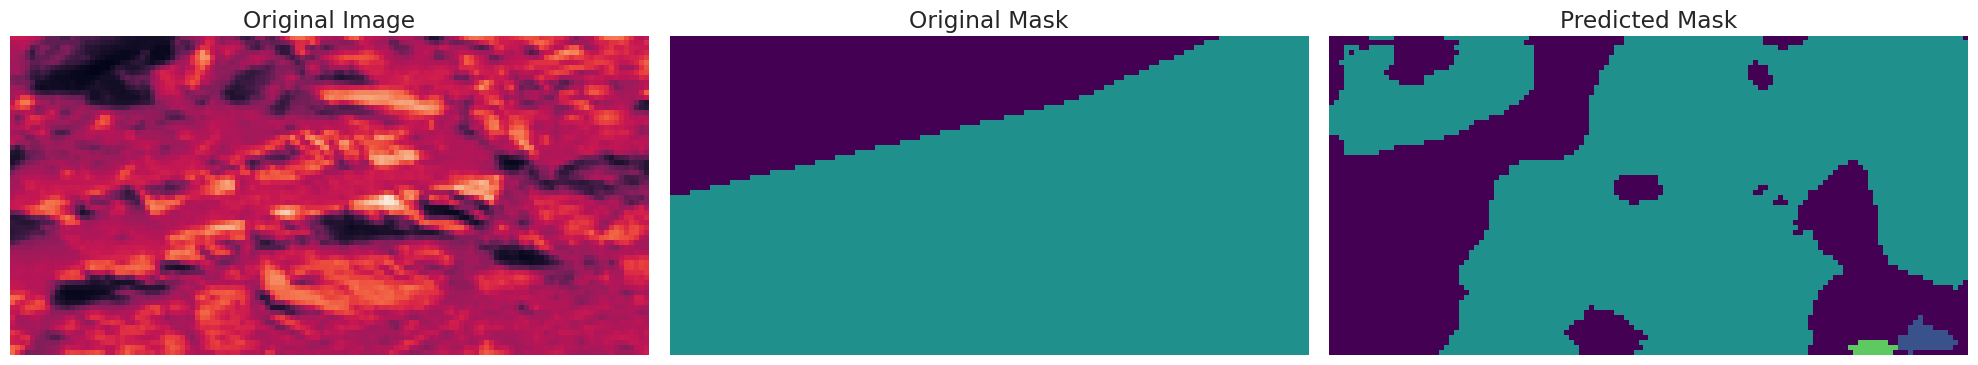

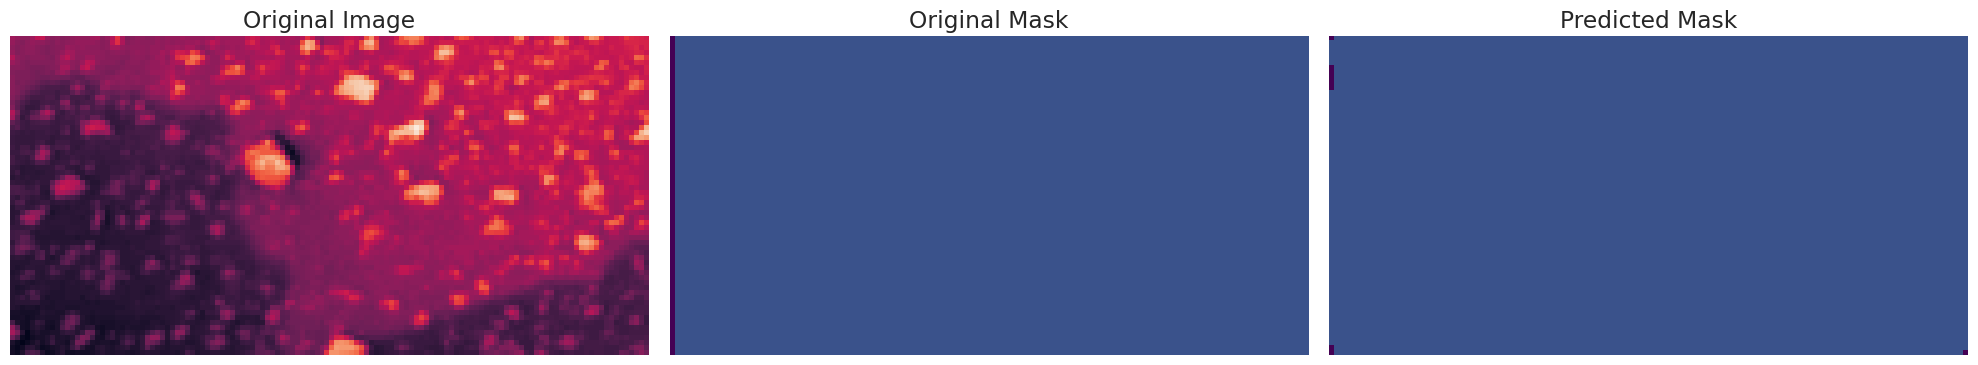

In [ ]:
def plot_triptychs(dataset, model, num_samples=1):
    """
    Plot triptychs (original image, true mask, predicted mask) for samples from a tf.data.Dataset

    Parameters:
    dataset: tf.data.Dataset - The dataset containing image-label pairs
    model: tf.keras.Model - The trained model to generate predictions
    num_samples: int - Number of samples to plot
    """
    # Take samples from the dataset
    samples = dataset.take(num_samples)

    for images, labels in samples:
        # If we have a batch, take the first example
        if len(images.shape) == 4:  # Batch of images
            images = images[0:1]
            labels = labels[0:1]

        # Generate predictions
        pred = model.predict(images, verbose=0)
        pred = tf.math.argmax(pred, axis=-1)

        # Create colormap based on number of classes in labels
        num_classes = 5 #ATTENTION ! Modification did here in place of the following 2 lines. TODO: double check
        # labels_np = labels.numpy()
        # num_classes = len(np.unique(labels_np))
        colormap = create_segmentation_colormap(num_classes)

        # Create figure with subplots
        fig, axes = plt.subplots(1, 3, figsize=(20, 4))

        # Plot original image
        axes[0].set_title("Original Image")
        axes[0].imshow(images[0])
        axes[0].axis('off')

        # Plot original mask
        axes[1].set_title("Original Mask")
        colored_label = apply_colormap(labels[0], colormap)
        axes[1].imshow(colored_label)
        axes[1].axis('off')

        # Plot predicted mask
        axes[2].set_title("Predicted Mask")
        colored_pred = apply_colormap(pred[0], colormap)
        axes[2].imshow(colored_pred)
        axes[2].axis('off')

        plt.tight_layout()
        plt.show()
        plt.close()

# Example usage:
# Plot three random samples
plot_triptychs(test_dataset, model, num_samples=7)

In [ ]:
data = np.load("filtered_mars_for_students.npz")
X_test = data["test_set"]
X_test = X_test / 255.0
X_test = np.expand_dims(X_test, axis=-1)  # Aggiungi un canale
print(f"X_test shape: {X_test.shape}")

# Predict in batches to avoid OOM errors
batch_size = 32 # Adjust batch size as needed based on your GPU memory
num_samples = X_test.shape[0]
preds = []

for i in range(0, num_samples, batch_size):
    batch_preds = model.predict(X_test[i:i + batch_size], verbose=0)
    preds.extend(np.argmax(batch_preds, axis=-1))

preds = np.array(preds) # Convert the list of predictions to a NumPy array
print(f"Predictions shape: {preds.shape}")

X_test shape: (10022, 64, 128, 1)
Predictions shape: (10022, 64, 128)


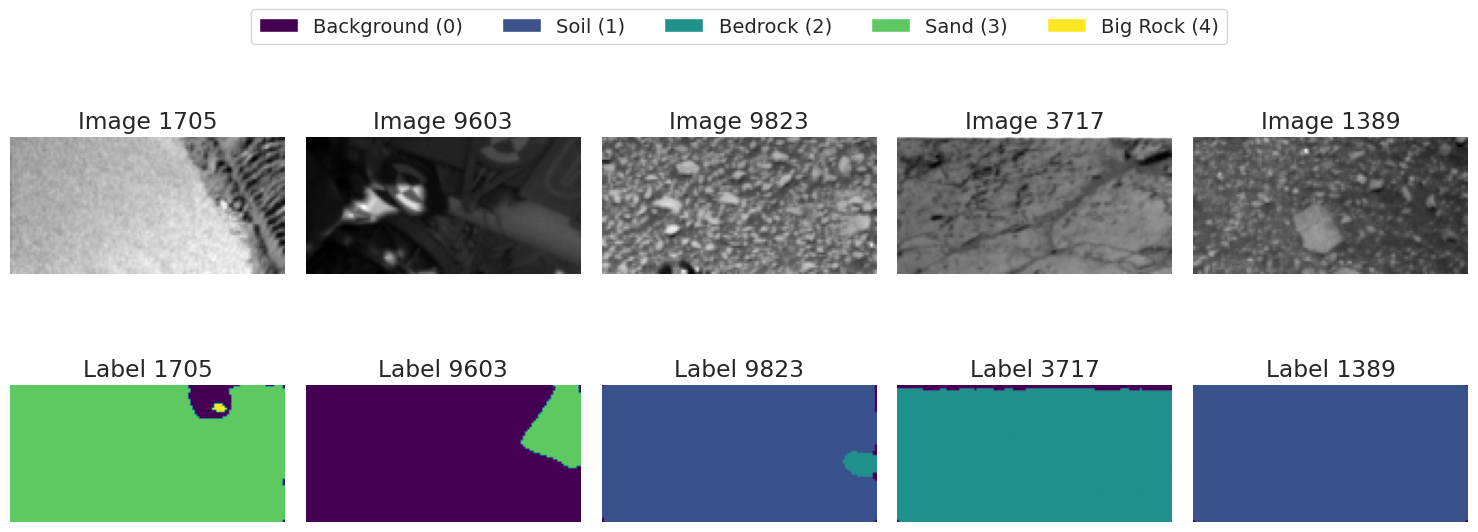

In [ ]:
# Plot 5 random images with labels
plot_random_images_with_labels(X_test, preds, num=5)


Distribuzione delle classi: {0: 20216690, 1: 25238093, 2: 22770350, 3: 13746226, 4: 128865}


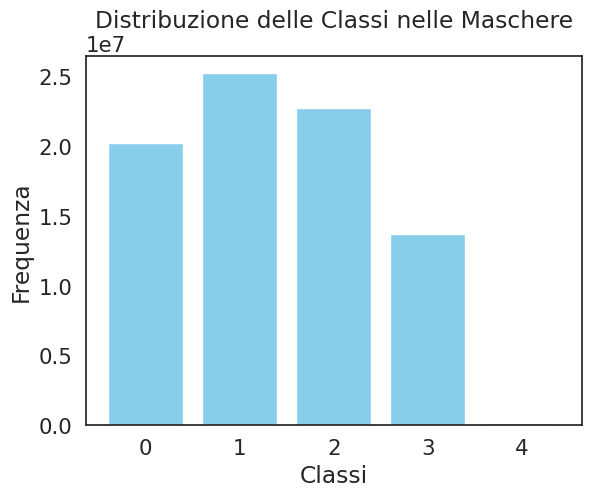

Numero di classi uniche nel dataset: 5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate class frequencies
unique, counts = np.unique(preds, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Visualization
print("Distribuzione delle classi:", class_distribution)

# Bar plot
plt.bar(class_distribution.keys(), class_distribution.values(), color='skyblue')
plt.xlabel('Classi')
plt.ylabel('Frequenza')
plt.title('Distribuzione delle Classi nelle Maschere')
plt.xticks(list(class_distribution.keys()))
plt.show()

# Number of unique classes
print(f"Numero di classi uniche nel dataset: {len(class_distribution)}")


Above, we calculate and visualize the distribution of predicted classes, providing insights into class frequencies, and print the number of unique predicted classes to assess the model's output diversity

##🗂️preparing the submission

In [ ]:
import pandas as pd

def y_to_df(y) -> pd.DataFrame:
    """Converts segmentation predictions into a DataFrame format for Kaggle."""
    n_samples = len(y)
    y_flat = y.reshape(n_samples, -1)
    df = pd.DataFrame(y_flat)
    df["id"] = np.arange(n_samples)
    cols = ["id"] + [col for col in df.columns if col != "id"]
    return df[cols]

In [ ]:
# Create and download the csv submission file
timestep_str = model_filename.replace("model_", "").replace(".keras", "")
submission_filename = f"submission_{timestep_str}.csv"
submission_df = y_to_df(preds)
submission_df.to_csv(submission_filename, index=False)

print(f"Submission file saved to: {submission_filename}")
# from google.colab import files
# files.download(submission_filename)

Submission file saved to: submission_UNet_55.11.csv
